# **VERINDRA HERNANDA PUTRA - 2426**

In [ ]:
# CaAs_Verindra Hernanda Putra - 1303223055

# Import Library

from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

# **> FUNGSI CLEANING**

In [ ]:
# Fungsi untuk cek value dengan nilai yang rusak (-, -inf, inf, dll)
def check_broken_value(df):
    for column in df.columns:
        if df[column].isin(['-' or '-inf' or 'inf' or ' ']).any():
            return "Data tidak Aman"
    return "Data Aman"

# Fungsi hilangkan broken value
def toNaN(df):
  toNaN = {'inf': np.nan, '-inf': np.nan, '-' : np.nan, ' ' : np.nan}
  df = df.replace(toNaN)

  return df

# Fungsi Deteksi Outlier
def detect_outliers(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1

  outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]

  return outliers

# Hapus outlier
def hapus_outlier(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1

  batas_atas = Q3 + 1.5 * IQR
  batas_bawah = Q1 - 1.5 * IQR


  df = df[(df[column] >= batas_bawah) & (df[column] <= batas_atas)]

  return df

def hapus_all_outlier(df):

  kolom_numerik = df.select_dtypes(include=['number']).columns

  for kolom in kolom_numerik:
    df = hapus_outlier(df, kolom)

  return df

# Mengganti outlier dengan median
def replace_outlier_median(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1

  batas_atas = Q3 + 1.5 * IQR
  batas_bawah = Q1 - 1.5 * IQR

  df[column] = np.where((df[column] < batas_bawah) | (df[column] > batas_atas), df[column].median(), df[column])

  return df

# Mengganti outlier dengan modus
def replace_outlier_modus(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1

  batas_atas = Q3 + 1.5 * IQR
  batas_bawah = Q1 - 1.5 * IQR

  modus = df[column].mode().iloc[0]
  df[column] = np.where((df[column] < batas_bawah) | (df[column] > batas_atas), modus, df[column])

  return df

# Mengganti outlier dengan median
def replace_outlier_mean(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1

  batas_atas = Q3 + 1.5 * IQR
  batas_bawah = Q1 - 1.5 * IQR

  df[column] = np.where((df[column] < batas_bawah) | (df[column] > batas_atas), df[column].mean(), df[column])

  return df

def fill_mode_na(df):

  for column in df.columns:
    df[column] = df[column].fillna(df[column].mode()[0])

  return df

# **> FUNGSI PRE PROCESSING**

In [ ]:
# Hitung Q3
def Q3(df, column):
  Q3 = df[column].quantile(0.75)

  return Q3

# Hitung Q1
def Q1(df, column):
  Q1 = df[column].quantile(0.25)

  return Q1

# Hitung nilai_cap
def nilai_cap(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1

  cap_value = Q3 + 1.5 * IQR

  return cap_value

# Hitung nilai_floor
def nilai_floor(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1

  floor_value = Q1 - 1.5 * IQR

  return floor_value

# Cap/Floor
def cap_floor(df, column):
  floor = nilai_floor(df, column)
  cap = nilai_cap(df, column)
  df[column] = df[column].clip(lower=floor, upper=cap)

  return df

# Cap/Floor All
def cap_floor_all_columns(df):

  for col in df.select_dtypes(include=['float64']).columns:
    floor = nilai_floor(df, col)
    cap = nilai_cap(df, col)
    df = cap_floor(df, col)

  return df

def SMOTE(df, target):
   from sklearn.model_selection import train_test_split
   from imblearn.over_sampling import SMOTE

   # Pisahkan variabel fitur dengan variabel target
   X = df.drop(columns = [target], axis=1)
   Y = df[target]

   # Pisahkan data menjadi train dan test
   X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

   # SMOTE
   smote = SMOTE(random_state=42)
   X_train_res, Y_train_res = smote.fit_resample(X_train, Y_train)

   # Gabungkan kembali fitur dan target yang sudah di-oversample
   df_resampled = pd.concat([X_train_res, Y_train_res], axis=1)

   return df_resampled


# **> VISUALISASI**

In [ ]:
def create_boxplots(df):

  # Select numeric columns
  numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

  # Calculate subplot dimensions
  num_subplots = len(numeric_cols)
  nrows = int(np.sqrt(num_subplots))
  ncols = int(np.ceil(num_subplots / nrows))

  # Create figure
  plt.figure(figsize=(15, 10))

  # Create subplots and boxplots
  for i, col in enumerate(numeric_cols):
    plt.subplot(nrows, ncols, i+1)
    sns.boxplot(x=df[col])
    plt.title(col)

  # Adjust layout and show plot
  plt.tight_layout()
  plt.show()

  import math

def create_bar_count_plots(df):

    # Pilih kolom kategorikal
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

    # Hitung jumlah subplot
    num_subplots = len(categorical_cols)

    # Hitung jumlah baris dan kolom subplot
    num_cols = 2
    num_rows = math.ceil(num_subplots / num_cols)

    # Buat figure
    plt.figure(figsize=(12, num_rows * 3))

    # Buat subplot dan bar count plot
    for i, col in enumerate(categorical_cols):
        plt.subplot(num_rows, num_cols, i+1)
        sns.countplot(x=df[col])
        plt.title(col)
        plt.xticks(rotation=45)

    # Atur layout dan tampilkan plot
    plt.tight_layout()
    plt.show()

def create_hist(df):

  # Select numeric columns
  numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

  # Calculate subplot dimensions
  num_subplots = len(numeric_cols)
  nrows = int(np.sqrt(num_subplots))
  ncols = int(np.ceil(num_subplots / nrows))

  # Create figure
  plt.figure(figsize=(15, 10))

  # Create subplots and boxplots
  for i, col in enumerate(numeric_cols):
    plt.subplot(nrows, ncols, i+1)
    plt.hist(df[col])
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(col)

  # Adjust layout and show plot
  plt.tight_layout()
  plt.show()

import math

def create_bar_count_plots(df):

    # Pilih kolom kategorikal
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

    # Hitung jumlah subplot
    num_subplots = len(categorical_cols)

    # Hitung jumlah baris dan kolom subplot
    num_cols = 2
    num_rows = math.ceil(num_subplots / num_cols)

    # Buat figure
    plt.figure(figsize=(12, num_rows * 3))

    # Buat subplot dan bar count plot
    for i, col in enumerate(categorical_cols):
        plt.subplot(num_rows, num_cols, i+1)
        sns.countplot(x=df[col])
        plt.title(col)
        plt.xticks(rotation=45)

    # Atur layout dan tampilkan plot
    plt.tight_layout()
    plt.show()

# **> FINISHER**

In [ ]:
# Model Regresi
def LinearRegression(df, target):
   # Import Library

   from sklearn.model_selection import train_test_split
   from sklearn.linear_model import LinearRegression
   from sklearn.metrics import mean_squared_error, r2_score

   # Pisahkan variabel fitur dengan variabel target
   X = df.drop(columns = [target], axis=1)
   Y = df[target]

   # Pisahkan data menjadi train dan test
   X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

   # Melatih Model Regression
   model = LinearRegression()
   model.fit(X_train, Y_train)

   # Prediksi Test
   Y_pred = model.predict(X_test)

   # Evaluasi Model
   score = model.score(X_train, Y_train)

   mse = mean_squared_error(Y_test, Y_pred)
   r2 = r2_score(Y_test, Y_pred)

   print(f"Model Score: ", score)
   print(f"Mean Squared Error: ", mse)
   print(f"R-squared: ", r2)

# Checker Regresi
def detect_outliers(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1

  outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]

  return outliers

def detect_outliers_target(df, target):
    outliers = detect_outliers(df, target)

    return outliers

def detect_null_values(df):
    null_values = df[df.isnull().any(axis=1)]

    return null_values

def detect_dup_values(df):
    dup_values = df[df.duplicated()]

    return dup_values

# Checker Regression
def check_regression(df, target, nama):
    null_values = detect_null_values(df)
    outliers = detect_outliers_target(df, target)
    dup_values = detect_dup_values(df)

    if outliers.empty and null_values.empty and dup_values.empty:
        df.to_csv(f'{nama}.csv', index=False)
        return "Data berhasil disimpan"
    else:
        if not outliers.empty:
            print("Outlier terdeteksi.")
        if not null_values.empty:
            print("Nilai null terdeteksi.")
        if not dup_values.empty:
            print("Nilai duplikat terdeteksi.")
        return "Silahkan coba lagi"

# Checker Klasifikasi
def detect_null_values(df):
    null_values = df[df.isnull().any(axis=1)]

    return null_values

def detect_dup_values(df):
    dup_values = df[df.duplicated()]

    return dup_values

def check_classification(df, target, nama):
    null_values = detect_null_values(df)
    dup_values = detect_dup_values(df)

    if null_values.empty and dup_values.empty:
        distribusi = df[target].value_counts(normalize=True)
        batas = 0.45

        if distribusi.min() < batas:
           return "Silahkan coba lagi"
        else:
            df.to_csv(f'{nama}.csv', index=False)
            return "Data berhasil disimpan"
    else:
        if not null_values.empty:
            print("Nilai null terdeteksi.")
        if not dup_values.empty:
            print("Nilai duplikat terdeteksi.")
        return "Silahkan coba lagi"

# **------------- REGRESI -------------**

# **STP**

Dataset untuk prediksi performa murid tiap periode semester

In [ ]:
# Panggil Dataset
df_STP = pd.read_csv("/content/STP.csv")

In [ ]:
df_STP.head()

Unnamed: 0 school sex   age address famsize Pstatus Medu  Fedu     Mjob  \
0           0     GP   F   NaN       U     GT3       A  4.0  -inf  at_home   
1           1     GP   F     -       U     GT3       T  1.0   1.0  at_home   
2           2     GP   F  15.0       U     LE3       T  1.0   1.0  at_home   
3           3     GP   F  15.0       U     GT3       T  4.0   NaN   health   
4           4     GP   F  16.0       U     GT3       T  3.0   3.0    other   

   ... freetime goout Dalc Walc health absences    G1    G2 G3(Target) index  
0  ...      NaN   4.0  1.0  1.0    3.0      4.0   0.0  11.0       11.0     0  
1  ...      3.0   3.0    -  NaN    3.0      2.0   9.0  -inf       11.0     1  
2  ...      NaN   2.0  2.0  NaN    NaN      6.0  12.0  13.0       12.0     2  
3  ...      NaN   NaN  1.0  1.0    5.0      0.0   NaN   inf        NaN     3  
4  ...     -inf   2.0  inf  2.0    5.0      0.0   NaN  13.0       13.0     4  

[5 rows x 35 columns]

# **---1---> Data Cleaning - STP**

> **DROP FITUR TIDAK RELEVAN**

*   **Fitur Target :** G3(Target)
*   **Model :** Regresi



In [ ]:
# Drop Kolom yang tidak Relevan
df_STP = df_STP.drop(columns = ['Unnamed: 0', 'sex', 'age', 'address', 'famsize', 'reason', 'guardian', 'higher', 'Dalc', 'Walc', 'index'], axis=1)

> **HANDLING NULL VALUES**



In [ ]:
# Cek missing values
null = df_STP.isnull().sum()
print(null[null > 0])

Medu          125
Fedu          116
traveltime    122
studytime     124
failures      122
famrel        122
freetime      121
goout         117
health        123
absences      127
G1            121
G2            111
G3(Target)    114
dtype: int64


In [ ]:
# Cek value pada semua kolom untuk deteksi kesalahan data (inf, -inf, -)
check_broken_value(df_STP)

'Data tidak Aman'

In [ ]:
#ubah ke NaN
df_STP = toNaN(df_STP)

In [ ]:
check_broken_value(df_STP)

'Data Aman'

In [ ]:
# Cek missing values
null = df_STP.isnull().sum()
print(null[null > 0])

Medu          208
Fedu          208
traveltime    208
studytime     208
failures      208
famrel        208
freetime      208
goout         208
health        208
absences      208
G1            208
G2            208
G3(Target)    208
dtype: int64


In [ ]:
# metode "Fill Mode" pada data kategorikal lalu ubah ke int
df_STP['Medu'] = df_STP['Medu'].fillna(df_STP['Medu'].mode()[0]).astype(float).astype(int)
df_STP['Fedu'] = df_STP['Fedu'].fillna(df_STP['Fedu'].mode()[0]).astype(float).astype(int)
df_STP['traveltime'] = df_STP['traveltime'].fillna(df_STP['traveltime'].mode()[0]).astype(float).astype(int)
df_STP['studytime'] = df_STP['studytime'].fillna(df_STP['studytime'].mode()[0]).astype(float).astype(int)
df_STP['famrel'] = df_STP['famrel'].fillna(df_STP['famrel'].mode()[0]).astype(float).astype(int)
df_STP['freetime'] = df_STP['freetime'].fillna(df_STP['freetime'].mode()[0]).astype(float).astype(int)
df_STP['goout'] = df_STP['goout'].fillna(df_STP['goout'].mode()[0]).astype(float).astype(int)
df_STP['health'] = df_STP['health'].fillna(df_STP['health'].mode()[0]).astype(float).astype(int)

# Kolom Numerik non Kategori, isi dengan nilai 0
df_STP['failures'] = df_STP['failures'].fillna(0).astype(float).astype(int)
df_STP['absences'] = df_STP['absences'].fillna(0).astype(float).astype(int)

> **HANDLING TIPE DATA**

In [ ]:
# Ubah ke Float
df_STP['G1'] = df_STP['G1'].astype(float)
df_STP['G2'] = df_STP['G2'].astype(float)
df_STP['G3(Target)'] = df_STP['G3(Target)'].astype(float)

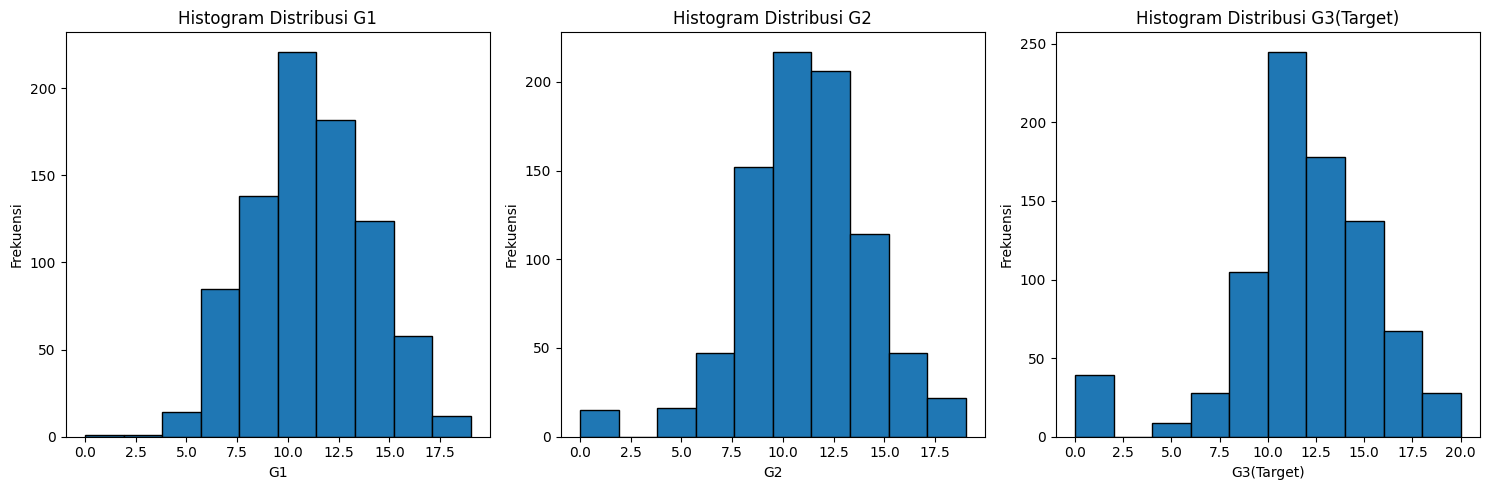

In [ ]:
# Membuat figure dan axes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Membuat histogram untuk setiap kolom
for i, col in enumerate(['G1', 'G2', 'G3(Target)']):
    axes[i].hist(df_STP[col], edgecolor='black')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frekuensi')
    axes[i].set_title(f'Histogram Distribusi {col}')

# Menyesuaikan layout
plt.tight_layout()
plt.show()

In [ ]:
# Isi Missing Value dengan Median
df_STP['G1'] = df_STP['G1'].fillna(df_STP['G1'].median())
df_STP['G2'] = df_STP['G2'].fillna(df_STP['G2'].median())
df_STP['G3(Target)'] = df_STP['G3(Target)'].fillna(df_STP['G3(Target)'].median())

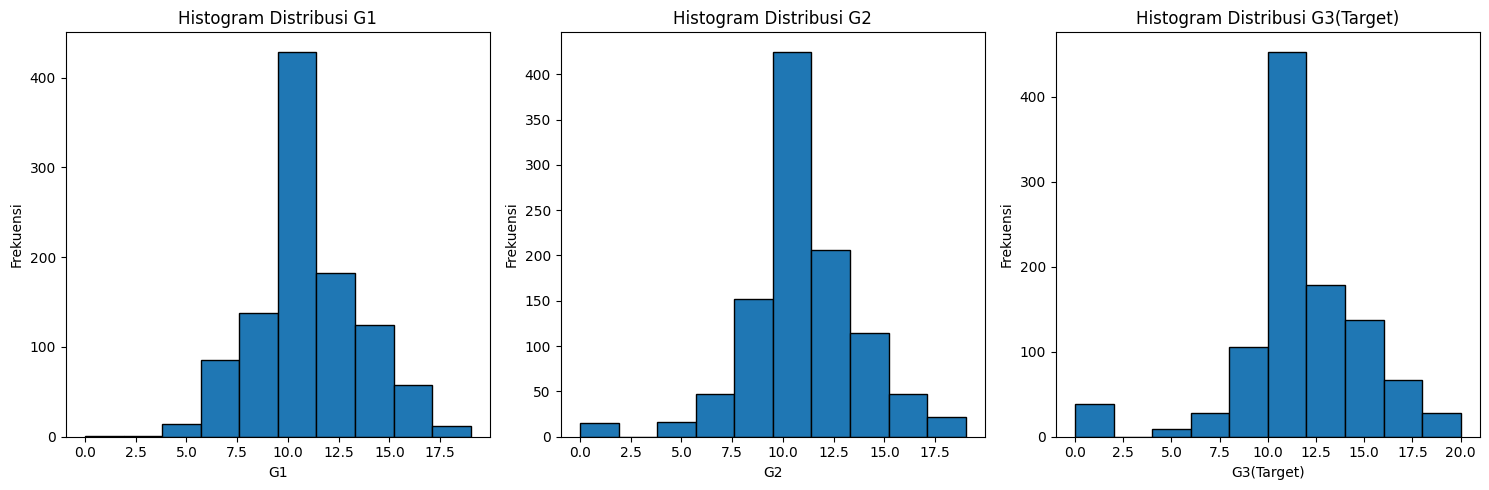

In [ ]:
# Membuat figure dan axes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Membuat histogram untuk setiap kolom
for i, col in enumerate(['G1', 'G2', 'G3(Target)']):
    axes[i].hist(df_STP[col], edgecolor='black')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frekuensi')
    axes[i].set_title(f'Histogram Distribusi {col}')

# Menyesuaikan layout
plt.tight_layout()
plt.show()

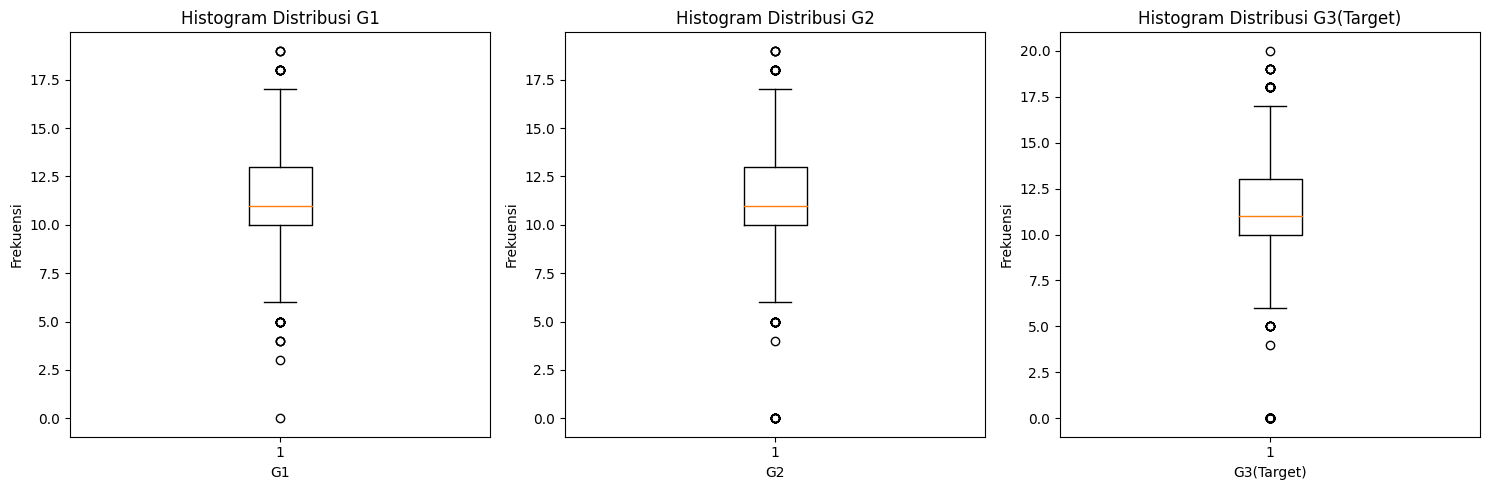

In [ ]:
# Membuat figure dan axes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Membuat histogram untuk setiap kolom
for i, col in enumerate(['G1', 'G2', 'G3(Target)']):
    axes[i].boxplot(df_STP[col])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frekuensi')
    axes[i].set_title(f'Histogram Distribusi {col}')

# Menyesuaikan layout
plt.tight_layout()
plt.show()

In [ ]:
df_STP = hapus_all_outlier(df_STP)

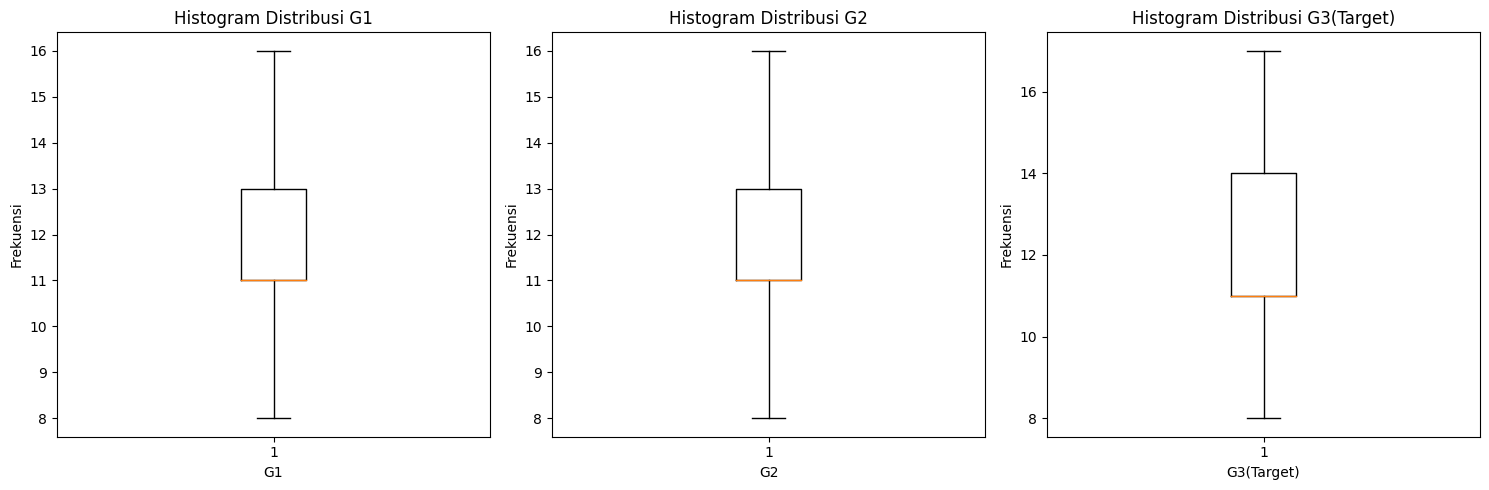

In [ ]:
# Membuat figure dan axes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Membuat histogram untuk setiap kolom
for i, col in enumerate(['G1', 'G2', 'G3(Target)']):
    axes[i].boxplot(df_STP[col])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frekuensi')
    axes[i].set_title(f'Histogram Distribusi {col}')

# Menyesuaikan layout
plt.tight_layout()
plt.show()

In [ ]:
# Ubah ke Int
df_STP[['G1', 'G2', 'G3(Target)']] = df_STP[['G1', 'G2', 'G3(Target)']].astype(float).astype(int)

In [ ]:
# Atasi null Value
df_STP.isna().sum()

school        0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
health        0
absences      0
G1            0
G2            0
G3(Target)    0
dtype: int64

# **---2---> Pre Processing - STP**

> **Buat kolom baru menjadi apakah status pekerjaan orang tua merupakan guru atau tidak**

In [ ]:
df_STP['Mjob'].unique()

array(['at_home', 'other', 'services', 'teacher', 'health'], dtype=object)

In [ ]:
# Buat kolom baru dan isi dengan 1 jika Mjob adalah 'teacher', 0 jika bukan
df_STP['Mjob'] = np.where(df_STP['Mjob'] == 'teacher', 'yes', 'no')
df_STP = df_STP.rename(columns={'Mjob': 'Mjob(Teacher)'})

# Buat kolom baru dan isi dengan 1 jika Fjob adalah 'teacher', 0 jika bukan
df_STP['Fjob'] = np.where(df_STP['Fjob'] == 'teacher', 'yes', 'no')
df_STP = df_STP.rename(columns={'Fjob': 'Fjob(Teacher)'})

> **ENCODING**

In [ ]:
# One Hot Encoding
kolom = ['school', 'Pstatus', 'Mjob(Teacher)', 'Fjob(Teacher)', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'internet', 'romantic']

onehot = pd.get_dummies(df_STP[kolom]).astype(int)

df_STP = pd.concat([df_STP, onehot], axis=1)

df_STP = df_STP.drop(columns = kolom, axis=1)

df_STP.head()

Medu  Fedu  traveltime  studytime  failures  famrel  freetime  goout  \
2      1     1           1          2         0       4         3      2   
4      3     3           1          2         0       4         3      2   
6      2     2           1          2         0       4         4      4   
8      4     2           1          2         0       4         2      2   
10     4     4           1          2         0       4         3      3   

    health  absences  ...  paid_no  paid_yes  activities_no  activities_yes  \
2        5         6  ...        1         0              1               0   
4        5         0  ...        1         0              1               0   
6        3         0  ...        1         0              1               0   
8        5         0  ...        1         0              1               0   
10       2         0  ...        1         0              1               0   

    nursery_no  nursery_yes  internet_no  internet_yes  romantic_no  \
2            0            1            0             1            1   
4            0            1            1             0            1   
6            0            1            0             1            1   
8            0            1            0             1            1   
10           0            1            0             1            1   

    romantic_yes  
2              0  
4              0  
6              0  
8              0  
10             0  

[5 rows x 35 columns]

# **---3---> Hasil - STP**

In [ ]:
check_regression(df_STP, 'G3(Target)', '2426_STP')

'Data berhasil disimpan'

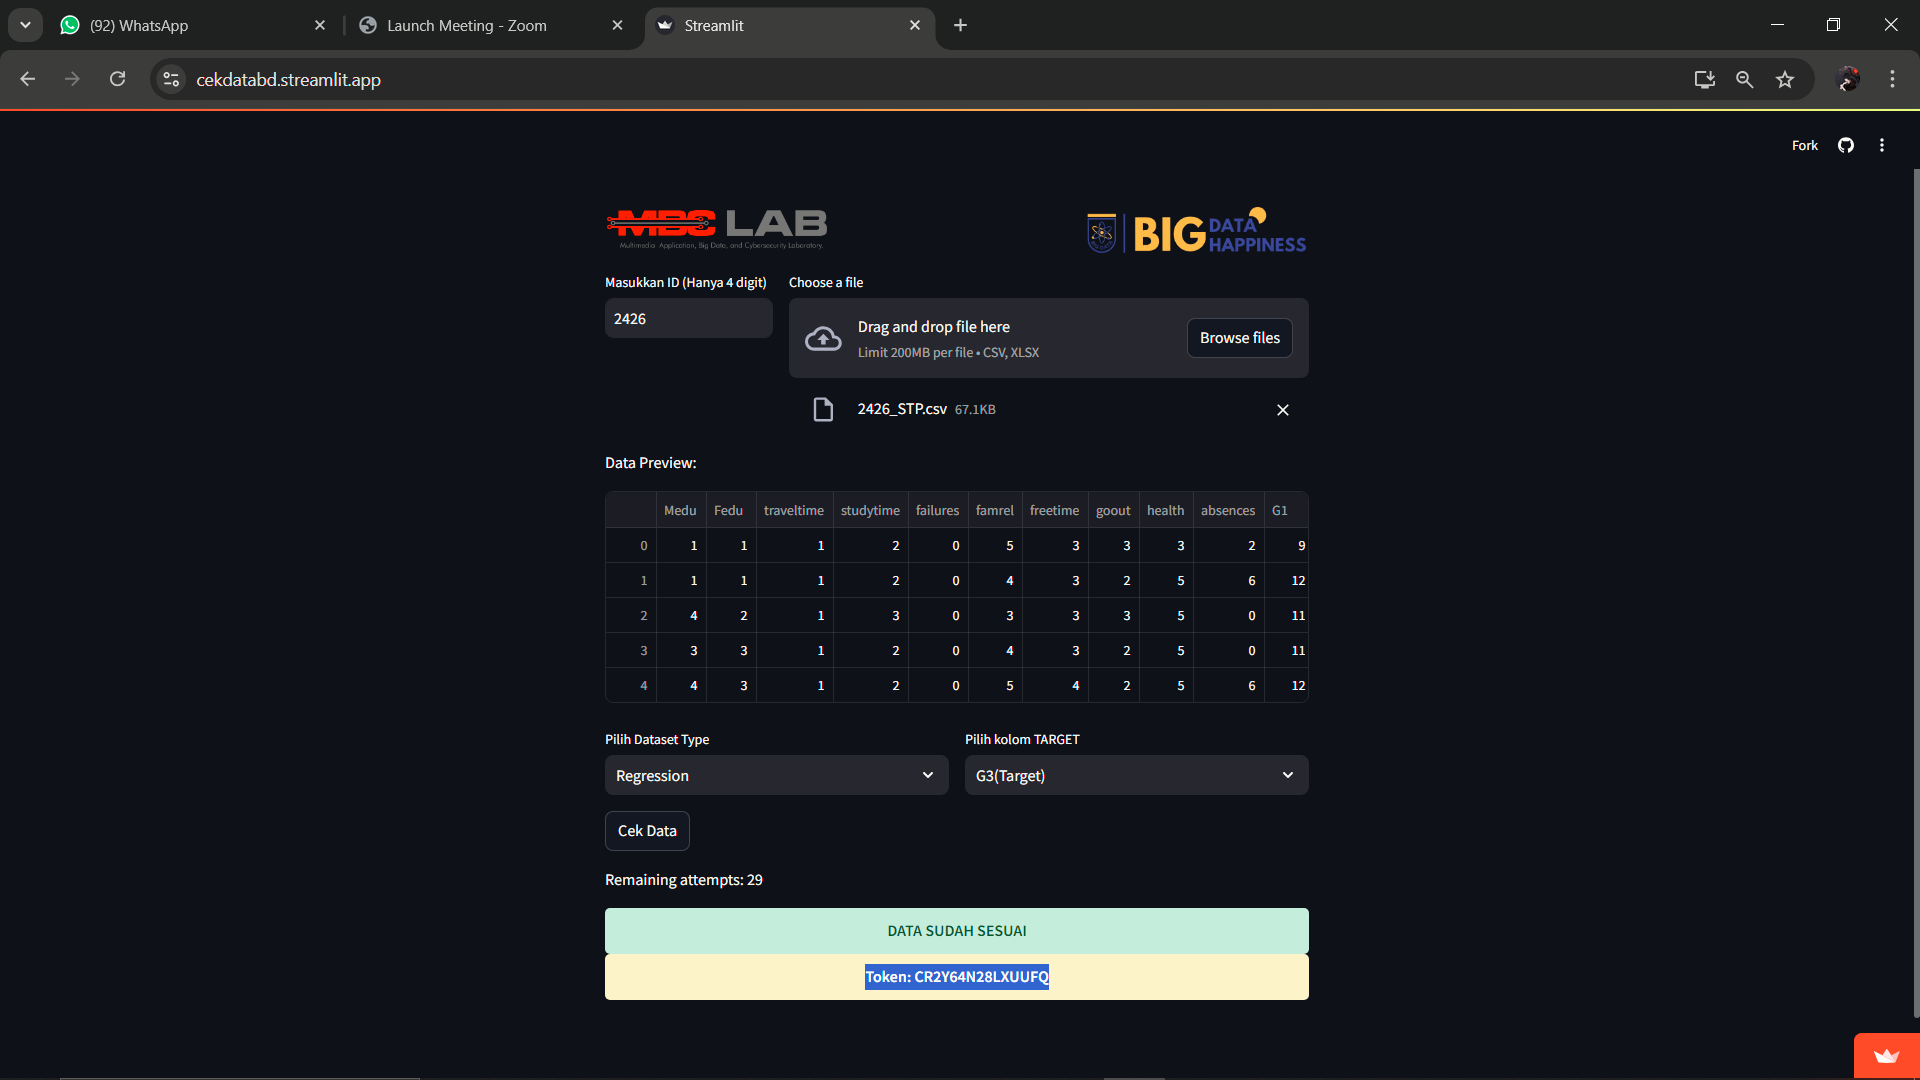

In [ ]:
Image(filename='/content/STP_token.png')

**Token:** CR2Y64N28LXUUFQ

# **FDC**

Dataset tentang preferensi makanan pilihan masing2 individu

In [ ]:
# Panggil Dataset
df_FDC = pd.read_csv("/content/FDC.csv")

In [ ]:
df_FDC.head()

GPA  Gender  breakfast  calories_chicken  calories_day  calories_scone  \
0    2.4       2          1               430           NaN           315.0   
1  3.654       1          1               610           3.0           420.0   
2    3.3       1          1               720           4.0           420.0   
3    3.2       1          1               430           3.0           420.0   
4    3.5       1          1               720           2.0           420.0   

   coffee                      comfort_food        comfort_food_reasons  \
0       1                              none       we dont have comfort    
1       2       chocolate, chips, ice cream        Stress, bored, anger   
2       2   frozen yogurt, pizza, fast food             stress, sadness   
3       2  Pizza, Mac and cheese, ice cream                     Boredom   
4       2      Ice cream, chocolate, chips   Stress, boredom, cravings    

   comfort_food_reasons_coded  ...  soup  sports  thai_food tortilla_calories  \
0                         9.0  ...   1.0     1.0          1            1165.0   
1                         1.0  ...   1.0     1.0          2             725.0   
2                         1.0  ...   1.0     2.0          5            1165.0   
3                         2.0  ...   1.0     2.0          5             725.0   
4                         1.0  ...   1.0     1.0          4             940.0   

   turkey_calories  type_sports veggies_day  vitamins  waffle_calories  \
0              345   car racing           5         1             1315   
1              690  Basketball            4         2              900   
2              500         none           5         1              900   
3              690          NaN           3         1             1315   
4              500     Softball           4         2              760   

                     weight  
0                       187  
1                       155  
2  I'm not answering this.   
3             Not sure, 240  
4                       190  

[5 rows x 61 columns]

# **---1---> Data Cleaning - FDC**

> **DROP FITUR TIDAK RELEVAN**

*   **Fitur Target :** Weight
*   **Model :** Regresi

In [ ]:
kolom = ['GPA', 'Gender', 'comfort_food', 'comfort_food_reasons', 'comfort_food_reasons_coded.1', 'diet_current', 'eating_changes', 'father_education', 'father_profession', 'fav_cuisine', 'food_childhood', 'grade_level', 'healthy_meal', 'ideal_diet', 'meals_dinner_friend', 'mother_education', 'mother_profession', 'on_off_campus', 'type_sports']

# Drop Kolom yang tidak Relevan
df_FDC = df_FDC.drop(columns = kolom, axis=1)

> **HANDLING NULL VALUES**

In [ ]:
df_FDC['weight'].unique()

array(['187', '155', "I'm not answering this. ", 'Not sure, 240', '190',
       '180', '137', '125', '116', '110', '264', '123', '185', '145',
       '170', '135', '165', '175', '195', '105', '160', '167', '115',
       '205', nan, '128', '150', '140', '120', '100', '113', '168', '169',
       '200', '265', '192', '118', '210', '112', '144 lbs', '130', '127',
       '129', '260', '184', '230', '138', '156'], dtype=object)

In [ ]:
df_FDC['weight'] = df_FDC['weight'].replace('Not sure, 240', '240')
df_FDC['weight'] = df_FDC['weight'].replace('144 lbs', '144')
df_FDC['weight'] = df_FDC['weight'].replace("I'm not answering this. ", np.NaN)

df_FDC['weight'] = df_FDC['weight'].astype(float)

In [ ]:
# Cek missing values
null = df_FDC.isnull().sum()
print(null[null > 0])

calories_day                  19
calories_scone                 1
comfort_food_reasons_coded    19
cook                           3
cuisine                       17
drink                          2
employment                     9
exercise                      13
fav_food                       2
income                         1
life_rewarding                 1
marital_status                 1
persian_food                   1
self_perception_weight         1
soup                           1
sports                         2
tortilla_calories              1
weight                         3
dtype: int64


> **MENANGANI OUTLIERS**

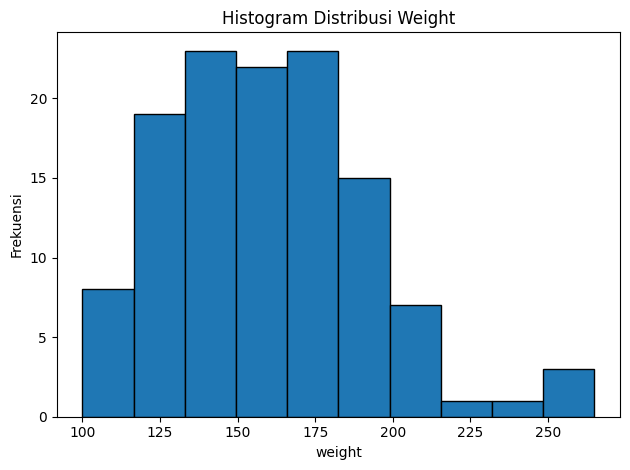

In [ ]:
# Histogram Before
plt.hist(df_FDC['weight'], edgecolor='black')
plt.xlabel('weight')
plt.ylabel('Frekuensi')
plt.title(f'Histogram Distribusi Weight')

# Menyesuaikan layout
plt.tight_layout()
plt.show()

In [ ]:
df_FDC['weight'] = df_FDC['weight'].fillna(df_FDC['weight'].median())

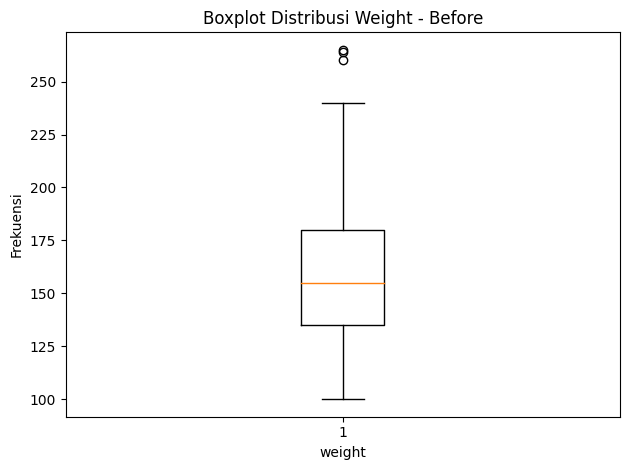

In [ ]:
# Cek Outliers
plt.boxplot(df_FDC['weight'])
plt.xlabel('weight')
plt.ylabel('Frekuensi')
plt.title(f'Boxplot Distribusi Weight - Before')

plt.tight_layout()
plt.show()

In [ ]:
df_FDC = replace_outlier_median(df_FDC, 'weight')
df_FDC = replace_outlier_median(df_FDC, 'weight')

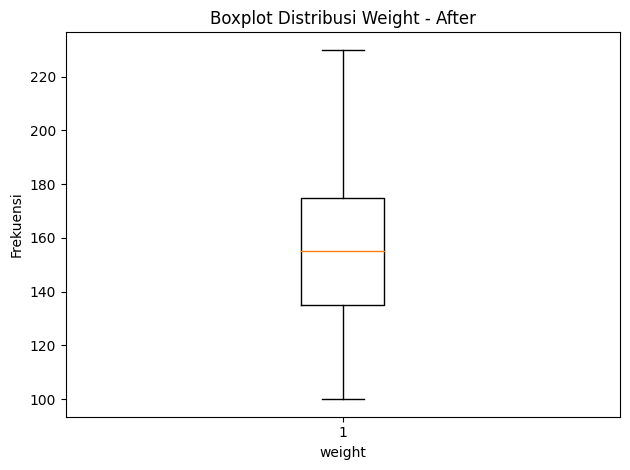

In [ ]:
# Histogram After
plt.boxplot(df_FDC['weight'])
plt.xlabel('weight')
plt.ylabel('Frekuensi')
plt.title(f'Boxplot Distribusi Weight - After')

# Menyesuaikan layout
plt.tight_layout()
plt.show()

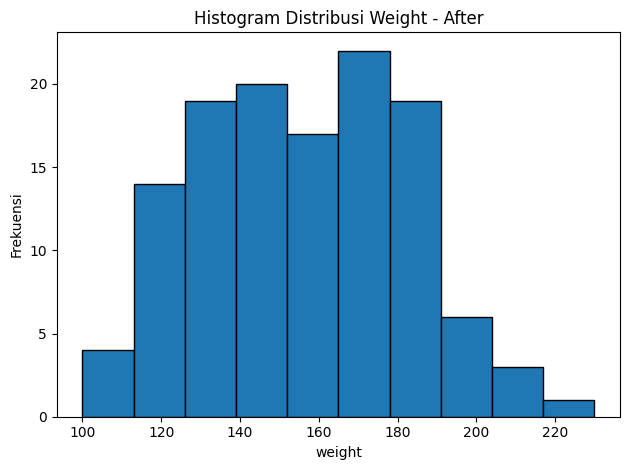

In [ ]:
# Histogram After
plt.hist(df_FDC['weight'], edgecolor='black')
plt.xlabel('weight')
plt.ylabel('Frekuensi')
plt.title(f'Histogram Distribusi Weight - After')

# Menyesuaikan layout
plt.tight_layout()
plt.show()

In [ ]:
# Cek missing values
null = df_FDC.isnull().sum()
print(null[null > 0])

calories_day                  19
calories_scone                 1
comfort_food_reasons_coded    19
cook                           3
cuisine                       17
drink                          2
employment                     9
exercise                      13
fav_food                       2
income                         1
life_rewarding                 1
marital_status                 1
persian_food                   1
self_perception_weight         1
soup                           1
sports                         2
tortilla_calories              1
dtype: int64


In [ ]:
df_FDC['calories_day'].unique()

array([nan,  3.,  4.,  2.])

In [ ]:
# Kasus hilang data [NaN, 2, 3, 4]
df_FDC['calories_day'] = df_FDC['calories_day'].fillna(1)

In [ ]:
# Modus
df_FDC = fill_mode_na(df_FDC)

In [ ]:
# Ubah tipe data kalori ke float
df_FDC[['calories_chicken', 'turkey_calories', 'waffle_calories']] = df_FDC[['calories_chicken', 'turkey_calories', 'waffle_calories']].astype(float)

# Ubah tipe data kategori ke int
df_FDC[['comfort_food_reasons_coded', 'calories_day', 'cook', 'cuisine', 'drink', 'employment', 'exercise', 'fav_food', 'income', 'life_rewarding', 'marital_status', 'persian_food', 'self_perception_weight', 'soup', 'sports']] = df_FDC[['comfort_food_reasons_coded', 'calories_day', 'cook', 'cuisine', 'drink', 'employment', 'exercise', 'fav_food', 'income', 'life_rewarding', 'marital_status', 'persian_food', 'self_perception_weight', 'soup', 'sports']].astype(int)

In [ ]:
# Cek missing values
null = df_FDC.isnull().sum()
print(null[null > 0])

Series([], dtype: int64)


In [ ]:
# Cek Duplikasi
df_FDC.duplicated().sum()

0

# **---2---> Pre Processing - FDC**

In [ ]:
df_FDC.head()

breakfast  calories_chicken  calories_day  calories_scone  coffee  \
0          1             430.0             1           315.0       1   
1          1             610.0             3           420.0       2   
2          1             720.0             4           420.0       2   
3          1             430.0             3           420.0       2   
4          1             720.0             2           420.0       2   

   comfort_food_reasons_coded  cook  cuisine  diet_current_coded  drink  ...  \
0                           9     2        1                   1      1  ...   
1                           1     3        1                   2      2  ...   
2                           1     1        3                   3      1  ...   
3                           2     2        2                   2      2  ...   
4                           1     1        2                   2      2  ...   

   self_perception_weight  soup  sports  thai_food  tortilla_calories  \
0                       3     1       1          1             1165.0   
1                       3     1       1          2              725.0   
2                       6     1       2          5             1165.0   
3                       5     1       2          5              725.0   
4                       4     1       1          4              940.0   

   turkey_calories  veggies_day  vitamins  waffle_calories  weight  
0            345.0            5         1           1315.0   187.0  
1            690.0            4         2            900.0   155.0  
2            500.0            5         1            900.0   155.0  
3            690.0            3         1           1315.0   155.0  
4            500.0            4         2            760.0   190.0  

[5 rows x 42 columns]

> **SCALING**

In [ ]:
# Menyamakan skala
from sklearn.preprocessing import MinMaxScaler

# Min-Max Scaling
scaler = MinMaxScaler()
df_FDC[['calories_chicken', 'calories_scone', 'tortilla_calories', 'turkey_calories', 'waffle_calories', 'weight']] = scaler.fit_transform(df_FDC[['calories_chicken', 'calories_scone', 'tortilla_calories', 'turkey_calories', 'waffle_calories', 'weight']])

In [ ]:
df_FDC.head()

breakfast  calories_chicken  calories_day  calories_scone  coffee  \
0          1          0.362637             1        0.000000       1   
1          1          0.758242             3        0.157895       2   
2          1          1.000000             4        0.157895       2   
3          1          0.362637             3        0.157895       2   
4          1          1.000000             2        0.157895       2   

   comfort_food_reasons_coded  cook  cuisine  diet_current_coded  drink  ...  \
0                           9     2        1                   1      1  ...   
1                           1     3        1                   2      2  ...   
2                           1     1        3                   3      1  ...   
3                           2     2        2                   2      2  ...   
4                           1     1        2                   2      2  ...   

   self_perception_weight  soup  sports  thai_food  tortilla_calories  \
0                       3     1       1          1           1.000000   
1                       3     1       1          2           0.247863   
2                       6     1       2          5           1.000000   
3                       5     1       2          5           0.247863   
4                       4     1       1          4           0.615385   

   turkey_calories  veggies_day  vitamins  waffle_calories    weight  
0         0.000000            5         1         1.000000  0.669231  
1         0.683168            4         2         0.439189  0.423077  
2         0.306931            5         1         0.439189  0.423077  
3         0.683168            3         1         1.000000  0.423077  
4         0.306931            4         2         0.250000  0.692308  

[5 rows x 42 columns]

# **---3---> Hasil - FDC**

In [ ]:
check_regression(df_FDC, 'weight', '2426_FDC')

'Data berhasil disimpan'

**Token :** 362XE8234004W1W

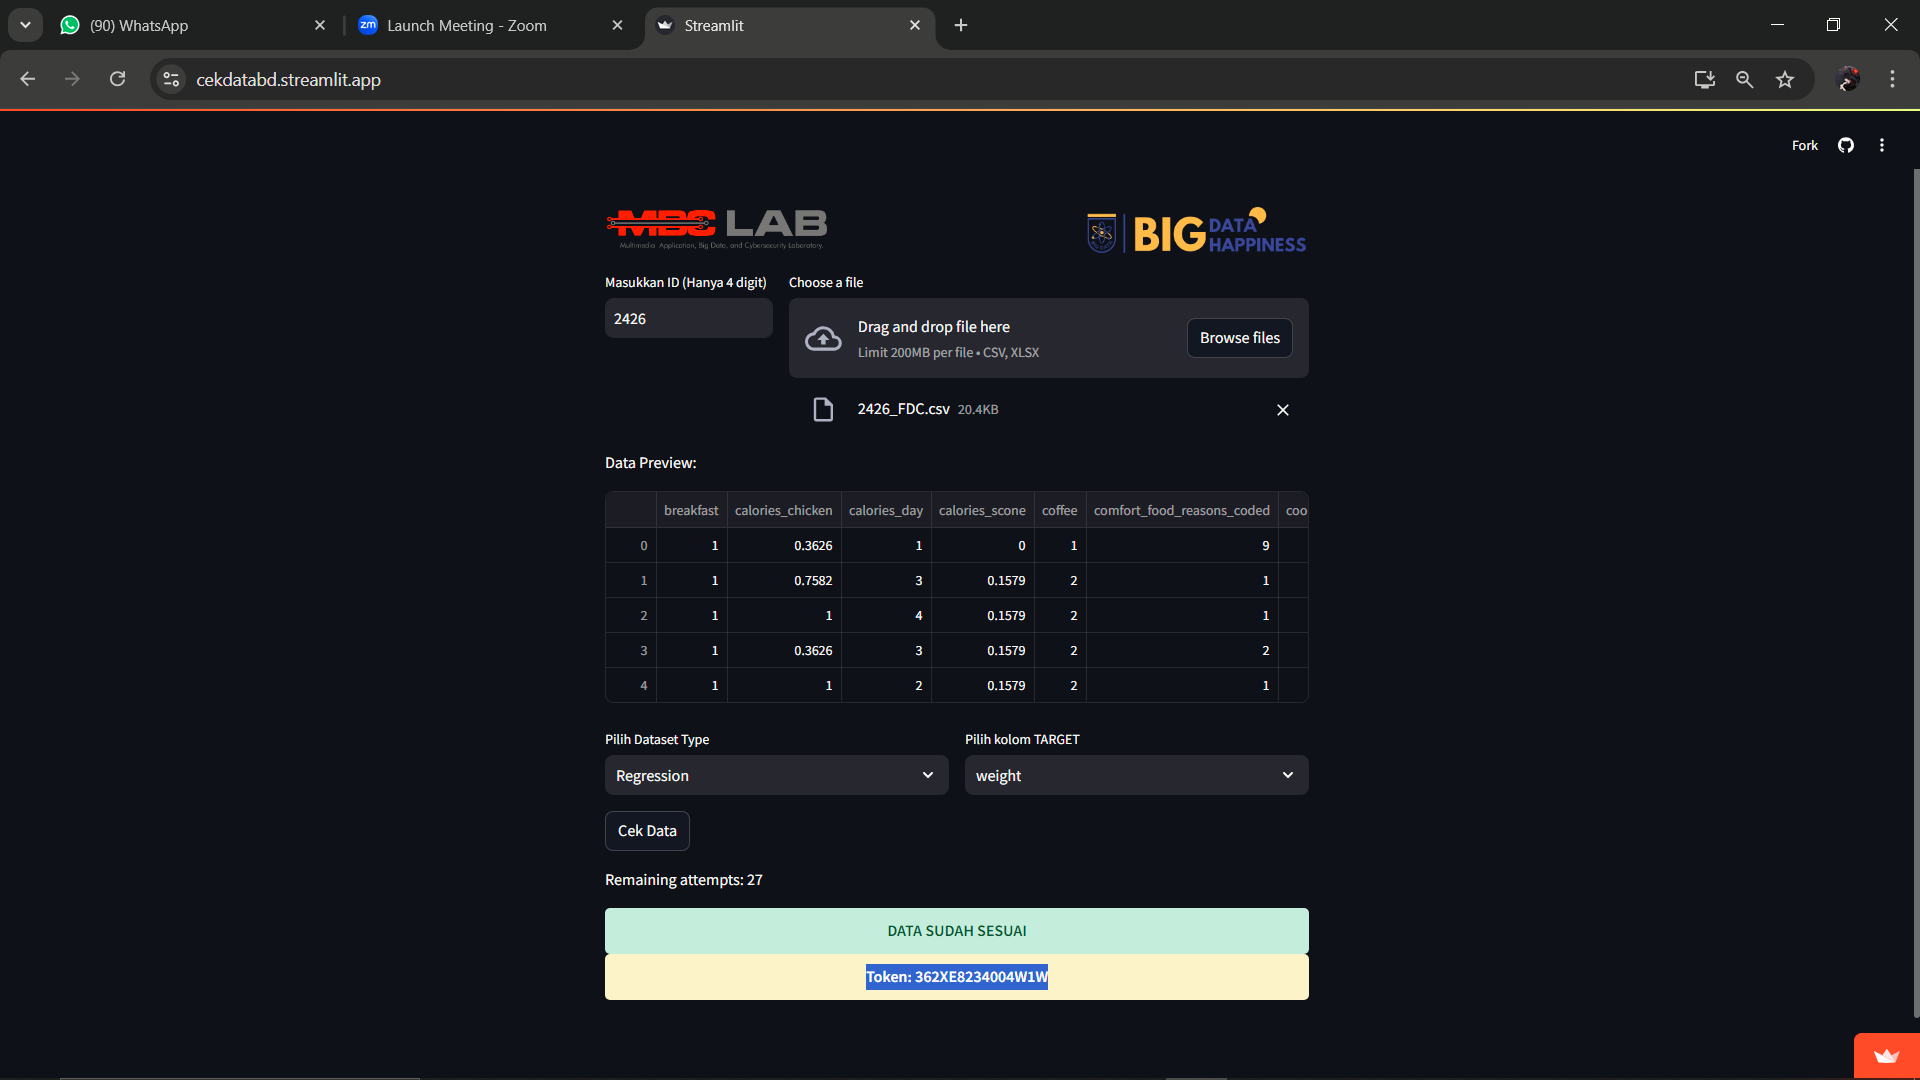

In [ ]:
Image(filename='/content/FDC_token.png')

# **LTP**

Dataset tentang jenis2 spek laptop dan harganya

In [ ]:
# Panggil Dataset
df_LTP = pd.read_csv("/content/LTP.csv", encoding='latin-1')

In [ ]:
df_LTP.head()

laptop_ID Company      Product   TypeName  Inches  \
0          1   Apple  MacBook Pro  Ultrabook    13.3   
1          2   Apple  Macbook Air  Ultrabook    13.3   
2          3      HP       250 G6   Notebook    15.6   
3          4   Apple  MacBook Pro  Ultrabook    15.4   
4          5   Apple  MacBook Pro  Ultrabook    13.3   

                     ScreenResolution                         Cpu   Ram  \
0  IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz   8GB   
1                            1440x900        Intel Core i5 1.8GHz   8GB   
2                   Full HD 1920x1080  Intel Core i5 7200U 2.5GHz   8GB   
3  IPS Panel Retina Display 2880x1800        Intel Core i7 2.7GHz  16GB   
4  IPS Panel Retina Display 2560x1600        Intel Core i5 3.1GHz   8GB   

                Memory                           Gpu  OpSys  Weight  \
0            128GB SSD  Intel Iris Plus Graphics 640  macOS  1.37kg   
1  128GB Flash Storage        Intel HD Graphics 6000  macOS  1.34kg   
2            256GB SSD         Intel HD Graphics 620  No OS  1.86kg   
3            512GB SSD            AMD Radeon Pro 455  macOS  1.83kg   
4            256GB SSD  Intel Iris Plus Graphics 650  macOS  1.37kg   

   Price_euros  
0      1339.69  
1       898.94  
2       575.00  
3      2537.45  
4      1803.60

# **---1---> Data Cleaning - LTP**

> **DROP FITUR TIDAK RELEVAN**

*   **Fitur Target :** Prices_euros
*   **Model :** Regresi

In [ ]:
kolom = ['laptop_ID', 'Product']

# Drop Kolom yang tidak Relevan
df_LTP = df_LTP.drop(columns = kolom, axis=1)

> **HANDLING NULL VALUES**

In [ ]:
# Cek missing values
null = df_LTP.isnull().sum()
print(null[null > 0])

Series([], dtype: int64)


In [ ]:
# Cek Duplikasi
df_LTP.duplicated().sum()

29

In [ ]:
#df_LTP = df_LTP.drop_duplicates()



> **Handling Data Type**



In [ ]:
df_LTP['Ram'] = df_LTP['Ram'].str.replace('GB', '').astype('int')
df_LTP['Weight'] = df_LTP['Weight'].str.replace('kg', '').astype('float')

In [ ]:
df_LTP.head()

Company   TypeName  Inches                    ScreenResolution  \
0   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Ultrabook    13.3                            1440x900   
2      HP   Notebook    15.6                   Full HD 1920x1080   
3   Apple  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

                          Cpu  Ram               Memory  \
0        Intel Core i5 2.3GHz    8            128GB SSD   
1        Intel Core i5 1.8GHz    8  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz    8            256GB SSD   
3        Intel Core i7 2.7GHz   16            512GB SSD   
4        Intel Core i5 3.1GHz    8            256GB SSD   

                            Gpu  OpSys  Weight  Price_euros  
0  Intel Iris Plus Graphics 640  macOS    1.37      1339.69  
1        Intel HD Graphics 6000  macOS    1.34       898.94  
2         Intel HD Graphics 620  No OS    1.86       575.00  
3            AMD Radeon Pro 455  macOS    1.83      2537.45  
4  Intel Iris Plus Graphics 650  macOS    1.37      1803.60

# **---2---> Pre Processing - LTP**

> **Buat kolom PPI**

In [ ]:
df_LTP['Touchscreen'] = df_LTP['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
df_LTP['IPS'] = df_LTP['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [ ]:
df_LTP.head()

Company   TypeName  Inches                    ScreenResolution  \
0   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Ultrabook    13.3                            1440x900   
2      HP   Notebook    15.6                   Full HD 1920x1080   
3   Apple  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

                          Cpu  Ram               Memory  \
0        Intel Core i5 2.3GHz    8            128GB SSD   
1        Intel Core i5 1.8GHz    8  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz    8            256GB SSD   
3        Intel Core i7 2.7GHz   16            512GB SSD   
4        Intel Core i5 3.1GHz    8            256GB SSD   

                            Gpu  OpSys  Weight  Price_euros  Touchscreen  IPS  
0  Intel Iris Plus Graphics 640  macOS    1.37      1339.69            0    1  
1        Intel HD Graphics 6000  macOS    1.34       898.94            0    0  
2         Intel HD Graphics 620  No OS    1.86       575.00            0    0  
3            AMD Radeon Pro 455  macOS    1.83      2537.45            0    1  
4  Intel Iris Plus Graphics 650  macOS    1.37      1803.60            0    1

In [ ]:
# Pisahkan Resolusi
splitbyX = df_LTP['ScreenResolution'].str.split('x', n=1, expand=True)
df_LTP['X_resolution'] = splitbyX[0]
df_LTP['Y_resolution'] = splitbyX[1]

# Hilangkan index kata terakhir
df_LTP['X_resolution'] = df_LTP['X_resolution'].str[-4:]

In [ ]:
df_LTP['X_resolution'] = df_LTP['X_resolution'].astype('int')
df_LTP['Y_resolution'] = df_LTP['Y_resolution'].astype('int')

In [ ]:
df_LTP['PPI'] = df_LTP.apply(lambda row: np.sqrt(row['X_resolution']**2 + row['Y_resolution']**2) / row['Inches'], axis=1)

In [ ]:
drops = ['ScreenResolution', 'X_resolution', 'Y_resolution','Inches']

df_LTP.drop(columns=drops, inplace=True)

In [ ]:
df_LTP.head()

Company   TypeName                         Cpu  Ram               Memory  \
0   Apple  Ultrabook        Intel Core i5 2.3GHz    8            128GB SSD   
1   Apple  Ultrabook        Intel Core i5 1.8GHz    8  128GB Flash Storage   
2      HP   Notebook  Intel Core i5 7200U 2.5GHz    8            256GB SSD   
3   Apple  Ultrabook        Intel Core i7 2.7GHz   16            512GB SSD   
4   Apple  Ultrabook        Intel Core i5 3.1GHz    8            256GB SSD   

                            Gpu  OpSys  Weight  Price_euros  Touchscreen  IPS  \
0  Intel Iris Plus Graphics 640  macOS    1.37      1339.69            0    1   
1        Intel HD Graphics 6000  macOS    1.34       898.94            0    0   
2         Intel HD Graphics 620  No OS    1.86       575.00            0    0   
3            AMD Radeon Pro 455  macOS    1.83      2537.45            0    1   
4  Intel Iris Plus Graphics 650  macOS    1.37      1803.60            0    1   

          PPI  
0  226.983005  
1  127.677940  
2  141.211998  
3  220.534624  
4  226.983005



> **Pisahkan Kolom Memory**



In [ ]:
# Ambil kata SSD
df_LTP['SSD'] = df_LTP['Memory'].apply(lambda value: value if 'SSD'  in value else '0')
df_LTP['SSD'] = df_LTP['SSD'].apply(lambda value: '0' if '+' in value else value)
df_LTP['SSD']
SSD = df_LTP['SSD'].str.split('SSD', n=1, expand=True)
df_LTP['SSD'] = SSD[0]
df_LTP['SSD'] = df_LTP['SSD'].str.replace('GB','')
df_LTP['SSD'] = df_LTP['SSD'].apply(lambda value: int(value.split('TB')[0]) * 1024 if 'TB' in value else value)
df_LTP['SSD'] = df_LTP['SSD'].astype('int')

In [ ]:
# Ambil kata HDD
df_LTP['HDD'] = df_LTP['Memory'].apply(lambda value: value if 'HDD' in value else '0')
HDD = df_LTP['HDD'].str.split('HDD', n=1, expand=True)
df_LTP['HDD'] = HDD[0]
df_LTP['HDD'] = df_LTP['HDD'].str.replace('GB','')
df_LTP['HDD'] = df_LTP['HDD'].apply(lambda value: value[-4:] if 'TB' in value else value)
df_LTP['HDD'] = df_LTP['HDD'].apply(lambda value: '0' if '+' in value else value)
df_LTP['HDD'] = df_LTP['HDD'].apply(lambda value: int(value.split('TB')[0]) * 1024 if 'TB' in value else value)
df_LTP['HDD'] = df_LTP['HDD'].astype('int')

In [ ]:
# Ambil kata FS
df_LTP['FS'] = df_LTP['Memory'].apply(lambda value: value if 'Flash Storage' in value else '0')
FS = df_LTP['FS'].str.split('Flash Storage', n=1, expand=True)
df_LTP['FS'] = FS[0]
df_LTP['FS'] = df_LTP['FS'].str.replace('GB','')
df_LTP['FS'] = df_LTP['FS'].apply(lambda value: int(value.split('TB')[0]) * 1024 if 'TB' in value else value)
df_LTP['FS'] = df_LTP['FS'].astype('int')

In [ ]:
df_LTP.drop(columns=['Memory'], inplace=True)



> **Kolom CPU**



In [ ]:
df_LTP['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [ ]:
df_LTP['Cpu_x'] = df_LTP['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [ ]:
def bagi_processor(proc):
    if proc == 'Intel Core i7' or proc == 'Intel Core i5' or proc == 'Intel Core i3':
        return proc
    elif proc.split()[0] == 'Intel':
        return 'Other Intel'
    else:
        return 'AMD'

df_LTP['Brand_Cpu'] = df_LTP['Cpu_x'].apply(bagi_processor)

# Hapus kolom
df_LTP.drop(columns=['Cpu', 'Cpu_x'], inplace=True)

In [ ]:
df_LTP['Brand_Cpu'].value_counts()

Brand_Cpu
Intel Core i7    527
Intel Core i5    423
Other Intel      154
Intel Core i3    136
AMD               63
Name: count, dtype: int64

In [ ]:
df_LTP['Brand_Gpu'] = df_LTP['Gpu'].apply(lambda x:x.split()[0])

df_LTP.drop(columns=['Gpu'], inplace=True)

> **Bagi Operasi Sistem**

In [ ]:
df_LTP['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [ ]:
def bagi_Ops(Ops):
    if Ops == 'Windows 10' or Ops == 'Windows 10 S' or Ops == 'Windows 7':
        return 'Windows'
    elif Ops == 'macOS' or Ops == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others'

df_LTP['OS'] = df_LTP['OpSys'].apply(bagi_Ops)

# Hapus kolom
df_LTP.drop(columns=['OpSys'], inplace=True)



> **Outliers**



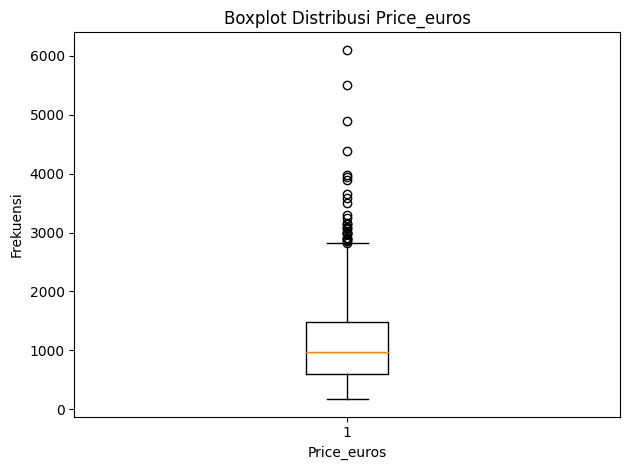

In [ ]:
# Cek Outliers
plt.boxplot(df_LTP['Price_euros'])
plt.xlabel('Price_euros')
plt.ylabel('Frekuensi')
plt.title(f'Boxplot Distribusi Price_euros')

plt.tight_layout()
plt.show()

In [ ]:
df_LTP = cap_floor(df_LTP, 'Price_euros')

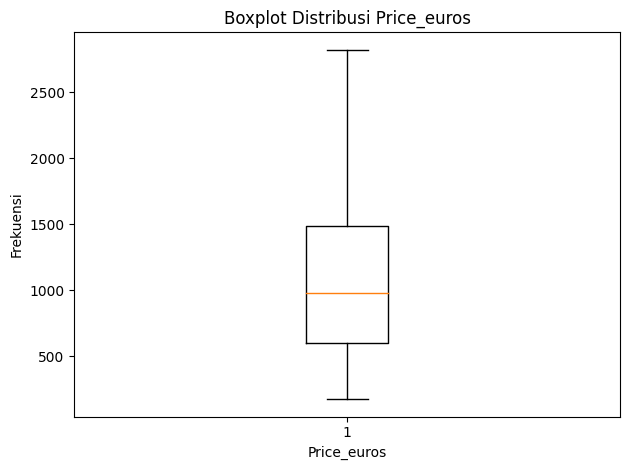

In [ ]:
# Cek Outliers
plt.boxplot(df_LTP['Price_euros'])
plt.xlabel('Price_euros')
plt.ylabel('Frekuensi')
plt.title(f'Boxplot Distribusi Price_euros')

plt.tight_layout()
plt.show()

In [ ]:
# Cek Duplikasi
df_LTP.duplicated().sum()

32

In [ ]:
df_LTP = df_LTP.drop_duplicates()



> **ENCODING**



In [ ]:
# Encoding Label
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_LTP['Company'] = le.fit_transform(df_LTP['Company'])
df_LTP['TypeName'] = le.fit_transform(df_LTP['TypeName'])
df_LTP['Brand_Cpu'] = le.fit_transform(df_LTP['Brand_Cpu'])
df_LTP['Brand_Gpu'] = le.fit_transform(df_LTP['Brand_Gpu'])
df_LTP['OS'] = le.fit_transform(df_LTP['OS'])

<ipython-input-84-a91a8bdad2da>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_LTP['Company'] = le.fit_transform(df_LTP['Company'])
<ipython-input-84-a91a8bdad2da>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_LTP['TypeName'] = le.fit_transform(df_LTP['TypeName'])
<ipython-input-84-a91a8bdad2da>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

In [ ]:
df_LTP.head(5)

Company  TypeName  Ram  Weight  Price_euros  Touchscreen  IPS         PPI  \
0        1         4    8    1.37      1339.69            0    1  226.983005   
1        1         4    8    1.34       898.94            0    0  127.677940   
2        7         3    8    1.86       575.00            0    0  141.211998   
3        1         4   16    1.83      2537.45            0    1  220.534624   
4        1         4    8    1.37      1803.60            0    1  226.983005   

   SSD  HDD   FS  Brand_Cpu  Brand_Gpu  OS  
0  128    0    0          2          2   0  
1    0    0  128          2          2   0  
2  256    0    0          2          2   1  
3  512    0    0          3          0   0  
4  256    0    0          2          2   0

# **---3---> Hasil - LTP**

In [ ]:
# Bener Ga
check_regression(df_LTP, 'Price_euros', '2426_LTP')

'Data berhasil disimpan'

**Token:** 22XU6TKKL24L8FH

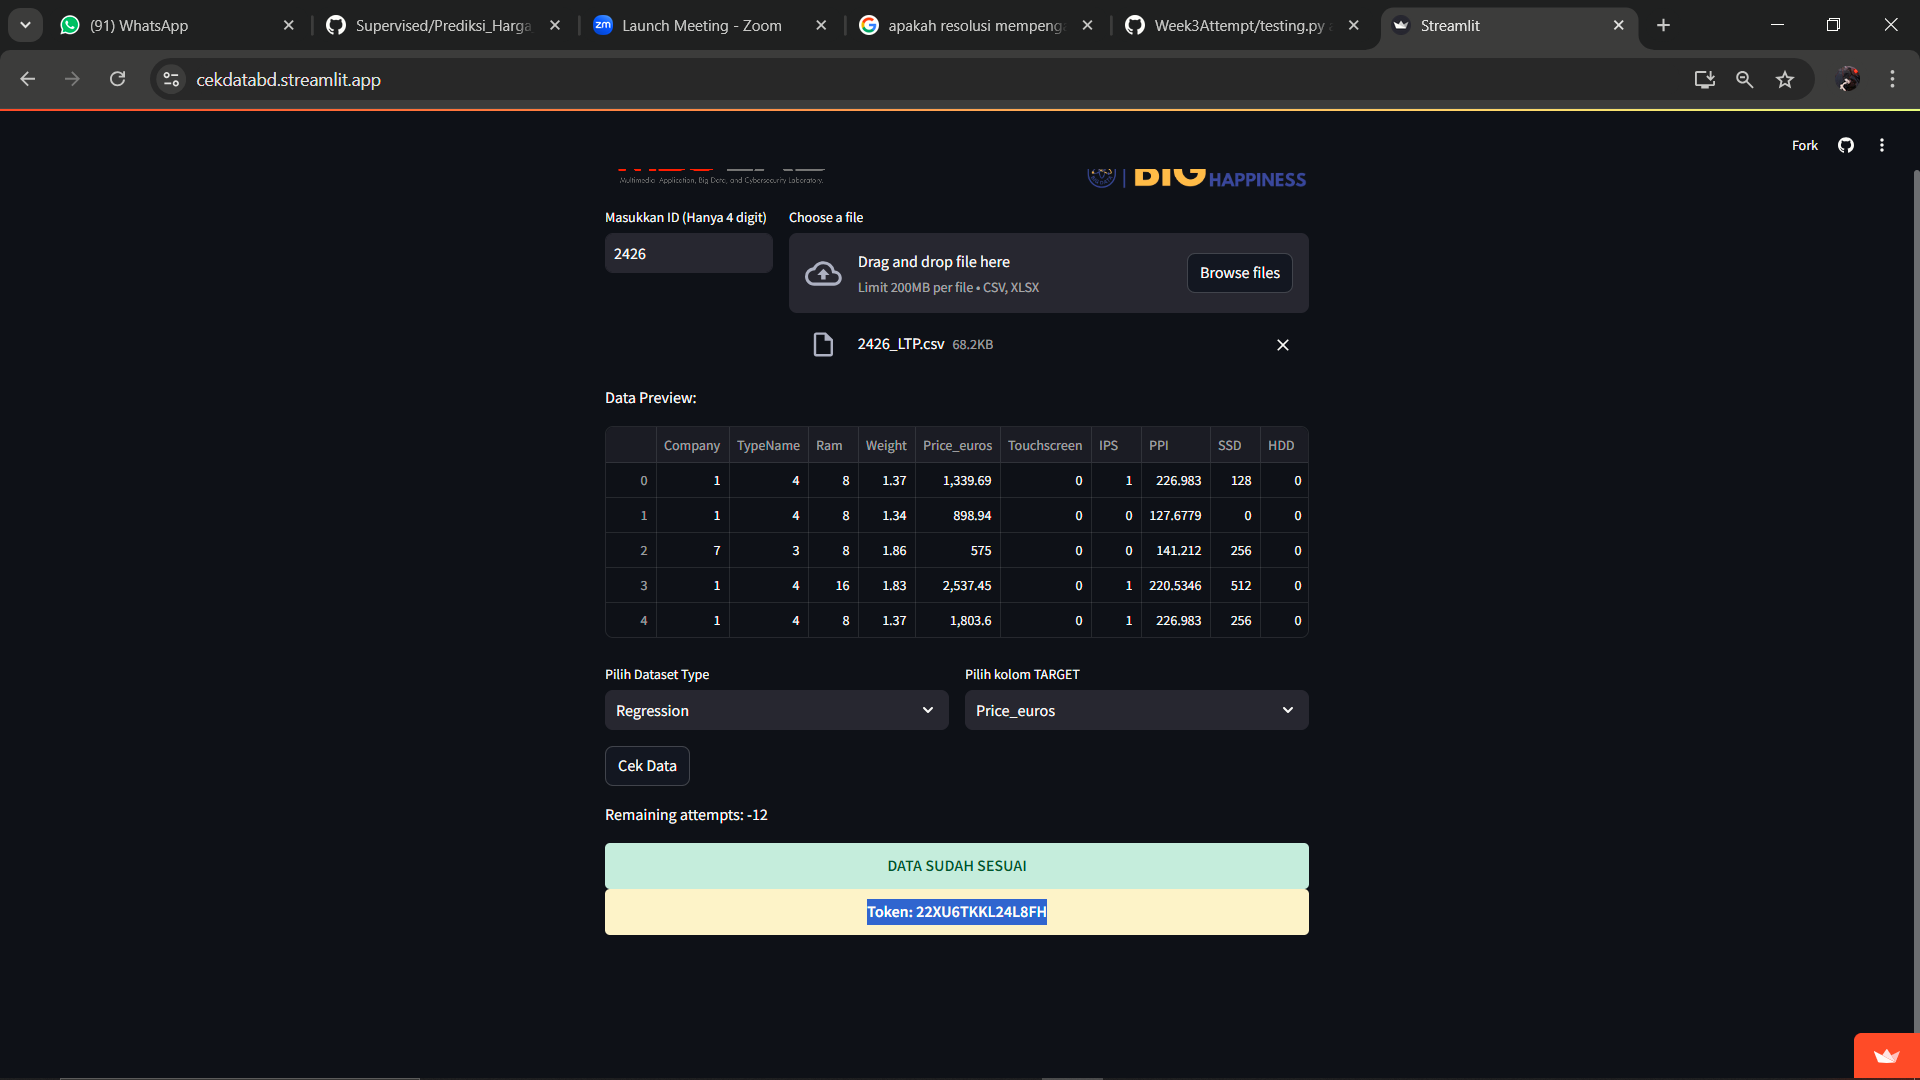

In [ ]:
Image(filename='/content/LTP_token.png')

# **MBP**

Dataset tentang jenis2 spek hp dan harganya

In [ ]:
# Panggil Dataset
df_MBP = pd.read_csv("/content/MBP.csv")

In [ ]:
df_MBP.head()

Phone Name  Rating ?/5 Number of Ratings       RAM  \
0   POCO C50 (Royal Blue, 32 GB)         4.2            33,561  2 GB RAM   
1  POCO M4 5G (Cool Blue, 64 GB)         4.2            77,128  4 GB RAM   
2   POCO C51 (Royal Blue, 64 GB)         4.3            15,175  4 GB RAM   
3    POCO C55 (Cool Blue, 64 GB)         4.2            22,621  4 GB RAM   
4  POCO C51 (Power Black, 64 GB)         4.3            15,175  4 GB RAM   

  ROM/Storage       Back/Rare Camera      Front Camera   Battery  \
0   32 GB ROM        8MP Dual Camera  5MP Front Camera  5000 mAh   
1   64 GB ROM             50MP + 2MP  8MP Front Camera  5000 mAh   
2   64 GB ROM   8MP Dual Rear Camera  5MP Front Camera  5000 mAh   
3   64 GB ROM  50MP Dual Rear Camera  5MP Front Camera  5000 mAh   
4   64 GB ROM   8MP Dual Rear Camera  5MP Front Camera  5000 mAh   

                                           Processor Price in INR  \
0  Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...       ₹5,649   
1                   Mediatek Dimensity 700 Processor      ₹11,999   
2                                Helio G36 Processor       ₹6,999   
3                       Mediatek Helio G85 Processor       ₹7,749   
4                                Helio G36 Processor       ₹6,999   

  Date of Scraping  
0       2023-06-17  
1       2023-06-17  
2       2023-06-17  
3       2023-06-17  
4       2023-06-17

# **---1---> Data Cleaning - MBP**

> **DROP FITUR TIDAK RELEVAN**

*   **Fitur Target :** Price in INR
*   **Model :** Regresi

In [ ]:
kolom = ['Date of Scraping', 'Number of Ratings']

df_MBP.drop(columns=kolom, inplace=True)

> **HANDLING MISSING VALUES**

In [ ]:
# Cek missing values
null = df_MBP.isnull().sum()
print(null[null > 0])

ROM/Storage         174
Back/Rare Camera      9
Front Camera        401
Battery              10
Processor            55
dtype: int64


> **HANDLE MISSING VALUES PADA FRONT CAMERA DAN ROM/STORAGE**

In [ ]:
# Cek missing values
df_MBP.isnull().sum()

Phone Name            0
Rating ?/5            0
RAM                   0
ROM/Storage         174
Back/Rare Camera      9
Front Camera        401
Battery              10
Processor            55
Price in INR          0
dtype: int64

Text(0.5, 1.0, 'Distribusi ROM/Storage')

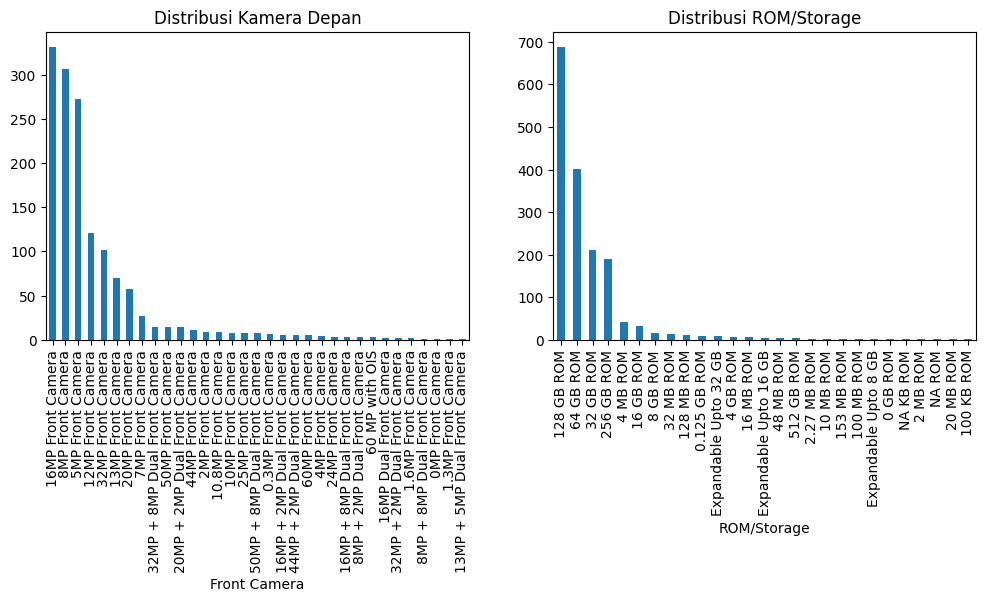

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

df_MBP['Front Camera'].value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('Distribusi Kamera Depan')

df_MBP['ROM/Storage'].value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title('Distribusi ROM/Storage')

In [ ]:
# Fillna Modus
df_MBP['Front Camera'] = df_MBP['Front Camera'].fillna(df_MBP['Front Camera'].mode()[0])
df_MBP['ROM/Storage'] = df_MBP['ROM/Storage'].fillna(df_MBP['ROM/Storage'].mode()[0])

In [ ]:
df_MBP['Processor'] = df_MBP['Processor'].fillna(df_MBP['Processor'].mode()[0])

In [ ]:
# Hapus missing value pada kolom sisanya
df_MBP = df_MBP.dropna(subset=['Back/Rare Camera', 'Battery'], axis=0)

In [ ]:
# Cek missing values
null = df_MBP.isnull().sum()
print(null[null > 0])

Series([], dtype: int64)


In [ ]:
# Cek Duplikasi
df_MBP.duplicated().sum()

69

In [ ]:
df_MBP = df_MBP.drop_duplicates()

# **---2---> Pre Processing - MBP**

> **Lakukan Perbaikan data pada beberapa kolom**

In [ ]:
rusak1 = df_MBP[~df_MBP['Battery'].str.contains('\d')]
rusak1['Battery'].value_counts()

Battery
Brand mAh       6
Unisoc mAh      3
Apple mAh       2
MediaTek mAh    2
Name: count, dtype: int64

In [ ]:
# Elminasi kolom yang tidak mengandung angka
df_MBP = df_MBP[df_MBP['Battery'].str.contains('\d')]
df_MBP = df_MBP[~df_MBP['Battery'].str.contains('A1')]
df_MBP = df_MBP[~df_MBP['Battery'].str.contains('A9')]

df_MBP['Battery'] = df_MBP['Battery'].str.replace('mAh', '').astype('int')
df_MBP = df_MBP.rename(columns={'Battery': 'Battery(mAh)'})

In [ ]:
# Koreksi value
df_MBP['Price in INR'] = df_MBP['Price in INR'].str.replace('₹', '').str.replace(',', '.')

In [ ]:
rusak = df_MBP[df_MBP['Price in INR'].str.match('\d+\.\d+\.\d+')]
rusak['Price in INR'].value_counts()

Price in INR
1.24.999    2
1.04.999    2
1.34.999    2
Name: count, dtype: int64

In [ ]:
# Eliminasi kolom dengan kesalahan penulisan
df_MBP = df_MBP[~df_MBP['Price in INR'].str.match('\d+\.\d+\.\d+')]

In [ ]:
# Float
df_MBP['Price in INR'] = df_MBP['Price in INR'].astype(float)



> **Outliers**



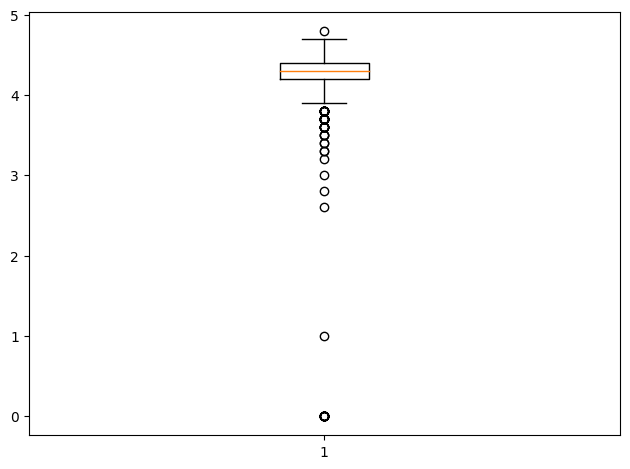

In [ ]:
# Cek Outliers
plt.boxplot(df_MBP['Rating ?/5'])

plt.tight_layout()
plt.show()

In [ ]:
df_MBP = cap_floor(df_MBP, 'Rating ?/5')

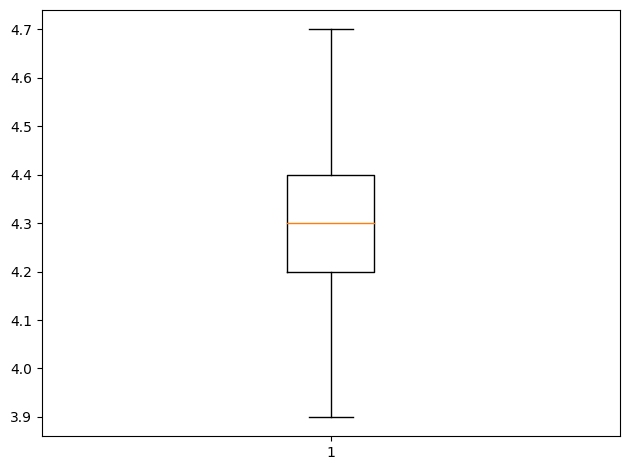

In [ ]:
# Cek Outliers
plt.boxplot(df_MBP['Rating ?/5'])

plt.tight_layout()
plt.show()

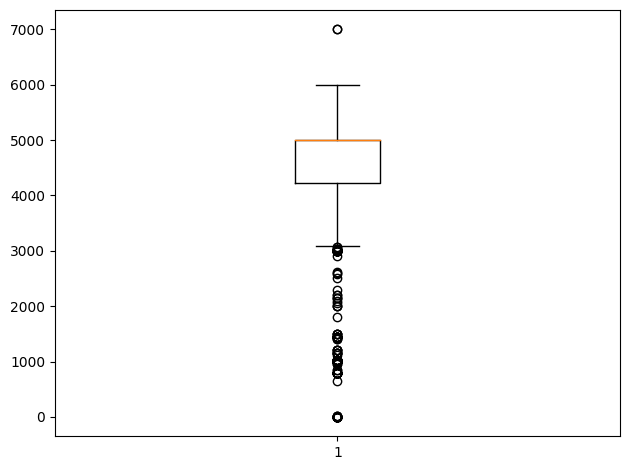

In [ ]:
# Cek Outliers
plt.boxplot(df_MBP['Battery(mAh)'])

plt.tight_layout()
plt.show()

In [ ]:
df_MBP = cap_floor(df_MBP, 'Battery(mAh)')

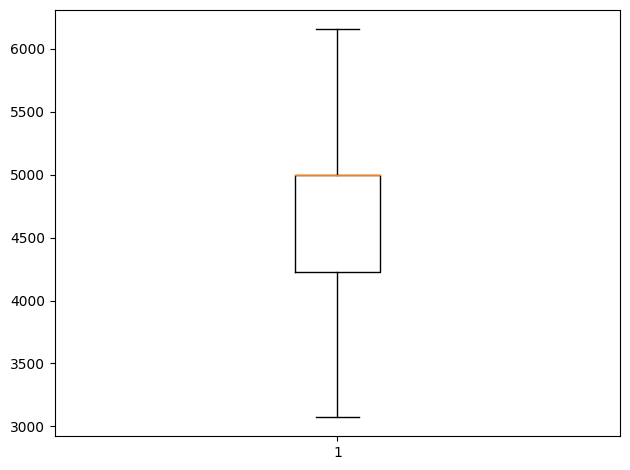

In [ ]:
# Cek Outliers
plt.boxplot(df_MBP['Battery(mAh)'])

plt.tight_layout()
plt.show()

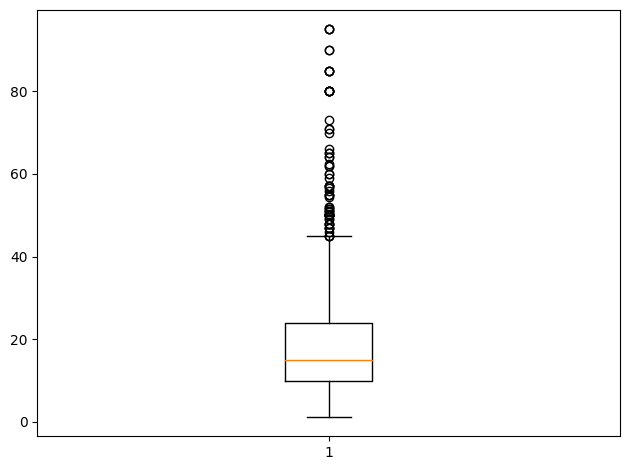

In [ ]:
# Cek Outliers
plt.boxplot(df_MBP['Price in INR'])

plt.tight_layout()
plt.show()

In [ ]:
df_MBP = cap_floor(df_MBP, 'Price in INR')

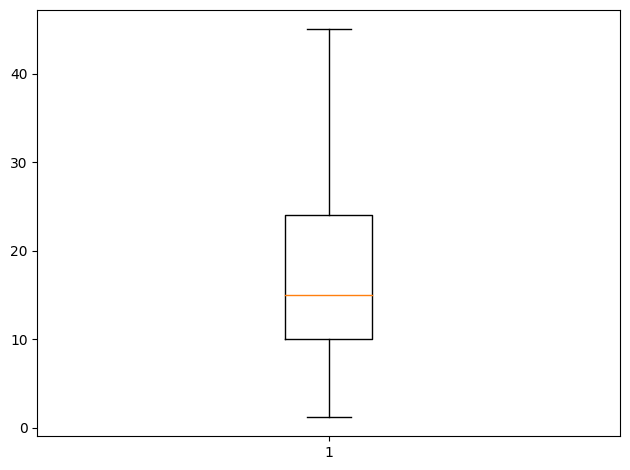

In [ ]:
# Cek Outliers
plt.boxplot(df_MBP['Price in INR'])

plt.tight_layout()
plt.show()

> **Buat Kolom Brand**



In [ ]:
df_MBP['Phone Name'].value_counts()

Phone Name
SAMSUNG Guru Music 2                          9
OnePlus 10R 5G (Sierra Black, 256 GB)         5
Nokia 8210 4G                                 4
OnePlus Nord CE 2 5G (Bahama Blue, 128 GB)    4
Nokia 110                                     4
                                             ..
OPPO F19 (Midnight Blue, 128 GB)              1
OPPO A76 (Glowing Black, 128 GB)              1
OPPO A11K (Deep Blue, 32 GB)                  1
OPPO A12 (Deep Blue, 32 GB)                   1
Infinix S5 (Quetzal Cyan, 64 GB)              1
Name: count, Length: 1354, dtype: int64

In [ ]:
df_MBP['Phone Name'] = df_MBP['Phone Name'].apply(lambda x:"".join(x.split()[0]))
df_MBP = df_MBP.rename(columns={'Phone Name': 'Phone Brand'})

In [ ]:
df_MBP = df_MBP[~df_MBP['Phone Brand'].str.match('Nothing')]
df_MBP = df_MBP[~df_MBP['Phone Brand'].str.match('a')]
df_MBP = df_MBP[~df_MBP['Phone Brand'].str.match('�9A')]
df_MBP = df_MBP[~df_MBP['Phone Brand'].str.match('10A')]
df_MBP = df_MBP[~df_MBP['Phone Brand'].str.match('A10E')]

In [ ]:
df_MBP['Phone Brand'].value_counts()

Phone Brand
SAMSUNG     228
realme      225
vivo        208
Nokia       119
POCO        117
Infinix     117
OnePlus     116
OPPO        114
Redmi        99
MOTOROLA     78
Mi           41
Xiaomi       27
Lenovo       24
Alcatel      22
Google       17
REDMI        11
Huawei       11
Moto          8
Realme        6
Motorola      5
Nexus         3
APPLE         1
Name: count, dtype: int64

> **Olah kolom RAM**

In [ ]:
df_MBP['RAM'].value_counts()

RAM
8 GB RAM                 420
4 GB RAM                 374
6 GB RAM                 310
3 GB RAM                 165
2 GB RAM                 105
12 GB RAM                 80
4 MB RAM                  43
1 GB RAM                  18
NA ROM                    13
32 MB RAM                  8
16 GB RAM                  6
8 MB RAM                   6
0.046875 GB RAM            6
512 MB RAM                 5
128 MB RAM                 5
16 MB RAM                  4
0 MB ROM                   3
64 MB RAM                  3
153 MB RAM                 2
16 MB ROM                  2
48 MB RAM                  2
Expandable Upto 16 GB      2
256 MB RAM                 2
NA MB ROM                  1
1 MB ROM                   1
80 MB ROM                  1
2 MB ROM                   1
Expandable Upto 2 GB       1
60 MB ROM                  1
768 MB RAM                 1
1.5 GB RAM                 1
8 GB ROM                   1
8 MB ROM                   1
32 MB ROM                  1
0.53 RAM                   1
50 MB ROM                  1
Name: count, dtype: int64

In [ ]:
# Hapus Data yang mengandung kesalahan
df_MBP = df_MBP[~df_MBP['RAM'].str.contains('ROM')]
df_MBP = df_MBP[~df_MBP['RAM'].str.contains('NA')]
df_MBP = df_MBP[~df_MBP['RAM'].str.contains('MB')]
df_MBP = df_MBP[~df_MBP['RAM'].str.contains('0.046875 GB RAM')]
df_MBP = df_MBP[~df_MBP['RAM'].str.contains('0.53 RAM')]
df_MBP = df_MBP[~df_MBP['RAM'].str.contains('1.5 GB RAM')]


# Koreksi data
df_MBP['RAM'] = df_MBP['RAM'].replace('Expandable Upto 16 GB', '16 GB RAM')
df_MBP['RAM'] = df_MBP['RAM'].replace('Expandable Upto 2 GB', '2 GB RAM')

In [ ]:
df_MBP['RAM'] = df_MBP['RAM'].str.replace(' GB RAM', '')
df_MBP = df_MBP.rename(columns={'RAM': 'RAM (GB)'})
df_MBP['RAM (GB)'] = df_MBP['RAM (GB)'].astype(int)

In [ ]:
df_MBP['RAM (GB)'].value_counts()

RAM (GB)
8     420
4     374
6     310
3     165
2     106
12     80
1      18
16      8
Name: count, dtype: int64

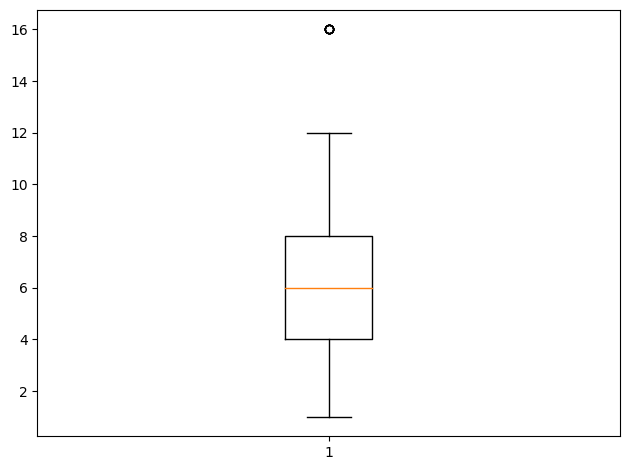

In [ ]:
# Cek Outliers
plt.boxplot(df_MBP['RAM (GB)'])

plt.tight_layout()
plt.show()

In [ ]:
df_MBP = hapus_outlier(df_MBP, 'RAM (GB)')

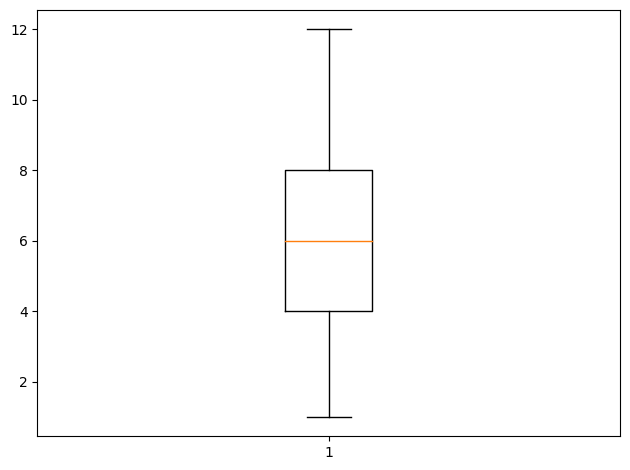

In [ ]:
# Cek Outliers
plt.boxplot(df_MBP['RAM (GB)'])

plt.tight_layout()
plt.show()

> **Olah kolom ROM/Storage**

In [ ]:
df_MBP['ROM/Storage'].value_counts()

ROM/Storage
128 GB ROM    671
64 GB ROM     388
32 GB ROM     199
256 GB ROM    168
16 GB ROM      31
8 GB ROM       15
4 GB ROM        1
Name: count, dtype: int64

In [ ]:
# Hapus Data yang mengandung kesalahan
df_MBP = df_MBP[~df_MBP['ROM/Storage'].str.contains('0 GB ROM')]
df_MBP = df_MBP[~df_MBP['ROM/Storage'].str.contains('NA')]

In [ ]:
df_MBP['ROM/Storage'] = df_MBP['ROM/Storage'].str.replace(' GB ROM', '')
df_MBP = df_MBP.rename(columns={'ROM/Storage': 'ROM (GB)'})
df_MBP['ROM (GB)'] = df_MBP['ROM (GB)'].astype(int)

In [ ]:
df_MBP['ROM (GB)'].value_counts()

ROM (GB)
128    671
64     388
32     199
256    168
16      31
8       15
4        1
Name: count, dtype: int64

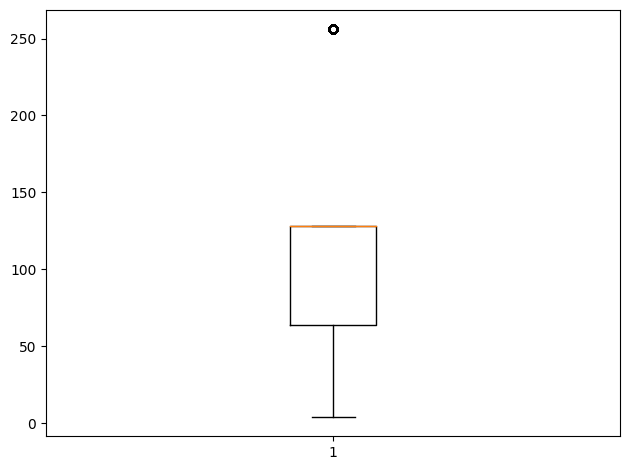

In [ ]:
# Cek Outliers
plt.boxplot(df_MBP['ROM (GB)'])

plt.tight_layout()
plt.show()

In [ ]:
df_MBP = hapus_outlier(df_MBP, 'ROM (GB)')

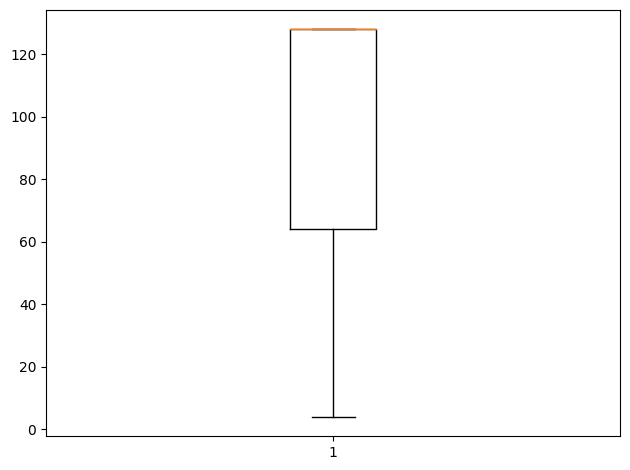

In [ ]:
# Cek Outliers
plt.boxplot(df_MBP['ROM (GB)'])

plt.tight_layout()
plt.show()

> **Olah Kamera**

In [ ]:
import re

def jumlah_megapixel(string_kamera):
    # Cari semua angka yang diikuti oleh 'MP'
    megapixel_values = re.findall(r'(\d+)MP', string_kamera)
    # Konversi ke integer dan jumlahkan
    total_megapixel = sum(map(int, megapixel_values))
    return total_megapixel

def sumAll_megapixel(df, column1, column2):
    df['total_megapixel'] = df[column1].apply(jumlah_megapixel) + df[column2].apply(jumlah_megapixel)
    return df

In [ ]:
df_MBP = sumAll_megapixel(df_MBP, 'Back/Rare Camera', 'Front Camera')
df_MBP.drop(columns=['Back/Rare Camera', 'Front Camera'], inplace=True)

In [ ]:
df_MBP.sample(5)

Phone Brand  Rating ?/5  RAM (GB)  ROM (GB)  Battery(mAh)  \
735      SAMSUNG         4.3         6       128          6000   
122       realme         4.4         8       128          5000   
1472    MOTOROLA         4.3         8       128          4400   
524      SAMSUNG         4.3         6       128          5000   
975         vivo         4.3         8       128          5000   

                                Processor  Price in INR  total_megapixel  
735                                1 Year        19.000               80  
122                   Helio G88 Processor        13.999               74  
1472  Qualcomm Snapdragon 888 + Processor        39.999               97  
524    Qualcomm Snapdragon 750G Processor        16.999               68  
975     Qualcomm Snapdragon 695 Processor        19.990               70

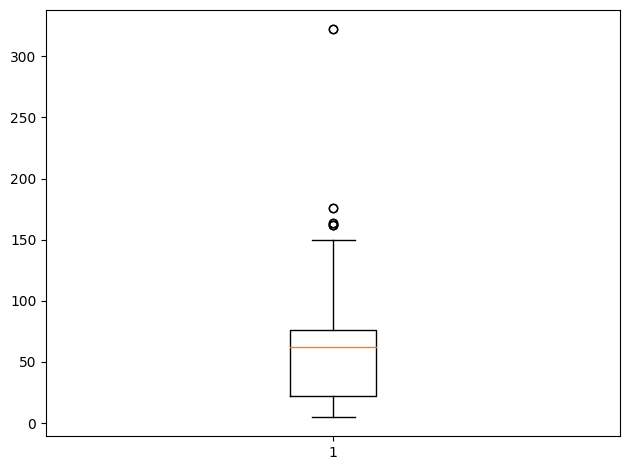

In [ ]:
# Cek Outliers
plt.boxplot(df_MBP['total_megapixel'])

plt.tight_layout()
plt.show()

In [ ]:
df_MBP = replace_outlier_median(df_MBP, 'total_megapixel')

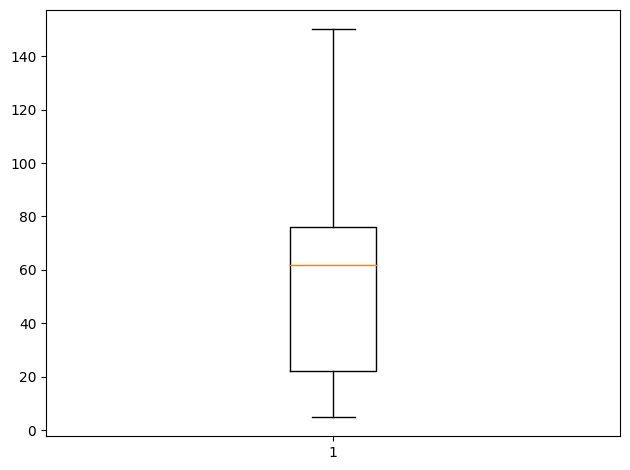

In [ ]:
# Cek Outliers
plt.boxplot(df_MBP['total_megapixel'])

plt.tight_layout()
plt.show()

> **Olah Processor**

In [ ]:
df_MBP['Processor'].value_counts()

Processor
Qualcomm Snapdragon 680 Processor                                                         45
Mediatek Helio P35 Processor                                                              32
1 Year Warranty                                                                           29
Unisoc T612 Processor                                                                     28
12 Months Warranty                                                                        26
                                                                                          ..
SDM710 Processor                                                                           1
Mediatek MT6750T Octa Core 1.5 GHz Processor                                               1
MediaTek Dimensity 1000+ (MT6889) Processor                                                1
Brand Warranty of 1 Year Available for Mobile and Battery and 6 Months for Accessories     1
Helio P22 (MTK6762) Processor                                                              1
Name: count, Length: 281, dtype: int64

In [ ]:
df_MBP['Processor'] = df_MBP['Processor'].apply(lambda x:"".join(x.split()[0]))

In [ ]:
df_MBP['Processor'].value_counts()

Processor
Qualcomm             372
Mediatek             232
MediaTek             202
1                    102
Unisoc                83
12                    69
Exynos                42
Dimensity             25
Helio                 18
Octa                  12
Snapdragon            12
Google                11
MTK                   10
SEC                    9
G37                    8
Domestic               8
Spreadtrum             7
Qualcomm®              7
2.0                    7
Brand                  6
Octa-core(EXYNOS)      4
Meditek                4
Octa-core              4
Mediateck              4
With                   3
2nd-gen                3
SC9863A                3
18                     3
HUAWEI                 3
UniSoc                 3
domestic               3
12Months               3
Tensor                 3
MTK6737                2
UNISOC                 2
HiSilicon              2
MTK8735                2
MSM8228                1
SDM710                 1
MT6753                 1
MSM8952                1
MT6589                 1
Cortex-A7              1
MT6762                 1
Kirin                  1
Turbo                  1
MT6737M                1
0                      1
Samsung                1
Name: count, dtype: int64

In [ ]:
df_MBP = df_MBP[~df_MBP['Processor'].str.contains('0')]

In [ ]:
# Ubah semua 'Mediatek' menjadi 'MediaTek'
df_MBP['Processor'] = df_MBP['Processor'].str.replace('MediaTek', 'Mediatek', case=False)
df_MBP['Processor'] = df_MBP['Processor'].str.replace('Mediateck', 'Mediatek', case=False)
df_MBP['Processor'] = df_MBP['Processor'].str.replace('Meditek', 'Mediatek', case=False)

# Hitung jumlah kemunculan setiap jenis processor setelah perubahan
print(df_MBP['Processor'].value_counts())

Processor
Mediatek             442
Qualcomm             372
1                    102
Unisoc                83
12                    69
Exynos                42
Dimensity             25
Helio                 18
Octa                  12
Snapdragon            12
Google                11
MTK                   10
SEC                    9
G37                    8
Domestic               8
Qualcomm®              7
Spreadtrum             7
Brand                  6
Octa-core(EXYNOS)      4
Octa-core              4
UniSoc                 3
18                     3
HUAWEI                 3
With                   3
2nd-gen                3
domestic               3
SC9863A                3
Tensor                 3
12Months               3
MTK6737                2
MTK8735                2
UNISOC                 2
HiSilicon              2
MT6753                 1
MSM8952                1
Samsung                1
Cortex-A7              1
MT6589                 1
Kirin                  1
MSM8228        

<ipython-input-143-8adaeca63ea8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MBP['Processor'] = df_MBP['Processor'].str.replace('MediaTek', 'Mediatek', case=False)
<ipython-input-143-8adaeca63ea8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MBP['Processor'] = df_MBP['Processor'].str.replace('Mediateck', 'Mediatek', case=False)
<ipython-input-143-8adaeca63ea8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

> **Cek Outlier**

> **ENCODING**

In [ ]:
# One Hot Encoding
kolom = ['Phone Brand', 'Processor']

onehot = pd.get_dummies(df_MBP[kolom]).astype(int)

df_MBP = pd.concat([df_MBP, onehot], axis=1)

df_MBP = df_MBP.drop(columns = kolom, axis=1)

In [ ]:
df_MBP

Rating ?/5  RAM (GB)  ROM (GB)  Battery(mAh)  Price in INR  \
0            4.2         2        32          5000         5.649   
1            4.2         4        64          5000        11.999   
2            4.3         4        64          5000         6.999   
3            4.2         4        64          5000         7.749   
4            4.3         4        64          5000         6.999   
...          ...       ...       ...           ...           ...   
1831         4.3         4        64          5000        14.999   
1832         4.3         4        64          5000        14.999   
1833         4.3         4        64          5000        14.999   
1834         4.2         8       128          4500        18.999   
1835         4.3         4        64          4000        10.999   

      total_megapixel  Phone Brand_Alcatel  Phone Brand_Google  \
0                13.0                    0                   0   
1                60.0                    0                   0   
2                13.0                    0                   0   
3                55.0                    0                   0   
4                13.0                    0                   0   
...               ...                  ...                 ...   
1831             68.0                    0                   0   
1832             68.0                    0                   0   
1833             68.0                    0                   0   
1834             82.0                    0                   0   
1835             55.0                    0                   0   

      Phone Brand_Huawei  Phone Brand_Infinix  ...  Processor_Samsung  \
0                      0                    0  ...                  0   
1                      0                    0  ...                  0   
2                      0                    0  ...                  0   
3                      0                    0  ...                  0   
4                      0                    0  ...                  0   
...                  ...                  ...  ...                ...   
1831                   0                    1  ...                  0   
1832                   0                    1  ...                  0   
1833                   0                    1  ...                  0   
1834                   0                    1  ...                  0   
1835                   0                    1  ...                  0   

      Processor_Snapdragon  Processor_Spreadtrum  Processor_Tensor  \
0                        0                     0                 0   
1                        0                     0                 0   
2                        0                     0                 0   
3                        0                     0                 0   
4                        0                     0                 0   
...                    ...                   ...               ...   
1831                     0                     0                 0   
1832                     0                     0                 0   
1833                     0                     0                 0   
1834                     0                     0                 0   
1835                     0                     0                 0   

      Processor_Turbo  Processor_UNISOC  Processor_UniSoc  Processor_Unisoc  \
0                   0                 0                 0                 0   
1                   0                 0                 0                 0   
2                   0                 0                 0                 0   
3                   0                 0                 0                 0   
4                   0                 0                 0                 0   
...               ...               ...               ...               ...   
1831                0                 0                 0                 0   
1832                0                 0       



> **Scaling**



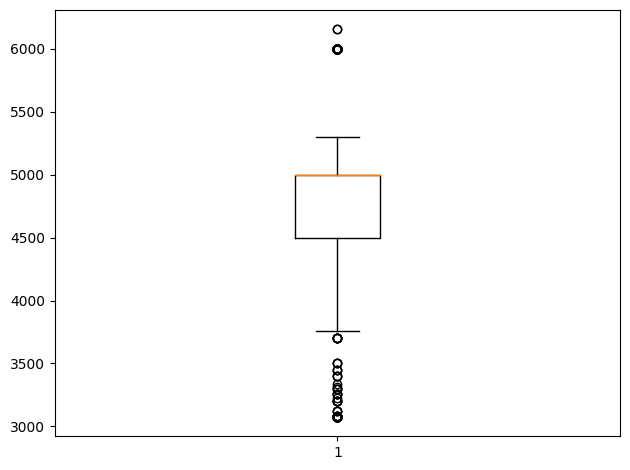

In [ ]:
# Cek Outliers
plt.boxplot(df_MBP['Battery(mAh)'])

plt.tight_layout()
plt.show()

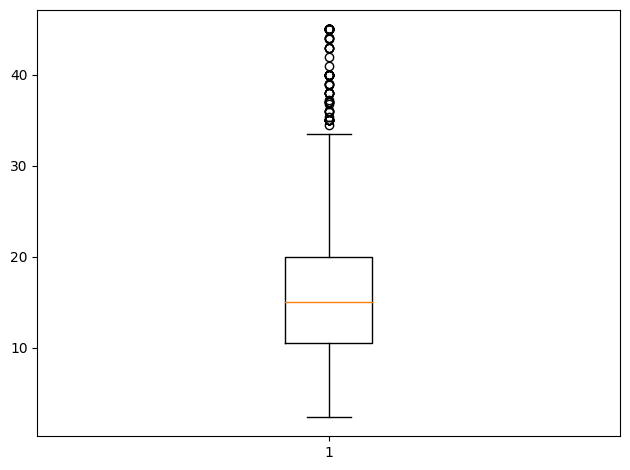

In [ ]:
# Cek Outliers
plt.boxplot(df_MBP['Price in INR'])

plt.tight_layout()
plt.show()

In [ ]:
df_MBP = cap_floor(df_MBP, 'Battery(mAh)')

df_MBP = cap_floor(df_MBP, 'Price in INR')

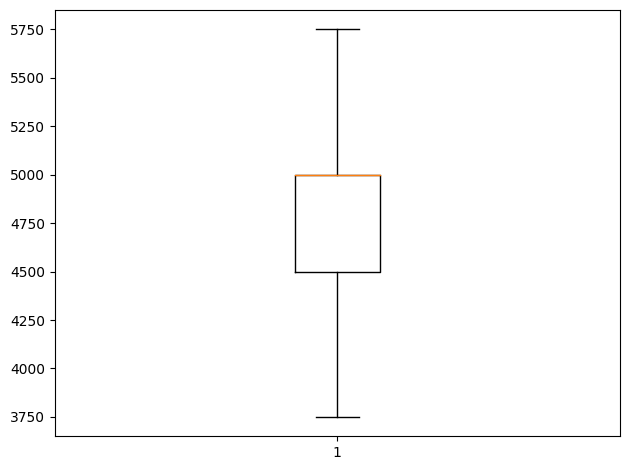

In [ ]:
# Cek Outliers
plt.boxplot(df_MBP['Battery(mAh)'])

plt.tight_layout()
plt.show()

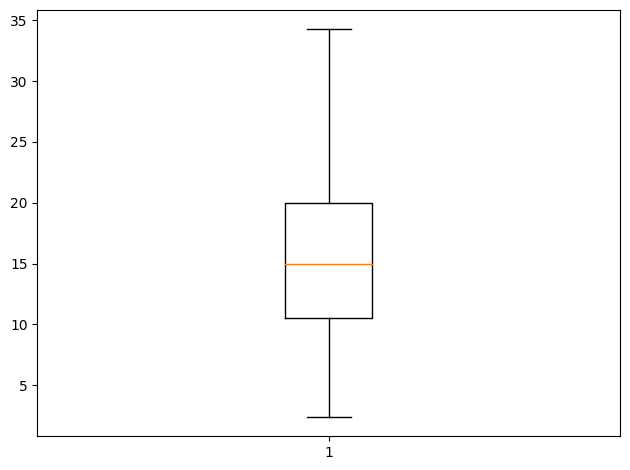

In [ ]:
# Cek Outliers
plt.boxplot(df_MBP['Price in INR'])

plt.tight_layout()
plt.show()

In [ ]:
df_MBP = df_MBP.drop_duplicates()

# **---3---> Hasil - MBP**

In [ ]:
# Bener Ga
check_regression(df_MBP, 'Price in INR', '2426_MBP')

'Data berhasil disimpan'

**Token:** LA5GM4GSQYHW226

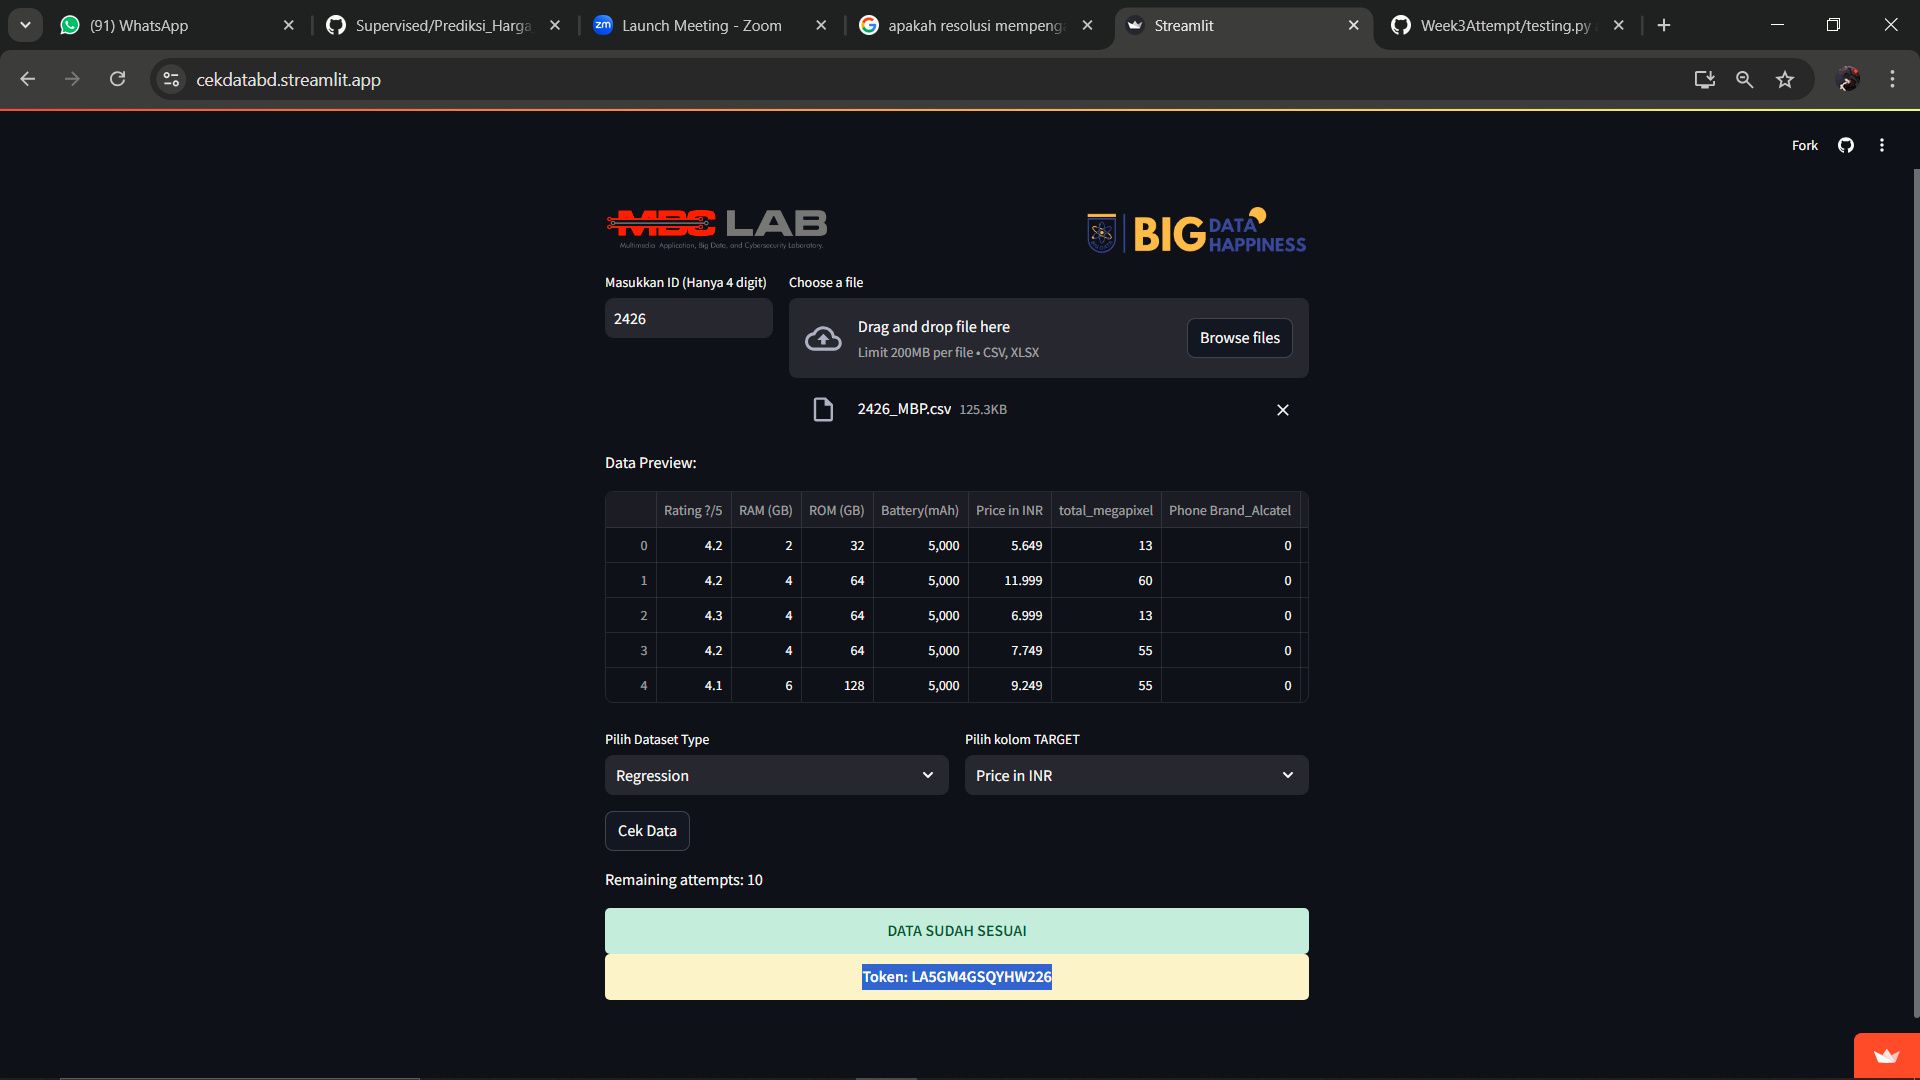

In [ ]:
Image(filename='/content/MBP_token.png')

# **HSP**

Dataset tentang spesifikasi jenis2 rumah yang sedang dijual beserta harganya

In [ ]:
# Panggil Dataset
df_HSP = pd.read_csv("/content/HSP.csv")

In [ ]:
df_HSP.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

# **---1---> Data Cleaning - HSP**

> **DROP FITUR TIDAK RELEVAN**

*   **Fitur Target :** SalePrice
*   **Model :** Regresi

In [ ]:
kolom = ['Id', 'MoSold', 'YrSold', 'MiscFeature', 'Condition1', 'Condition2']

# Drop Kolom yang tidak Relevan
df_HSP = df_HSP.drop(columns = kolom, axis=1)

> **HANDLING MISSING VALUES**

In [ ]:
# Cek missing values
null = df_HSP.isnull().sum()

print(null[null > 0])

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
dtype: int64


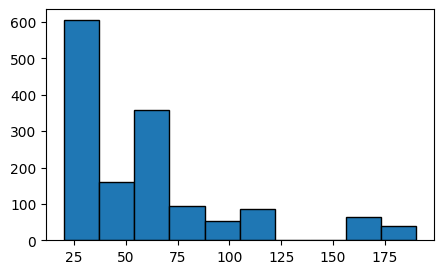

In [ ]:
plt.figure(figsize=(5, 3))
plt.hist(df_HSP['MSSubClass'], edgecolor='black')
plt.show()

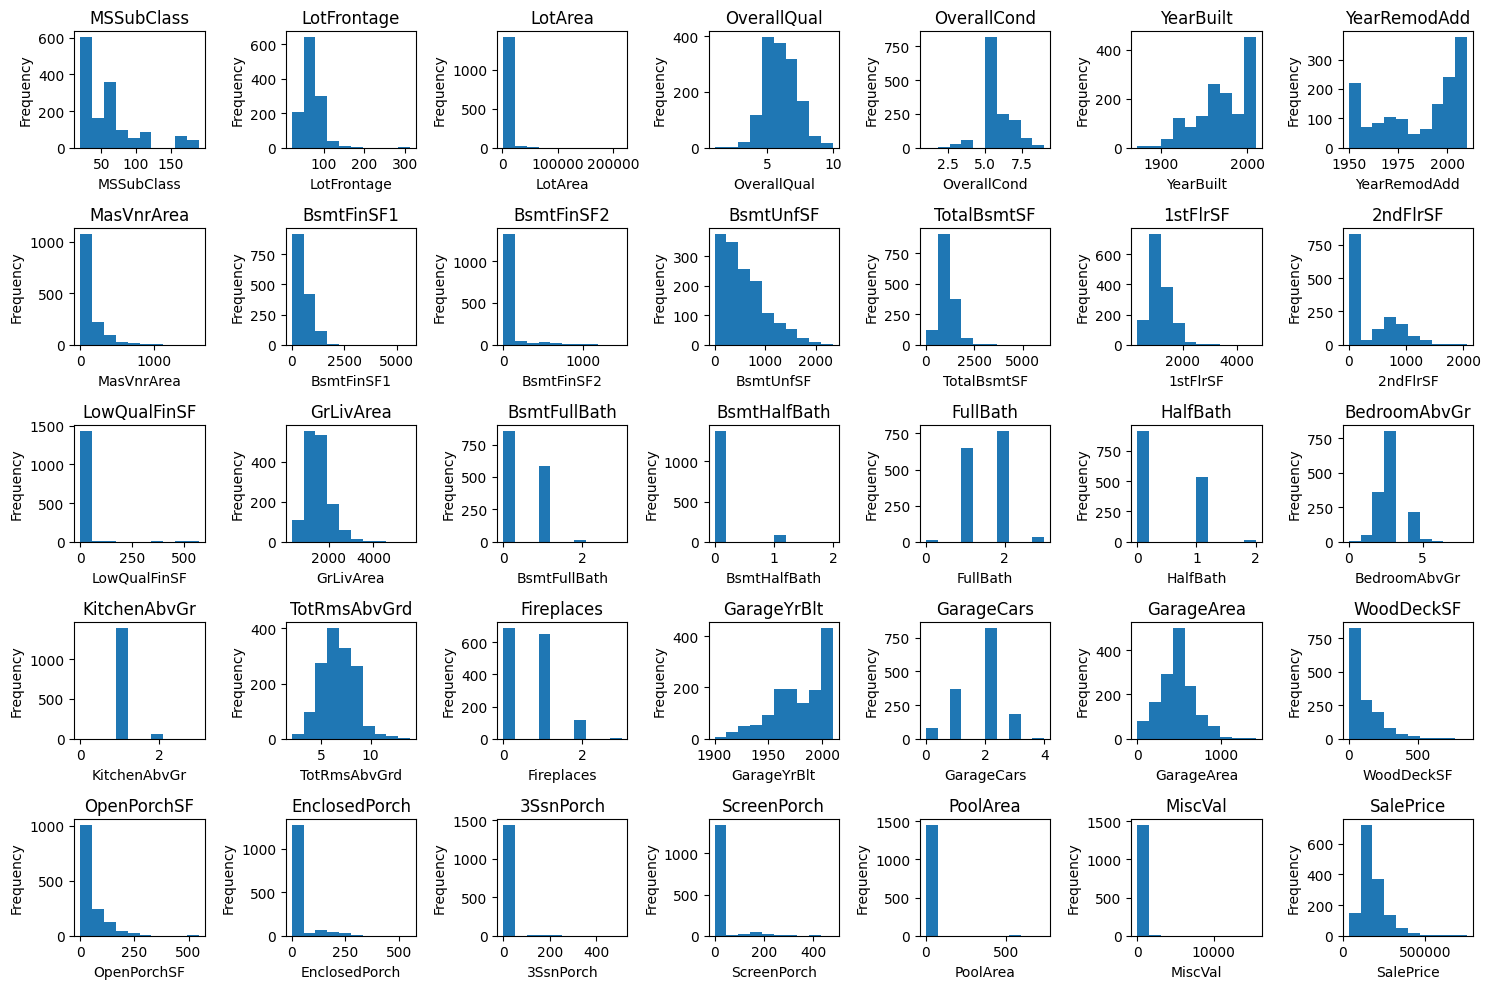

In [ ]:
# Histogram
create_hist(df_HSP)

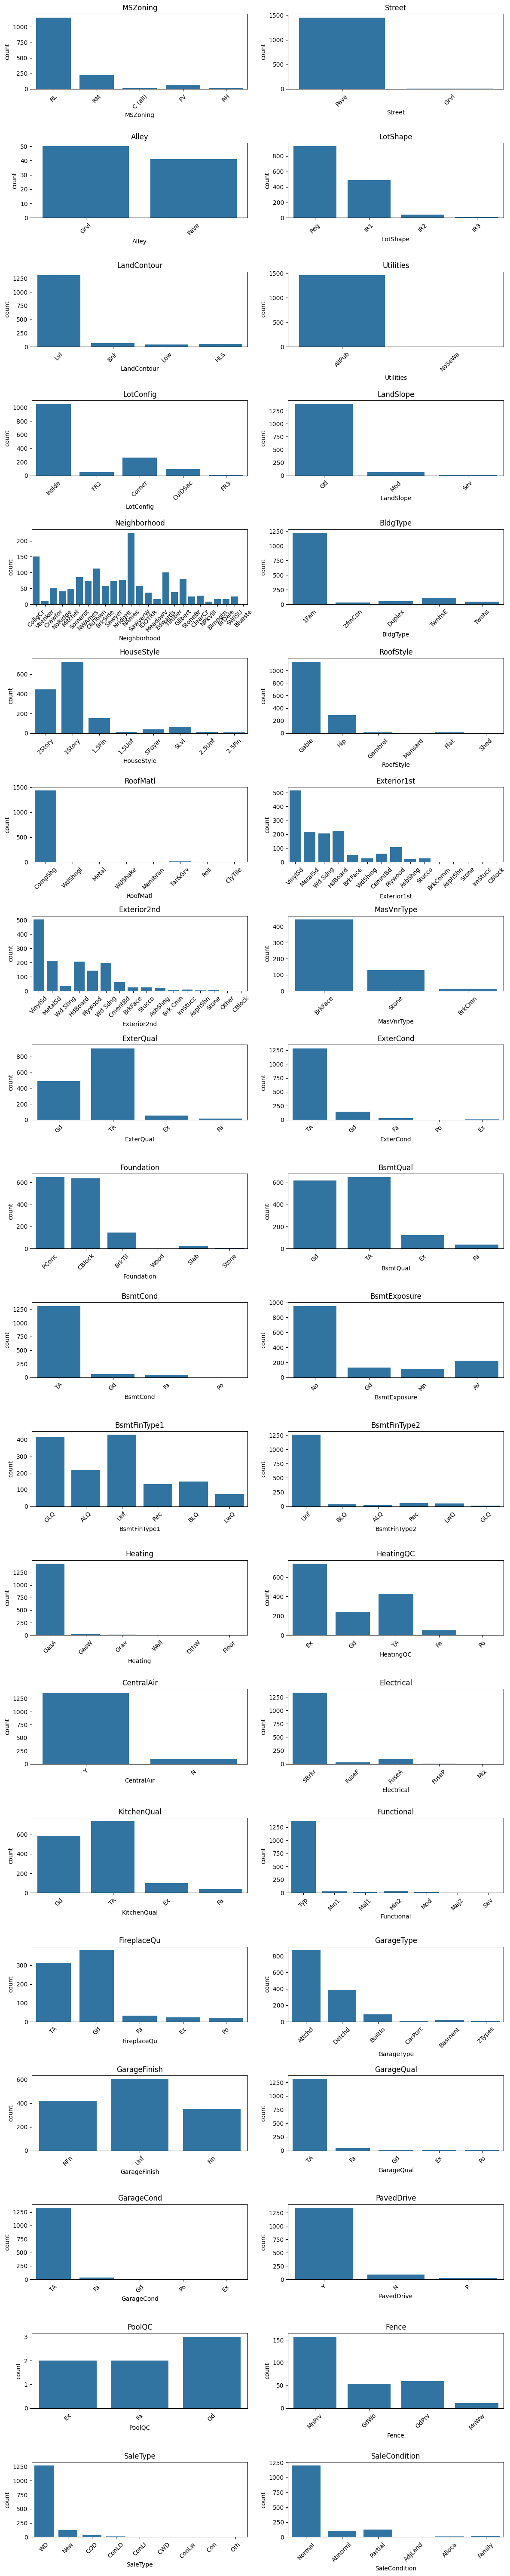

In [ ]:
create_bar_count_plots(df_HSP)

In [ ]:
def fill_na_with_median(df):
  for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
      df[col] = df[col].fillna(df[col].median())
  return df

def fill_na_with_mode(df):
  for col in df.columns:
    if df[col].dtype == 'object':
      df[col] = df[col].fillna(df[col].mode().iloc[0])
  return df

In [ ]:
df_HSP = fill_na_with_median(df_HSP)

In [ ]:
df_HSP = fill_na_with_mode(df_HSP)

In [ ]:
# Cek missing values
null = df_HSP.isnull().sum()

print(null[null > 0])

Series([], dtype: int64)


> **ATASI OUTLIER**

In [ ]:
#  Cek Tipe Data
df_HSP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  OverallCond    1460 non-null   int64  
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl

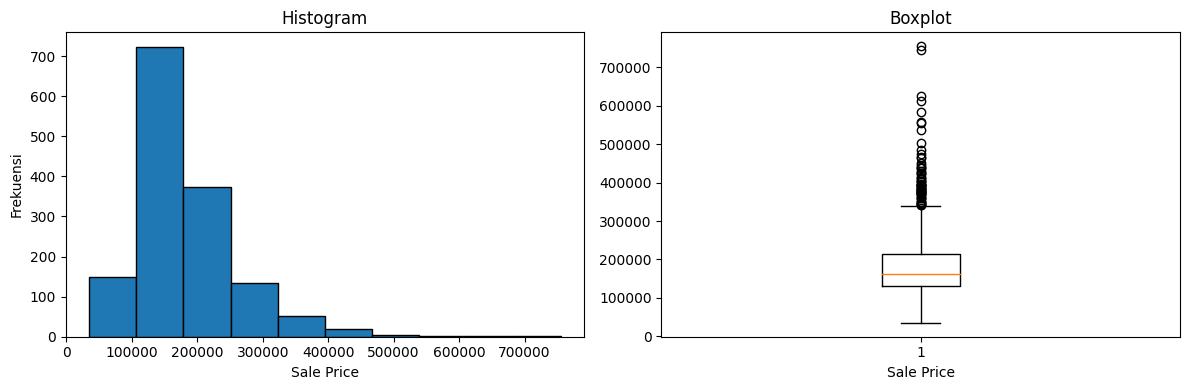

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(df_HSP['SalePrice'], edgecolor='black')
plt.xlabel('Sale Price')
plt.ylabel('Frekuensi')
plt.title('Histogram')

plt.subplot(1, 2, 2)
plt.boxplot(df_HSP['SalePrice'])
plt.xlabel('Sale Price')
plt.ylabel('')
plt.title('Boxplot')

plt.tight_layout()
plt.show()

In [ ]:
df_HSP = replace_outlier_median(df_HSP, 'SalePrice')

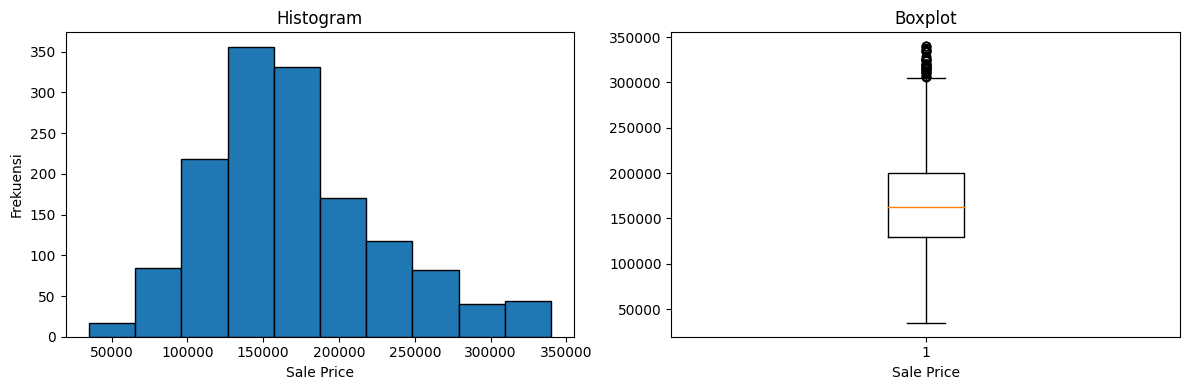

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(df_HSP['SalePrice'], edgecolor='black')
plt.xlabel('Sale Price')
plt.ylabel('Frekuensi')
plt.title('Histogram')

plt.subplot(1, 2, 2)
plt.boxplot(df_HSP['SalePrice'])
plt.xlabel('Sale Price')
plt.ylabel('')
plt.title('Boxplot')

plt.tight_layout()
plt.show()

In [ ]:
df_HSP = cap_floor(df_HSP, 'SalePrice')

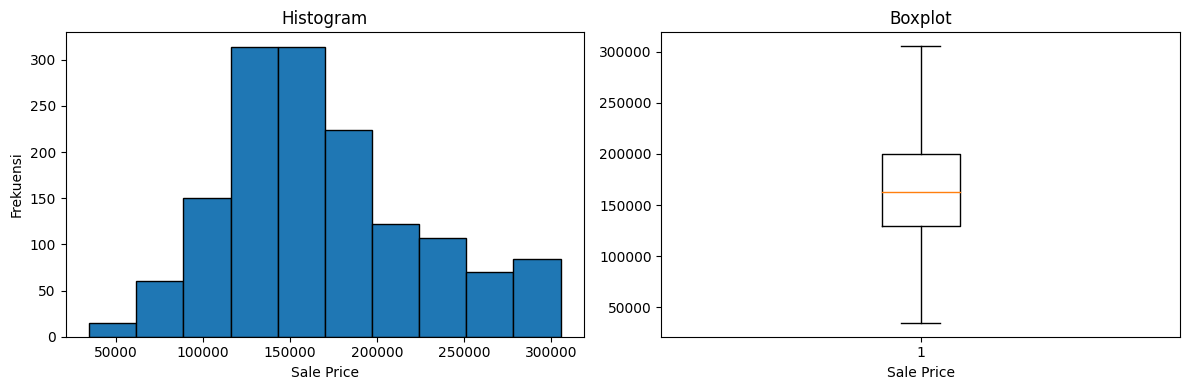

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(df_HSP['SalePrice'], edgecolor='black')
plt.xlabel('Sale Price')
plt.ylabel('Frekuensi')
plt.title('Histogram')

plt.subplot(1, 2, 2)
plt.boxplot(df_HSP['SalePrice'])
plt.xlabel('Sale Price')
plt.ylabel('')
plt.title('Boxplot')

plt.tight_layout()
plt.show()

In [ ]:
df_HSP['SalePrice'] = df_HSP['SalePrice'].astype(int)

# **---2---> Pre Processing - HSP**

In [ ]:
def label_encoding_all(df):
    from sklearn.preprocessing import LabelEncoder
    label_encoder = LabelEncoder()

    for col in df.select_dtypes(include=['object']).columns:
       df[col] = label_encoder.fit_transform(df[col])

    return df

In [ ]:
label_encoding_all(df_HSP)

MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0             60         3         65.0     8450       1      0         3   
1             20         3         80.0     9600       1      0         3   
2             60         3         68.0    11250       1      0         0   
3             70         3         60.0     9550       1      0         0   
4             60         3         84.0    14260       1      0         0   
...          ...       ...          ...      ...     ...    ...       ...   
1455          60         3         62.0     7917       1      0         3   
1456          20         3         85.0    13175       1      0         3   
1457          70         3         66.0     9042       1      0         3   
1458          20         3         68.0     9717       1      0         3   
1459          20         3         75.0     9937       1      0         3   

      LandContour  Utilities  LotConfig  ...  EnclosedPorch  3SsnPorch  \
0               3          0          4  ...              0          0   
1               3          0          2  ...              0          0   
2               3          0          4  ...              0          0   
3               3          0          0  ...            272          0   
4               3          0          2  ...              0          0   
...           ...        ...        ...  ...            ...        ...   
1455            3          0          4  ...              0          0   
1456            3          0          4  ...              0          0   
1457            3          0          4  ...              0          0   
1458            3          0          4  ...            112          0   
1459            3          0          4  ...              0          0   

      ScreenPorch  PoolArea  PoolQC  Fence  MiscVal  SaleType  SaleCondition  \
0               0         0       2      2        0         8              4   
1               0         0       2      2        0         8              4   
2               0         0       2      2        0         8              4   
3               0         0       2      2        0         8              0   
4               0         0       2      2        0         8              4   
...           ...       ...     ...    ...      ...       ...            ...   
1455            0         0       2      2        0         8              4   
1456            0         0       2      2        0         8              4   
1457            0         0       2      0     2500         8              4   
1458            0         0       2      2        0         8              4   
1459            0         0       2      2        0         8              4   

      SalePrice  
0        208500  
1        181500  
2        223500  
3        140000  
4        250000  
...         ...  
1455     175000  
1456     210000  
1457     266500  
1458     142125  
1459     147500  

[1460 rows x 75 columns]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Min-Max Scaling
scaler = MinMaxScaler()
df_HSP[['SalePrice', 'LotArea']] = scaler.fit_transform(df_HSP[['SalePrice', 'LotArea']])

In [ ]:
LinearRegression(df_HSP, 'SalePrice')

Model Score:  0.6927235598058571
Mean Squared Error:  0.015263001633522847
R-squared:  0.6800305960708122


# **---3---> Hasil - HSP**

In [ ]:
# Bener Ga
check_regression(df_HSP, 'SalePrice', '2426_HSP')

'Data berhasil disimpan'

**Token :** FZDFX62T34OU2I3

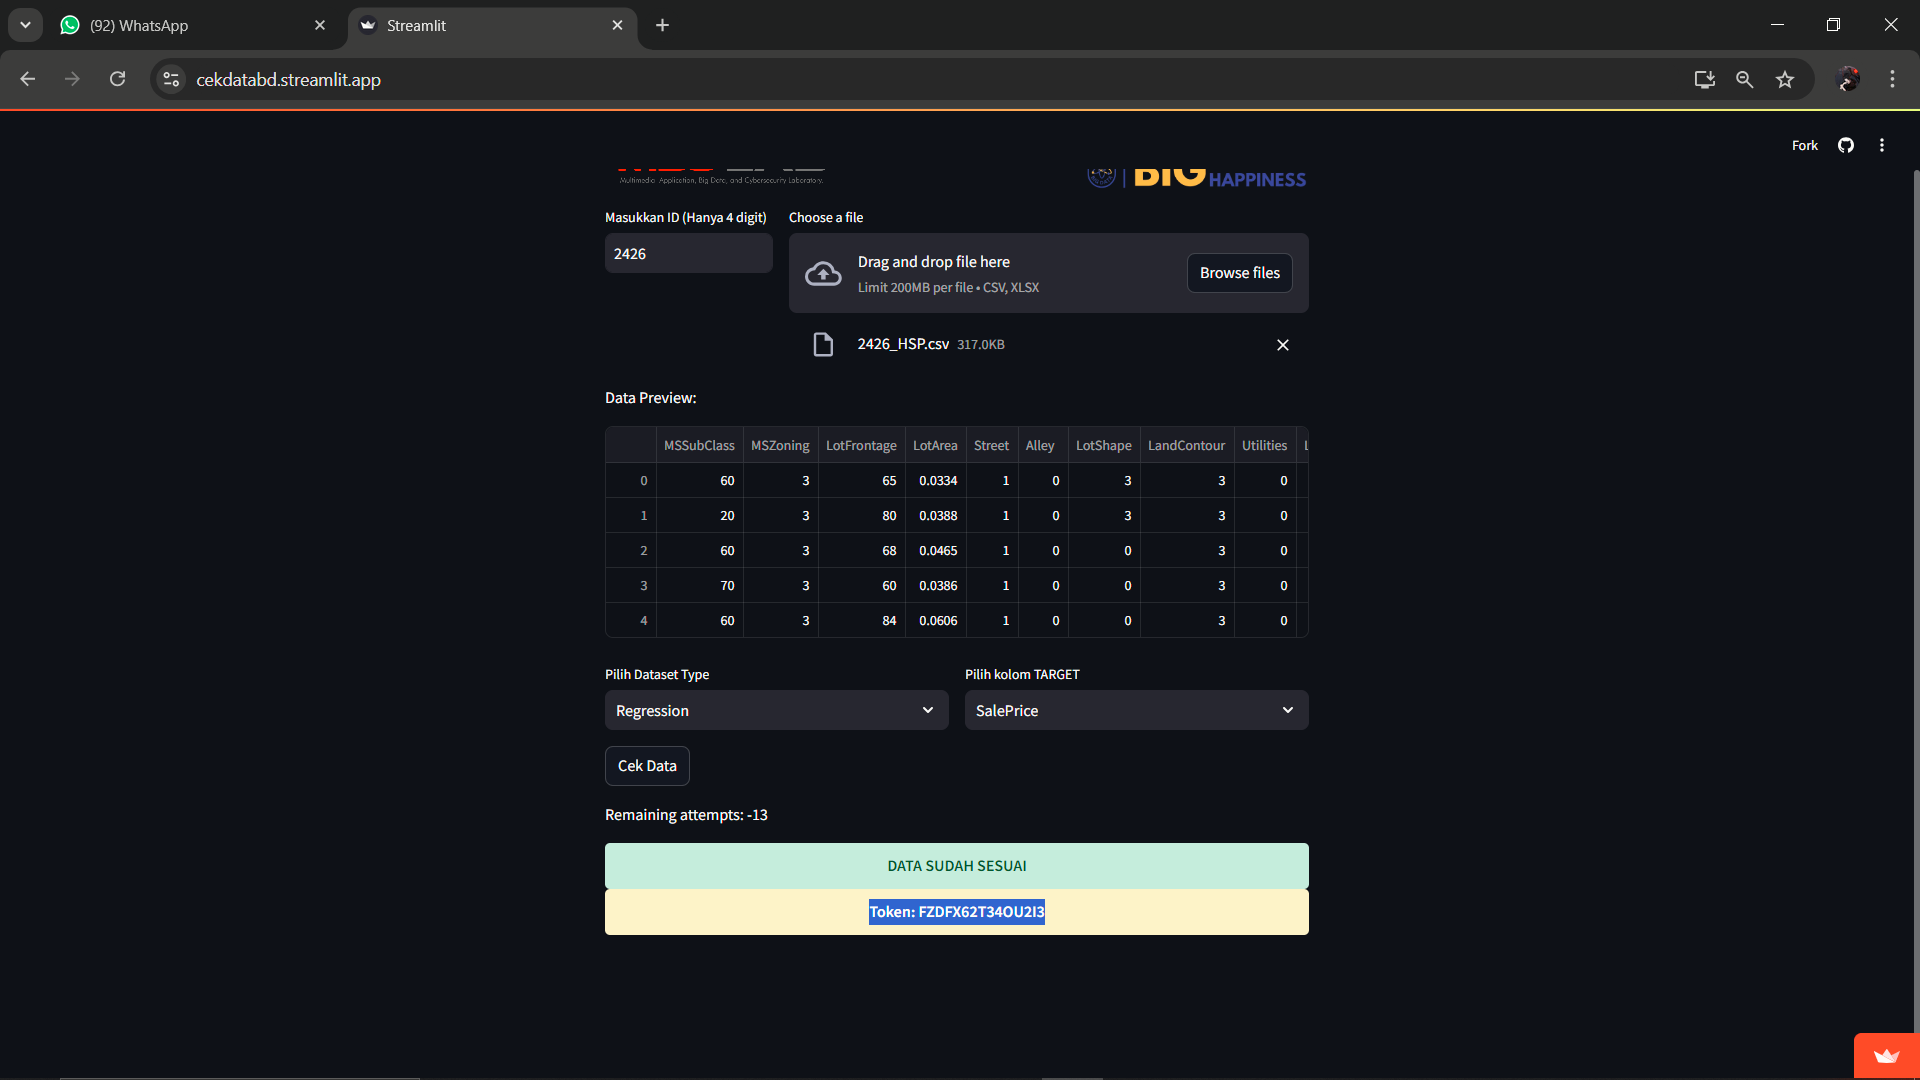

In [ ]:
Image(filename='/content/HSP_token.png')

# **SHP**

Dataset tentang penumpang beserta layanan2 yang dimilikinya

In [ ]:
# Panggil Dataset
df_SHP = pd.read_csv("/content/SHP.csv")

In [ ]:
df_SHP.head()

Unnamed: 0 PassengerId HomePlanet CryoSleep  Cabin    Destination   Age  \
0           0     0002_01      Earth     False  F/0/S    TRAPPIST-1e  24.0   
1           1     0004_01      Earth     False  F/1/S    TRAPPIST-1e  16.0   
2           2     0005_01      Earth     False  F/0/P  PSO J318.5-22  44.0   
3           3     0006_01      Earth     False  F/2/S    TRAPPIST-1e  26.0   
4           4     0006_02      Earth      True  G/0/S    TRAPPIST-1e  28.0   

     VIP RoomService FoodCourt ShoppingMall    Spa VRDeck                Name  \
0  False       109.0       9.0         25.0  549.0   44.0        Juanna Vines   
1  False       303.0      70.0        151.0  565.0    2.0   Willy Santantines   
2  False         0.0     483.0          0.0  291.0    0.0   Sandie Hinetthews   
3  False        42.0    1539.0          3.0    0.0    0.0  Billex Jacostaffey   
4  False         0.0       0.0          0.0    0.0    inf  Candra Jacostaffey   

   Transported  
0         True  
1         True  
2         True  
3         True  
4         True

# **---1---> Data Cleaning - SHP**

> **DROP FITUR TIDAK RELEVAN**

*   **Fitur Target :** Transported
*   **Model :** Klasifikasi

In [ ]:
kolom = ['Unnamed: 0', 'PassengerId', 'Name']

# Drop Kolom yang tidak Relevan
df_SHP = df_SHP.drop(columns = kolom, axis=1)

> **Perbaiki data yang rusak**

In [ ]:
# Cek adanya kesalahan tulis (-inf, inf, '-', dll)
check_broken_value(df_SHP)

'Data tidak Aman'

In [ ]:
df_SHP = toNaN(df_SHP)

In [ ]:
check_broken_value(df_SHP)

'Data Aman'

> **HANDLE MISSING VALUES**

In [ ]:
# Cek missing values
null = df_SHP.isnull().sum()

print(null[null > 0])

HomePlanet      273
CryoSleep       282
Cabin           274
Destination     265
Age             247
VIP             284
RoomService     234
FoodCourt       254
ShoppingMall    291
Spa             247
VRDeck          273
dtype: int64


In [ ]:
numerik = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
kategori = df_SHP.drop(columns = numerik, axis=1)

In [ ]:
df_SHP[numerik] = df_SHP[numerik].astype(float)

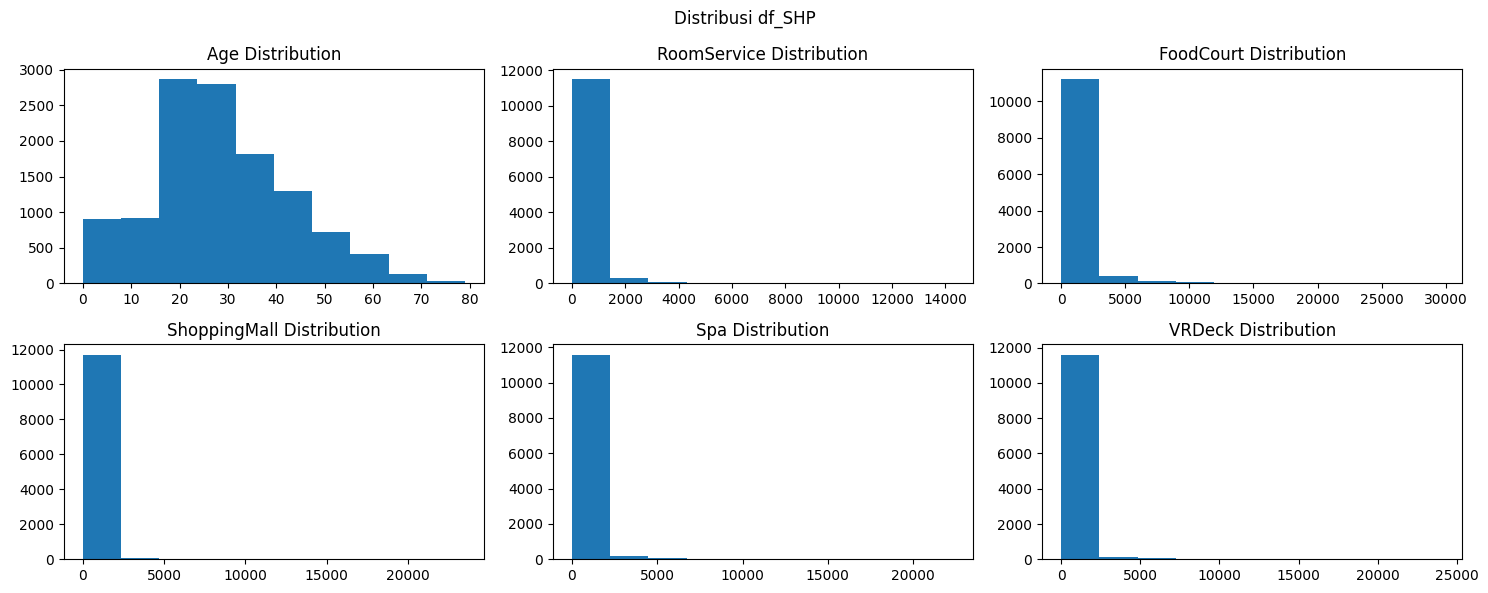

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 6))

axes[0, 0].hist(df_SHP['Age'])
axes[0, 1].hist(df_SHP['RoomService'])
axes[0, 2].hist(df_SHP['FoodCourt'])
axes[1, 0].hist(df_SHP['ShoppingMall'])
axes[1, 1].hist(df_SHP['Spa'])
axes[1, 2].hist(df_SHP['VRDeck'])

axes[0, 0].set_title('Age Distribution')
axes[0, 1].set_title('RoomService Distribution')
axes[0, 2].set_title('FoodCourt Distribution')
axes[1, 0].set_title('ShoppingMall Distribution')
axes[1, 1].set_title('Spa Distribution')
axes[1, 2].set_title('VRDeck Distribution')

fig.suptitle('Distribusi df_SHP')

plt.tight_layout()
plt.show()

In [ ]:
# Isi data NaN dengan median
df_SHP[numerik] = df_SHP[numerik].fillna(df_SHP[numerik].median()).astype(int)



> **Duplikasi**



In [ ]:
# Cek Duplikasi
df_SHP.duplicated().sum()

3468

In [ ]:
df_SHP = df_SHP.drop_duplicates()

# **---2---> Pre Processing - SHP**

> **Pisah kolom Cabin**

In [ ]:
df_SHP.sample()

HomePlanet CryoSleep     Cabin  Destination  Age    VIP  RoomService  \
3213       Mars     False  F/1279/S  TRAPPIST-1e   31  False         1002   

      FoodCourt  ShoppingMall  Spa  VRDeck  Transported  
3213          0             0    0       0         True

In [ ]:
# Memisahkan kolom
df_SHP[['Deck_Kabin', 'Nomor_Kabin', 'Posisi_Kabin']] = df_SHP['Cabin'].str.split('/', expand=True)

In [ ]:
kolom = ['Cabin', 'Nomor_Kabin']

# Drop Kolom yang tidak Relevan
df_SHP = df_SHP.drop(columns = kolom, axis=1)

In [ ]:
df_SHP.sample(3)

HomePlanet CryoSleep    Destination  Age    VIP  RoomService  FoodCourt  \
9376       Mars     False  PSO J318.5-22   71  False          924       1284   
8618      Earth     False    TRAPPIST-1e   33  False          954          0   
1939       Mars      True    TRAPPIST-1e   24  False            0          0   

      ShoppingMall  Spa  VRDeck  Transported Deck_Kabin Posisi_Kabin  
9376            10    9       0        False          F            S  
8618            10    3       2        False          F            P  
1939             0    0       0         True          F            S

> **Gabungkan beberapa kolom waktu**

In [ ]:
time = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [ ]:
# Jumlah waktu
df_SHP['total_time'] = df_SHP[time].sum(axis=1)
df_SHP = df_SHP.drop(columns = time, axis=1)

In [ ]:
df_SHP.sample(5)

HomePlanet CryoSleep    Destination  Age    VIP  Transported Deck_Kabin  \
1486       Earth      True  PSO J318.5-22   44  False         True          G   
11439      Earth     False    TRAPPIST-1e   25  False        False          G   
8772       Earth      True    TRAPPIST-1e   50  False        False          G   
2188        Mars      True    TRAPPIST-1e   25  False         True          E   
1296       Earth      True    TRAPPIST-1e    7  False         True          G   

      Posisi_Kabin  total_time  
1486             S           0  
11439            P         722  
8772             S           0  
2188             S           0  
1296             P           0

In [ ]:
df_SHP = df_SHP.drop_duplicates()

> **Encoding**

In [ ]:
# Encoding Label
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_SHP['HomePlanet'] = le.fit_transform(df_SHP['HomePlanet'])
df_SHP['CryoSleep'] = le.fit_transform(df_SHP['CryoSleep'])
df_SHP['Destination'] = le.fit_transform(df_SHP['Destination'])
df_SHP['VIP'] = le.fit_transform(df_SHP['VIP'])
df_SHP['Deck_Kabin'] = le.fit_transform(df_SHP['Deck_Kabin'])
df_SHP['Posisi_Kabin'] = le.fit_transform(df_SHP['Posisi_Kabin'])

Transported
False    3920
True     2925
Name: count, dtype: int64


<Axes: ylabel='count'>

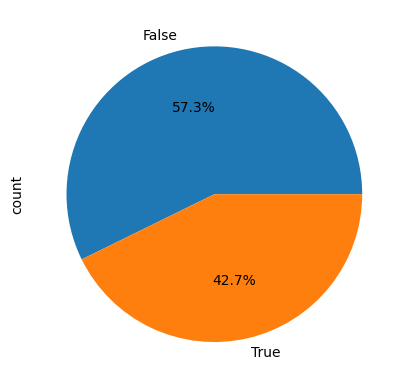

In [ ]:
# Frekuensi table
frequency_table = df_SHP['Transported'].value_counts()
print(frequency_table)

# Pie chart
df_SHP['Transported'].value_counts().plot(kind='pie', autopct='%1.1f%%')



> **SAMPLING**



In [ ]:
# Lakukan SMOTE
df_SHP = SMOTE(df_SHP, 'Transported')

In [ ]:
df_SHP = df_SHP.drop_duplicates()

Transported
False    3136
True     2808
Name: count, dtype: int64


<Axes: ylabel='count'>

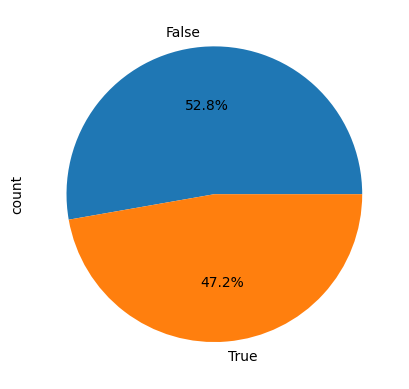

In [ ]:
# Frequency table
frequency_table = df_SHP['Transported'].value_counts()
print(frequency_table)

# Pie chart
df_SHP['Transported'].value_counts().plot(kind='pie', autopct='%1.1f%%')

# **---3---> Hasil - HSP**

In [ ]:
check_classification(df_SHP, 'Transported', '2426_SHP')

'Data berhasil disimpan'

**Token:** 02ASLX43T36W27D

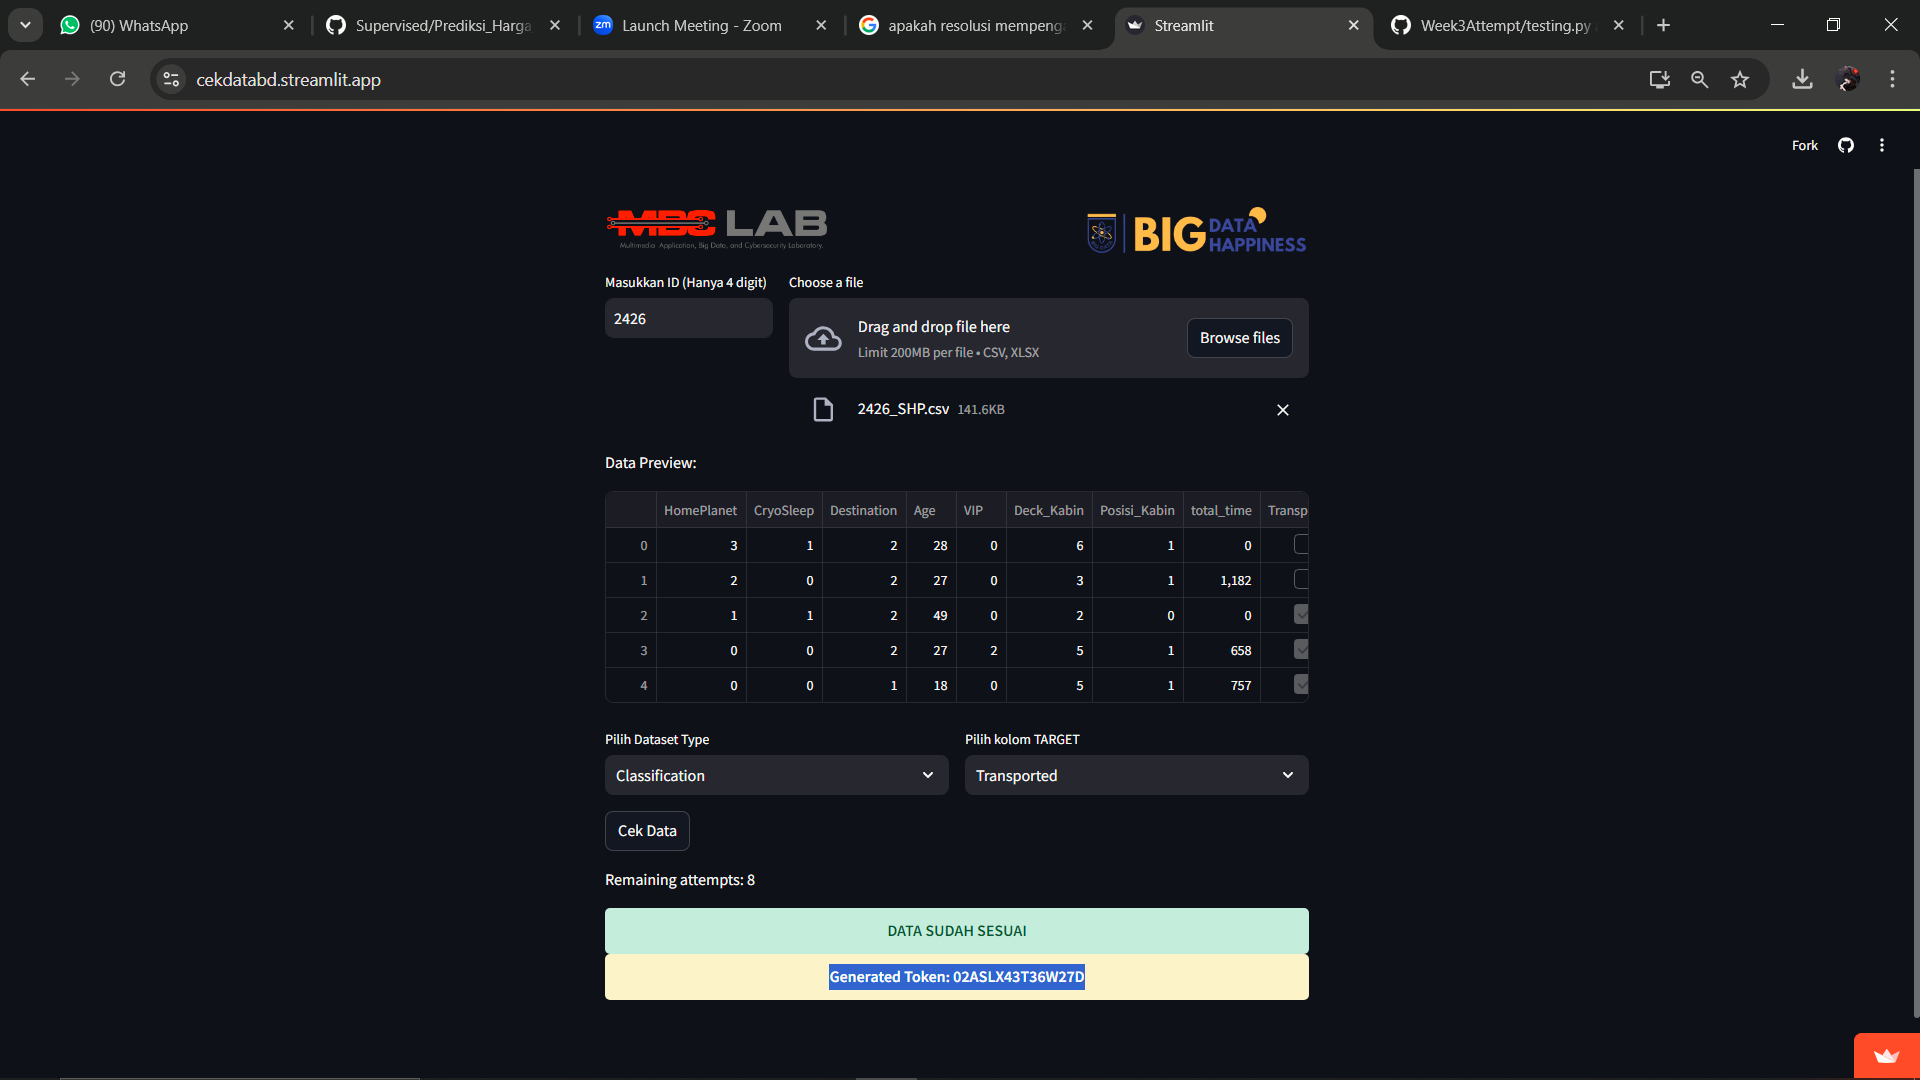

In [ ]:
Image(filename='/content/SHP_token.png')

# **CHN**

Dataset untuk analisis banyak pelanggan yang berhenti melakukan service pada layanan internet

In [ ]:
# Panggil Dataset
df_CHN = pd.read_csv("/content/CHN.csv")

In [ ]:
df_CHN.head()

Unnamed: 0  customerID  gender SeniorCitizen Partner Dependents tenure  \
0           0  7590-VHVEG  Female           0.0     Yes         No    1.0   
1           1  5575-GNVDE    Male           0.0      No         No   34.0   
2           2  3668-QPYBK    Male           0.0      No         No    2.0   
3           3  7795-CFOCW    Male           0.0      No         No   45.0   
4           4  9237-HQITU  Female           0.0      No         No    NaN   

  PhoneService     MultipleLines InternetService  ... DeviceProtection  \
0           No  No phone service             DSL  ...               No   
1          Yes                No             DSL  ...              Yes   
2          Yes                No             DSL  ...               No   
3           No  No phone service             DSL  ...              Yes   
4          Yes                No     Fiber optic  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges TotalCharges Churn  
0           Electronic check          29.85        29.85    No  
1               Mailed check          56.95       1889.5    No  
2               Mailed check          53.85       108.15   Yes  
3  Bank transfer (automatic)           42.3      1840.75    No  
4           Electronic check           70.7       151.65   Yes  

[5 rows x 22 columns]

# **---1---> Data Cleaning - CHN**

> **DROP FITUR TIDAK RELEVAN**

*   **Fitur Target :** Churn
*   **Model :** Klasifikasi

In [ ]:
kolom = ['Unnamed: 0', 'customerID']

# Drop Kolom yang tidak Relevan
df_CHN = df_CHN.drop(columns = kolom, axis=1)

> **Perbaiki data yang rusak**

In [ ]:
# Cek adanya kesalahan tulis (-inf, inf, '-', dll)
check_broken_value(df_CHN)

'Data tidak Aman'

In [ ]:
# Ubah salah tulis menjadi nilai NaN
df_CHN = toNaN(df_CHN)

In [ ]:
# Cek adanya kesalahan tulis (-inf, inf, '-', dll)
check_broken_value(df_CHN)

'Data Aman'

> **HANDLE MISSING VALUES**

In [ ]:
# Cek missing values
null = df_CHN.isnull().sum()

print(null[null > 0])

SeniorCitizen     2246
tenure            2246
MonthlyCharges    2246
TotalCharges        22
dtype: int64


In [ ]:
df_CHN['SeniorCitizen'].unique()

array(['0.0', nan, '1.0', ..., '0.009966377061848697',
       '0.9913752572613183', '0.0018739479537013093'], dtype=object)

In [ ]:
df_CHN['tenure'].unique()

array(['1.0', '34.0', '2.0', ..., '31.001416683295137',
       '1.0079946006237008', '19.992739604191748'], dtype=object)

In [ ]:
df_CHN['MonthlyCharges'].unique()

array(['29.85', '56.95', '53.85', ..., '19.502302781713354',
       '74.89083241253785', '69.64814772905343'], dtype=object)

In [ ]:
df_CHN['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [ ]:
kolom_NaN = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

df_CHN[kolom_NaN] = df_CHN[kolom_NaN].astype(float)

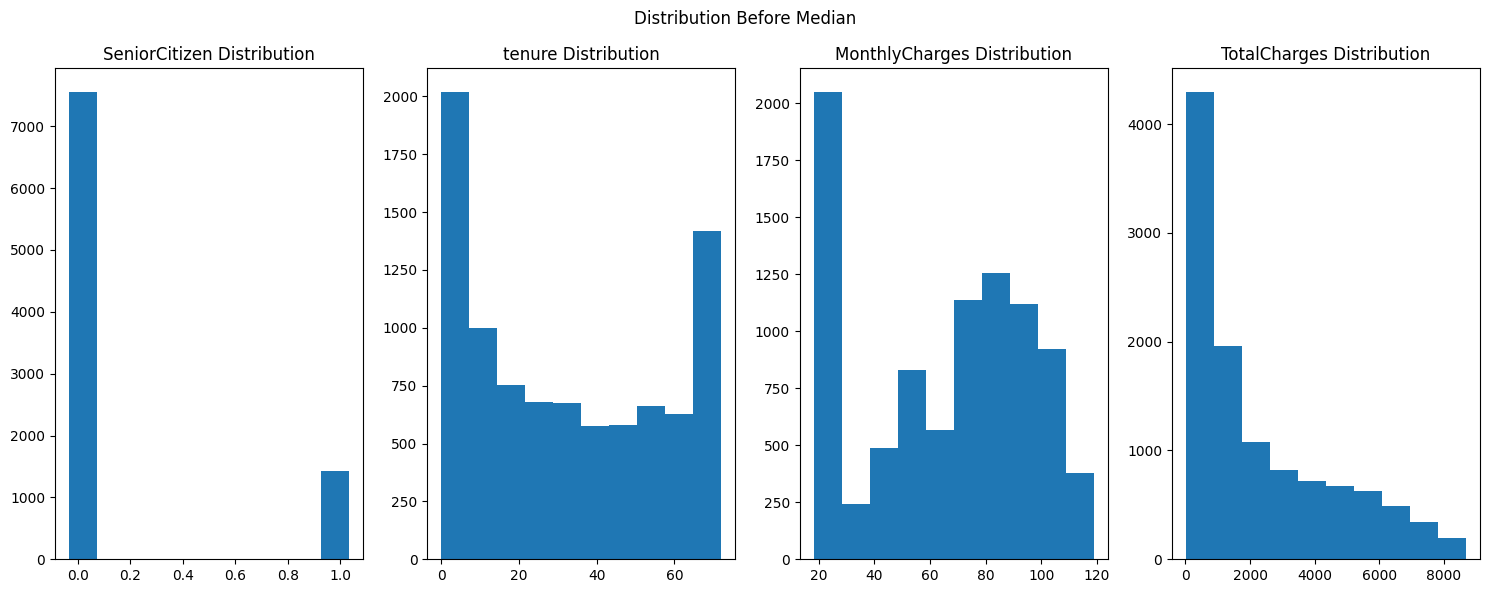

In [ ]:
# Adjust figsize to accommodate all columns
fig, axes = plt.subplots(1, 4, figsize=(15, 6))

# Plot boxplots on each subplot
axes[0].hist(df_CHN['SeniorCitizen'])
axes[1].hist(df_CHN['tenure'])
axes[2].hist(df_CHN['MonthlyCharges'])
axes[3].hist(df_CHN['TotalCharges'])

# Set labels and a single title for each subplot
axes[0].set_title('SeniorCitizen Distribution')
axes[1].set_title('tenure Distribution')
axes[2].set_title('MonthlyCharges Distribution')
axes[3].set_title('TotalCharges Distribution')

fig.suptitle('Distribution Before Median')

plt.tight_layout()
plt.show()

In [ ]:
# Lakukan Median
df_CHN[['tenure', 'MonthlyCharges', 'TotalCharges']] = df_CHN[['tenure', 'MonthlyCharges', 'TotalCharges']].fillna(df_CHN[['tenure', 'MonthlyCharges', 'TotalCharges']].median())

# Lakukan Modus pada binary
df_CHN['SeniorCitizen'] = df_CHN['SeniorCitizen'].fillna(df_CHN['SeniorCitizen'].mode()[0]).astype(int)

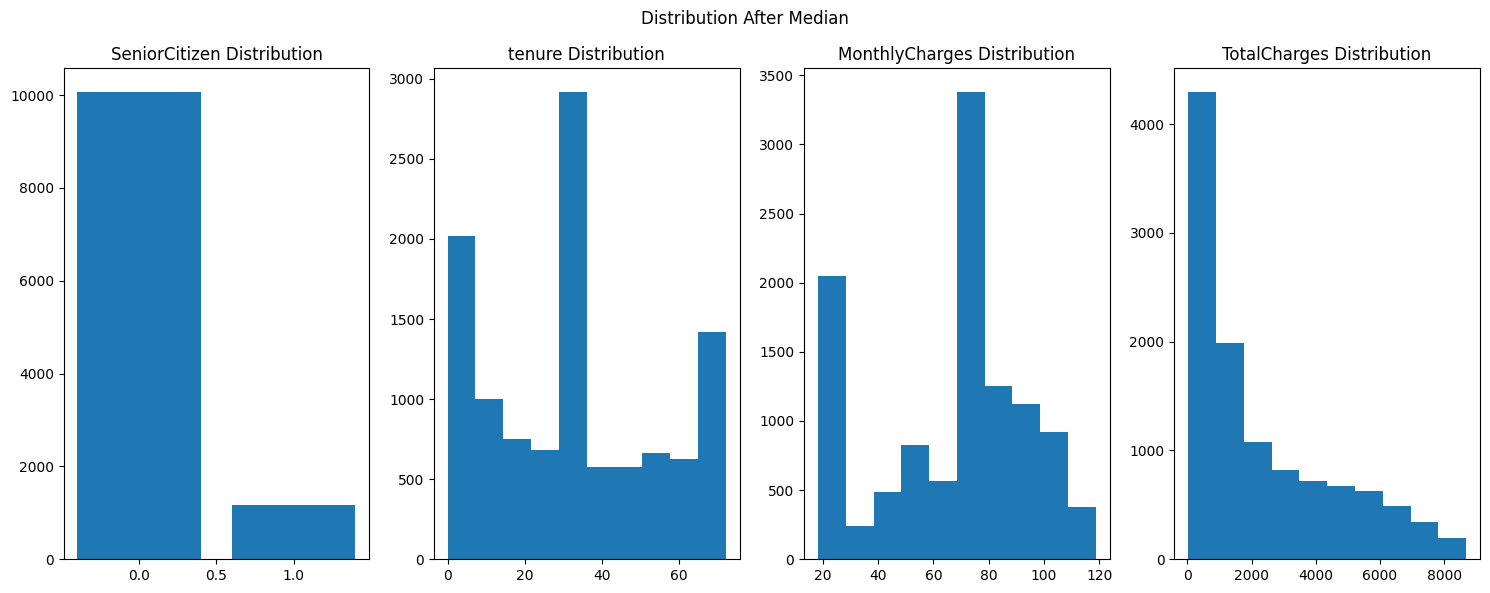

In [ ]:
# Adjust figsize to accommodate all columns
fig, axes = plt.subplots(1, 4, figsize=(15, 6))

freq = df_CHN['SeniorCitizen'].value_counts()

# Plot boxplots on each subplot
axes[0].bar(freq.index, freq.values)
axes[1].hist(df_CHN['tenure'])
axes[2].hist(df_CHN['MonthlyCharges'])
axes[3].hist(df_CHN['TotalCharges'])

# Set labels and a single title for each subplot
axes[0].set_title('SeniorCitizen Distribution')
axes[1].set_title('tenure Distribution')
axes[2].set_title('MonthlyCharges Distribution')
axes[3].set_title('TotalCharges Distribution')

fig.suptitle('Distribution After Median')

plt.tight_layout()
plt.show()

In [ ]:
# Cek missing values
null = df_CHN.isnull().sum()
null

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

> **Hapus Duplikasi**

In [ ]:
# Cek Duplikasi
df_CHN.duplicated().sum()

15

In [ ]:
df_CHN = df_CHN.drop_duplicates()

# **---2---> Pre Processing - CHN**

In [ ]:
df_CHN.sample(4)

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
2359    Male              0     Yes         No    33.0          Yes   
1285    Male              1     Yes         No     7.0          Yes   
6590  Female              0      No         No     1.0          Yes   
159     Male              0      No         No    10.0          Yes   

     MultipleLines InternetService       OnlineSecurity         OnlineBackup  \
2359           Yes             DSL                  Yes                  Yes   
1285            No     Fiber optic                   No                   No   
6590            No     Fiber optic                   No                   No   
159            Yes              No  No internet service  No internet service   

         DeviceProtection          TechSupport          StreamingTV  \
2359                  Yes                   No                  Yes   
1285                   No                   No                  Yes   
6590                   No                   No                   No   
159   No internet service  No internet service  No internet service   

          StreamingMovies        Contract PaperlessBilling  \
2359                   No  Month-to-month              Yes   
1285                  Yes  Month-to-month              Yes   
6590                   No  Month-to-month              Yes   
159   No internet service        Two year               No   

                  PaymentMethod  MonthlyCharges  TotalCharges Churn  
2359  Bank transfer (automatic)           72.75       2447.45    No  
1285           Electronic check           89.50        676.70   Yes  
6590           Electronic check           70.85         70.85   Yes  
159   Bank transfer (automatic)           25.70        251.60    No



> > **Perbaiki Kolom Binary Yes dan No**



In [ ]:
YesNoColumn = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

In [ ]:
df_CHN['Partner'].value_counts()

Partner
No     5779
Yes    5331
yEs     109
Name: count, dtype: int64

In [ ]:
def check_broken_value2(df):
    for column in df.columns:
        if not df[column].isin(['YES', 'NO']).any():
            return "Data tidak Aman"
    return "Data Aman"

In [ ]:
check_broken_value2(df_CHN[YesNoColumn])

'Data tidak Aman'

In [ ]:
df_CHN['Churn'].unique()

array(['No', 'Yes', 'nO', 'yeS'], dtype=object)

In [ ]:
df_CHN['PhoneService'].unique()

array(['No', 'Yes', 'yEs', 'no'], dtype=object)

In [ ]:
df_CHN['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service', 'yeS', 'no'], dtype=object)

In [ ]:
# Jadikan No pada No internet service dan No phone service
fixer = {'No internet service': 'No', 'No phone service': 'No'}
df_CHN = df_CHN.replace(fixer)

In [ ]:
# Jadikan uppercase semua binary Yes dan No
def uppercase(df):

  for column in df.columns:
    df[column] = df[column].str.upper()

  return df

In [ ]:
df_CHN[YesNoColumn] = uppercase(df_CHN[YesNoColumn])

<ipython-input-233-73bb76c683ff>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].str.upper()


In [ ]:
check_broken_value2(df_CHN[YesNoColumn])

'Data Aman'

In [ ]:
df_CHN.sample(7)

gender  SeniorCitizen Partner Dependents     tenure PhoneService  \
10529  Female              1      NO         NO   1.001416           NO   
2618     Male              0     YES        YES  25.000000          YES   
4538   Female              0      NO         NO   3.000000          YES   
10527    Male              1     YES         NO  44.974526          YES   
74     Female              0      NO        YES   3.000000          YES   
5847   Female              0      NO         NO  62.000000          YES   
7970   Female              0     YES         NO  29.000000          YES   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
10529            NO             DSL             NO           NO   
2618             NO              No             NO           NO   
4538             NO     Fiber optic             NO           NO   
10527           YES             DSL            YES           NO   
74               NO             DSL            YES           NO   
5847            YES     Fiber optic             NO           NO   
7970            YES             DSL            YES          YES   

      DeviceProtection TechSupport StreamingTV StreamingMovies  \
10529               NO          NO          NO              NO   
2618                NO          NO          NO              NO   
4538                NO         YES          NO             YES   
10527              YES         YES          NO             YES   
74                  NO         YES          NO             YES   
5847                NO          NO         YES             YES   
7970               YES         YES         YES             YES   

             Contract PaperlessBilling              PaymentMethod  \
10529  Month-to-month               NO           Electronic check   
2618         One year               NO           Electronic check   
4538   Month-to-month               NO           Electronic check   
10527        Two year               NO    Credit card (automatic)   
74     Month-to-month              YES  Bank transfer (automatic)   
5847         One year              YES  Bank transfer (automatic)   
7970         Two year               NO           Electronic check   

       MonthlyCharges  TotalCharges Churn  
10529       70.400000         25.25   YES  
2618        70.400000        505.45    NO  
4538        85.800000        272.20   YES  
10527       75.143420       3480.35    NO  
74          70.400000        177.40    NO  
5847        94.000000       5757.20    NO  
7970        90.091767       6310.90    NO



> **Encoding**



In [ ]:
# Ubah ke Boolean
df_CHN['Churn'] = df_CHN['Churn'].map({'YES': True, 'NO': False})

In [ ]:
# Encoding Label
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

kolom = df_CHN.select_dtypes(include='object').columns

# Encode object columns
for col in kolom:
    df_CHN[col] = le.fit_transform(df_CHN[col])

In [ ]:
df_CHN.head(10)

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0     1.0             0   
1       1              0        0           0    34.0             1   
2       1              0        0           0     2.0             1   
3       1              0        0           0    45.0             0   
4       0              0        0           0    29.0             1   
5       0              0        0           0     8.0             1   
6       1              0        0           1    22.0             1   
7       0              0        0           0    29.0             0   
8       0              0        1           0    28.0             1   
9       1              0        0           1    62.0             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              0                0               0             1   
1              0                0               1             0   
2              0                0               1             1   
3              0                0               1             0   
4              0                1               0             0   
5              1                1               0             0   
6              1                1               0             1   
7              0                0               1             0   
8              1                1               0             0   
9              0                0               1             1   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 1            0            0                0         1   
2                 0            0            0                0         0   
3                 1            1            0                0         1   
4                 0            0            0                0         0   
5                 1            0            1                1         0   
6                 0            0            1                0         0   
7                 0            0            0                0         0   
8                 1            1            1                1         0   
9                 0            0            0                0         1   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2           29.85         29.85  False  
1                 0              3           56.95       1889.50  False  
2                 1              3           53.85        108.15   True  
3                 0              0           42.30       1840.75  False  
4                 1              2           70.70        151.65   True  
5                 1              2           99.65        820.50   True  
6                 1              1           89.10       1949.40  False  
7                 0              3           70.40        301.90  False  
8                 1              2          104.80       3046.05   True  
9                 0              0           56.15       3487.95  False

Churn
False    8291
True     2928
Name: count, dtype: int64


<Axes: ylabel='count'>

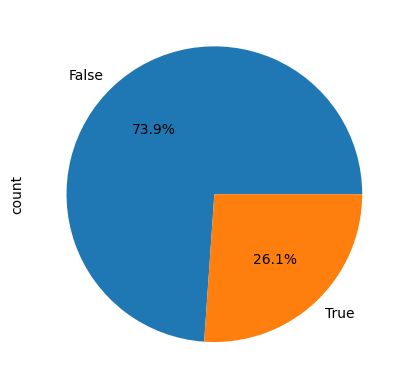

In [ ]:
# Frequency table
frequency_table = df_CHN['Churn'].value_counts()
print(frequency_table)

# Pie chart
df_CHN['Churn'].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [ ]:
# Lakukan SMOTE
df_CHN = SMOTE(df_CHN, 'Churn')

In [ ]:
df_CHN = df_CHN.drop_duplicates()

Churn
False    6632
True     6626
Name: count, dtype: int64


<Axes: ylabel='count'>

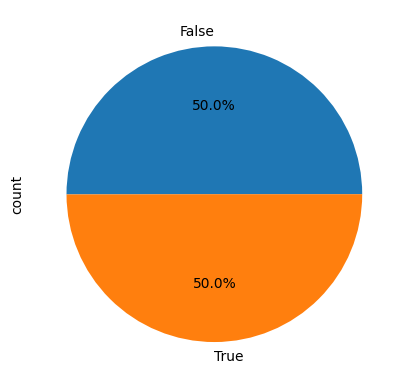

In [ ]:
# Frequency table
frequency_table = df_CHN['Churn'].value_counts()
print(frequency_table)

# Pie chart
df_CHN['Churn'].value_counts().plot(kind='pie', autopct='%1.1f%%')

# **---3---> Hasil - HSP**

In [ ]:
check_classification(df_CHN, 'Churn', '2426_CHN')

'Data berhasil disimpan'

**Token:** 2JCEU42R5E6CYLY

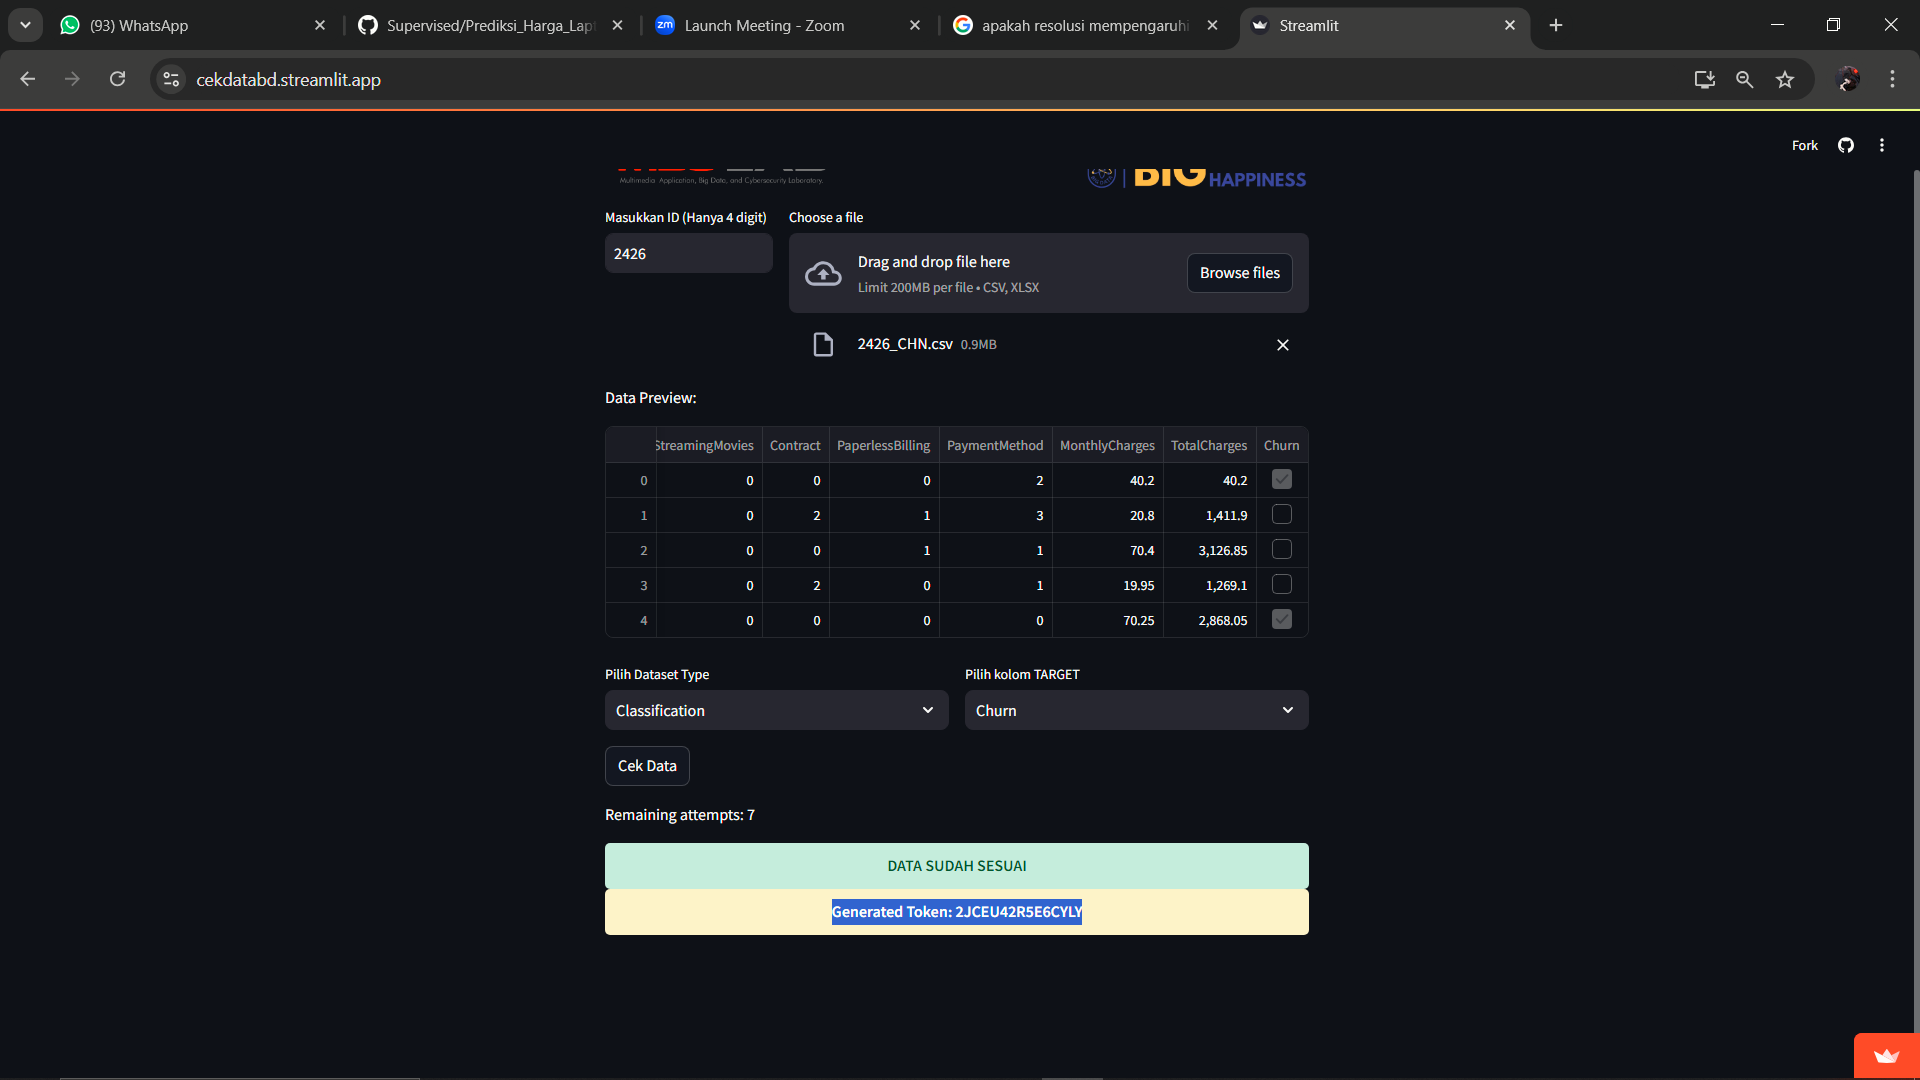

In [ ]:
Image(filename='/content/CHN_token.png')

# **SPY**

Dataset yang berisi track2 beserta skornya dalam beberapa platform musik yang ada

In [ ]:
# Panggil Dataset
df_SPY = pd.read_csv("/content/SPY.csv")

In [ ]:
df_SPY.head()

Unnamed: 0                       Track                    Album Name  \
0           0         MILLION DOLLAR BABY  Million Dollar Baby - Single   
1           1                 Not Like Us                   Not Like Us   
2           2  i like the way you kiss me    I like the way you kiss me   
3           3                     Flowers              Flowers - Single   
4           4                     Houdini                       Houdini   

           Artist Release Date          ISRC All Time Rank Track Score  \
0   Tommy Richman    4/26/2024  QM24S2402528             1       725.4   
1  Kendrick Lamar     5/4/2024  USUG12400910             2       545.9   
2         Artemas    3/19/2024  QZJ842400387             3       538.4   
3     Miley Cyrus    1/12/2023  USSM12209777             4       444.9   
4          Eminem    5/31/2024  USUG12403398             5       423.3   

  Spotify Streams Spotify Playlist Count  ... SiriusXM Spins  \
0     390,470,936                 30,716  ...            684   
1     323,703,884                 28,113  ...              3   
2     601,309,283                 54,331  ...            536   
3   2,031,280,633                269,802  ...          2,182   
4     107,034,922                  7,223  ...              1   

  Deezer Playlist Count Deezer Playlist Reach Amazon Playlist Count  \
0                  62.0            17,598,718                 114.0   
1                  67.0            10,422,430                 111.0   
2                 136.0            36,321,847                 172.0   
3                 264.0            24,684,248                 210.0   
4                   NaN            17,660,624                 105.0   

  Pandora Streams Pandora Track Stations Soundcloud Streams Shazam Counts  \
0      18,004,655                 22,931          4,818,457     2,669,262   
1       7,780,028                 28,444          6,623,075     1,118,279   
2       5,022,621                  5,639          7,208,651     5,285,340   
3     190,260,277                203,384                NaN    11,822,942   
4       4,493,884                  7,006            207,179       457,017   

  TIDAL Popularity Explicit Track  
0                -            0.0  
1              NaN            1.0  
2              NaN            0.0  
3              NaN            0.0  
4              NaN            1.0  

[5 rows x 30 columns]

# **---1---> Data Cleaning - SPY**

> **DROP FITUR TIDAK RELEVAN**

*   **Fitur Target :** Track Score
*   **Model :** Regresi

In [ ]:
# Cek missing values
null = df_SPY.isnull().sum()

print(null[null > 0])

Artist                           3
Track Score                    784
Spotify Streams                 92
Spotify Playlist Count          56
Spotify Playlist Reach          65
Spotify Popularity            1372
YouTube Views                  271
YouTube Likes                  283
TikTok Posts                  1012
TikTok Likes                   839
TikTok Views                   882
YouTube Playlist Reach         875
Apple Music Playlist Count    1202
AirPlay Spins                  418
SiriusXM Spins                1835
Deezer Playlist Count         1450
Deezer Playlist Reach          792
Amazon Playlist Count         1532
Pandora Streams                956
Pandora Track Stations        1105
Soundcloud Streams            2894
Shazam Counts                  510
TIDAL Popularity              4004
dtype: int64


In [ ]:
# Broken
df_SPY['TIDAL Popularity'].unique()

array(['-', nan, 'inf', '-inf'], dtype=object)

In [ ]:
kolom = ['Unnamed: 0', 'Track', 'Album Name', 'Artist', 'Release Date', 'ISRC', 'All Time Rank', 'TIDAL Popularity']

# Drop Kolom yang tidak Relevan
df_SPY = df_SPY.drop(columns = kolom, axis=1)

> **PERBAIKI DATA YANG RUSAK**

In [ ]:
# Cek adanya kesalahan tulis (-inf, inf, '-', dll)
check_broken_value(df_SPY)

'Data tidak Aman'

In [ ]:
toNaN = {'inf': np.nan, '-inf': np.nan, '-' : np.nan, ' ' : np.nan}
df_SPY = df_SPY.replace(toNaN)

In [ ]:
check_broken_value(df_SPY)

'Data Aman'

> **Handling Missing Values**

In [ ]:
# Cek missing values
null = df_SPY.isnull().sum()

print(null[null > 0])

Track Score                   1374
Spotify Streams                163
Spotify Playlist Count         106
Spotify Playlist Reach         110
Spotify Popularity            2332
YouTube Views                  464
YouTube Likes                  476
TikTok Posts                  1738
TikTok Likes                  1454
TikTok Views                  1455
YouTube Playlist Reach        1511
Apple Music Playlist Count    2045
AirPlay Spins                  740
SiriusXM Spins                3177
Deezer Playlist Count         2465
Deezer Playlist Reach         1373
Amazon Playlist Count         2661
Pandora Streams               1642
Pandora Track Stations        1889
Soundcloud Streams            5013
Shazam Counts                  847
dtype: int64


In [ ]:
df_SPY.sample(3)

Track Score Spotify Streams Spotify Playlist Count  \
3464        23.3      48,573,000                 12,116   
2285        30.0     272,261,201                    871   
2101        31.5     145,332,157                  8,065   

     Spotify Playlist Reach Spotify Popularity YouTube Views YouTube Likes  \
3464             42,703,266                NaN    10,575,780       130,509   
2285                379,289                NaN           NaN           NaN   
2101             19,954,898                NaN    79,026,835       407,599   

     TikTok Posts TikTok Likes TikTok Views  ... AirPlay Spins SiriusXM Spins  \
3464          583      184,636    7,526,758  ...        49,396            176   
2285          NaN          NaN          NaN  ...             1            NaN   
2101          NaN      115,698      670,588  ...           701              7   

     Deezer Playlist Count Deezer Playlist Reach Amazon Playlist Count  \
3464                  33.0               548,530                   NaN   
2285                   NaN                   NaN                   NaN   
2101                   8.0             8,103,118                   4.0   

     Pandora Streams Pandora Track Stations Soundcloud Streams Shazam Counts  \
3464         424,106                    177                NaN       773,165   
2285      67,028,949                 47,571                NaN           NaN   
2101         738,838                    412            215,913       233,530   

     Explicit Track  
3464            0.0  
2285            0.0  
2101            0.0  

[3 rows x 22 columns]

In [ ]:
#fungsi hapus koma
def hapuskoma(df):

    kolom = df.select_dtypes(include='object').columns

    for column in kolom:
        if df[column].str.contains(',').any():
           df[column] = df[column].str.replace(',','').astype(float)
        elif df[column].str.contains('.').any():
           df[column] = df[column].astype(float)
    return df

In [ ]:
df_SPY = hapuskoma(df_SPY)

In [ ]:
df_SPY.sample(3)

Track Score  Spotify Streams  Spotify Playlist Count  \
1976     32.50000      385438228.0                 51062.0   
3432     23.50000      569767392.0                102907.0   
6712     52.61667      166161044.0                 22288.0   

      Spotify Playlist Reach  Spotify Popularity  YouTube Views  \
1976              16368668.0           68.000000   2.103164e+09   
3432              12253671.0                 NaN   4.685130e+08   
6712               7774873.0           61.000263   3.035698e+08   

      YouTube Likes  TikTok Posts  TikTok Likes  TikTok Views  ...  \
1976      6262143.0       79200.0     6897061.0  5.563548e+07  ...   
3432      3937324.0      539686.0   137326889.0  1.026583e+09  ...   
6712      5827005.0     3903605.0   865870535.0  9.393168e+09  ...   

      AirPlay Spins  SiriusXM Spins  Deezer Playlist Count  \
1976        10723.0            44.0              44.000000   
3432          715.0             NaN              25.000000   
6712         5680.0            32.0               4.999806   

      Deezer Playlist Reach  Amazon Playlist Count  Pandora Streams  \
1976               946232.0              18.000000      258667098.0   
3432                25133.0                    NaN      301411280.0   
6712                53217.0               7.995446              NaN   

      Pandora Track Stations  Soundcloud Streams  Shazam Counts  \
1976                 98630.0                 NaN      4433372.0   
3432                105587.0                 NaN      3181996.0   
6712                     NaN                 NaN       778299.0   

      Explicit Track  
1976        0.000000  
3432        1.000000  
6712        0.001667  

[3 rows x 22 columns]

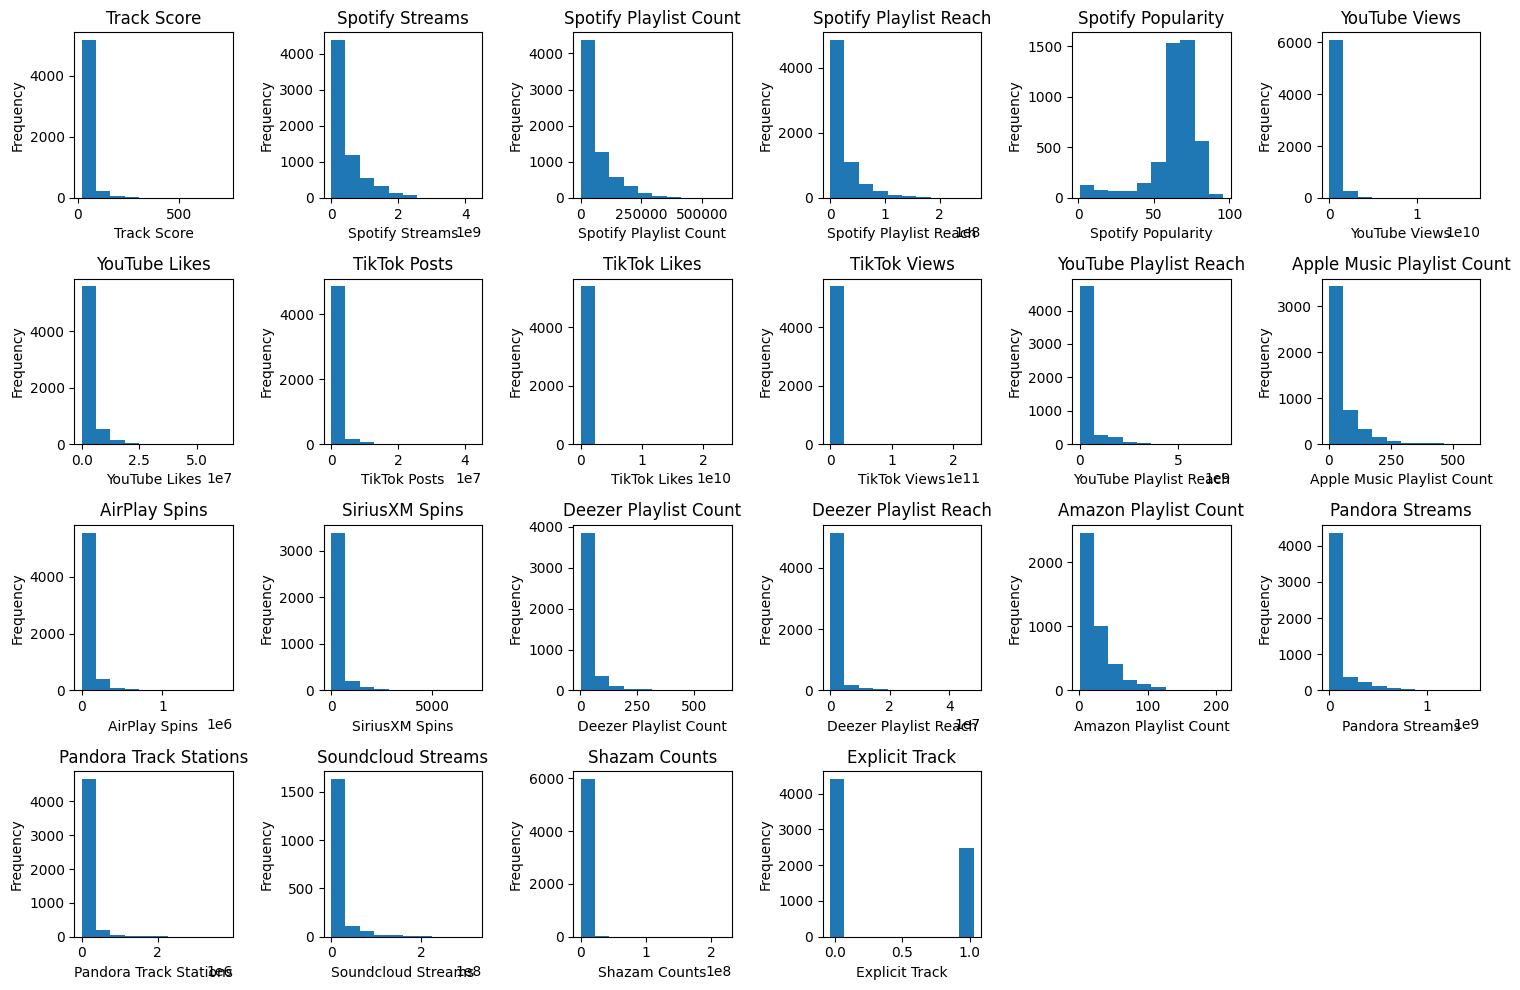

In [ ]:
create_hist(df_SPY)

In [ ]:
# Modus pada Binary
df_SPY['Explicit Track'] = df_SPY['Explicit Track'].fillna(df_SPY['Explicit Track'].mode()[0]).astype(int)



> **Median pada distribusi miring**



In [ ]:
def median(df):

    kolom = df.select_dtypes(include=['float64']).columns

    for column in kolom:
        df[kolom] = df[kolom].fillna(df[kolom].median())
    return df

In [ ]:
df_SPY = median(df_SPY)

In [ ]:
kolom = df_SPY.drop(columns=['Track Score', 'Explicit Track'])
kolom = kolom.columns
kolom

Index(['Spotify Streams', 'Spotify Playlist Count', 'Spotify Playlist Reach',
       'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts',
       'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
       'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins',
       'Deezer Playlist Count', 'Deezer Playlist Reach',
       'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations',
       'Soundcloud Streams', 'Shazam Counts'],
      dtype='object')

In [ ]:
# Cek missing values
df_SPY.isnull().sum()

Track Score                   0
Spotify Streams               0
Spotify Playlist Count        0
Spotify Playlist Reach        0
Spotify Popularity            0
YouTube Views                 0
YouTube Likes                 0
TikTok Posts                  0
TikTok Likes                  0
TikTok Views                  0
YouTube Playlist Reach        0
Apple Music Playlist Count    0
AirPlay Spins                 0
SiriusXM Spins                0
Deezer Playlist Count         0
Deezer Playlist Reach         0
Amazon Playlist Count         0
Pandora Streams               0
Pandora Track Stations        0
Soundcloud Streams            0
Shazam Counts                 0
Explicit Track                0
dtype: int64

# **---2---> PRE PROCESSING - SPY**

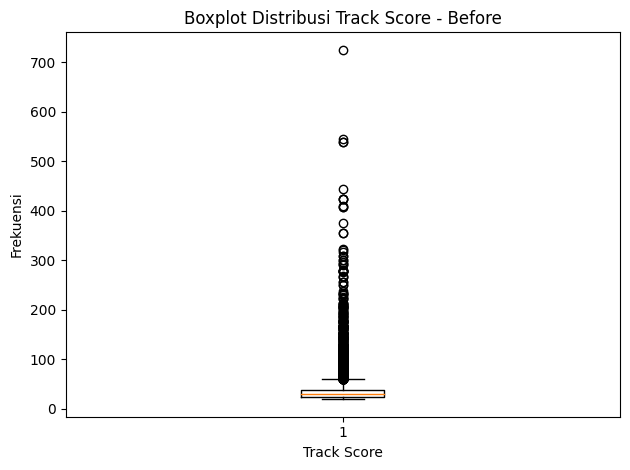

In [ ]:
plt.boxplot(df_SPY['Track Score'])
plt.xlabel('Track Score')
plt.ylabel('Frekuensi')
plt.title(f'Boxplot Distribusi Track Score - Before')

plt.tight_layout()
plt.show()

In [ ]:
df_SPY = cap_floor(df_SPY, 'Track Score')

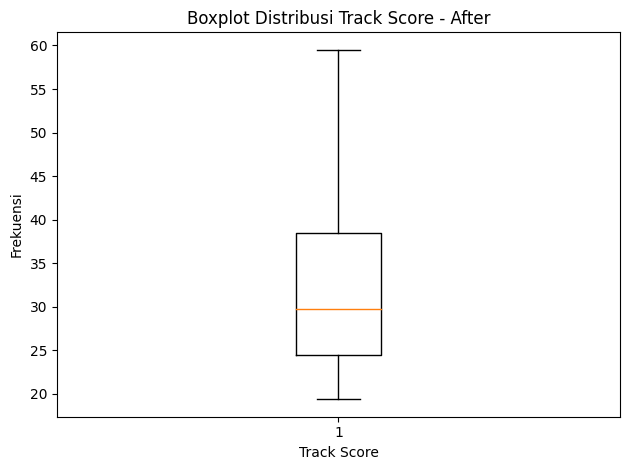

In [ ]:
plt.boxplot(df_SPY['Track Score'])
plt.xlabel('Track Score')
plt.ylabel('Frekuensi')
plt.title(f'Boxplot Distribusi Track Score - After')

plt.tight_layout()
plt.show()

In [ ]:
df_SPY = df_SPY.drop_duplicates()

In [ ]:
df_SPY = cap_floor(df_SPY, 'Track Score')

<ipython-input-3-5956554c9682>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].clip(lower=floor, upper=cap)


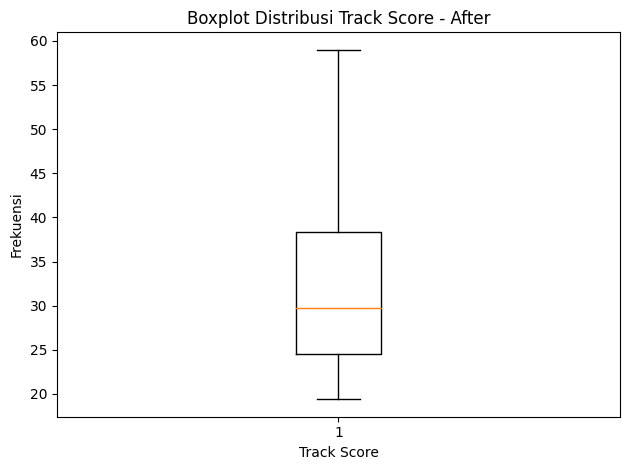

In [ ]:
plt.boxplot(df_SPY['Track Score'])
plt.xlabel('Track Score')
plt.ylabel('Frekuensi')
plt.title(f'Boxplot Distribusi Track Score - After')

plt.tight_layout()
plt.show()

In [ ]:
# Cek missing values
null = df_SPY.isnull().sum()

print(null[null > 0])

Series([], dtype: int64)


In [ ]:
# Cek Duplikasi
df_SPY.duplicated().sum()

0

In [ ]:
kolom = df_SPY.drop(columns=['Explicit Track'])
kolom = kolom.columns
kolom

Index(['Track Score', 'Spotify Streams', 'Spotify Playlist Count',
       'Spotify Playlist Reach', 'Spotify Popularity', 'YouTube Views',
       'YouTube Likes', 'TikTok Posts', 'TikTok Likes', 'TikTok Views',
       'YouTube Playlist Reach', 'Apple Music Playlist Count', 'AirPlay Spins',
       'SiriusXM Spins', 'Deezer Playlist Count', 'Deezer Playlist Reach',
       'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations',
       'Soundcloud Streams', 'Shazam Counts'],
      dtype='object')

In [ ]:
# Scaling
from sklearn.preprocessing import MinMaxScaler

# Min-Max Scaling
scaler = MinMaxScaler()
df_SPY[kolom] = scaler.fit_transform(df_SPY[kolom])

In [ ]:
LinearRegression(df_SPY, 'Track Score')

Model Score:  0.2515973306794501
Mean Squared Error:  0.07285529815346774
R-squared:  0.21738014847614484


# **---3---> Hasil - SPY**

In [ ]:
# Bener Ga
check_regression(df_SPY, 'Track Score', '2426_SPY')

'Data berhasil disimpan'

**Token:** 2GC72YN028N5146

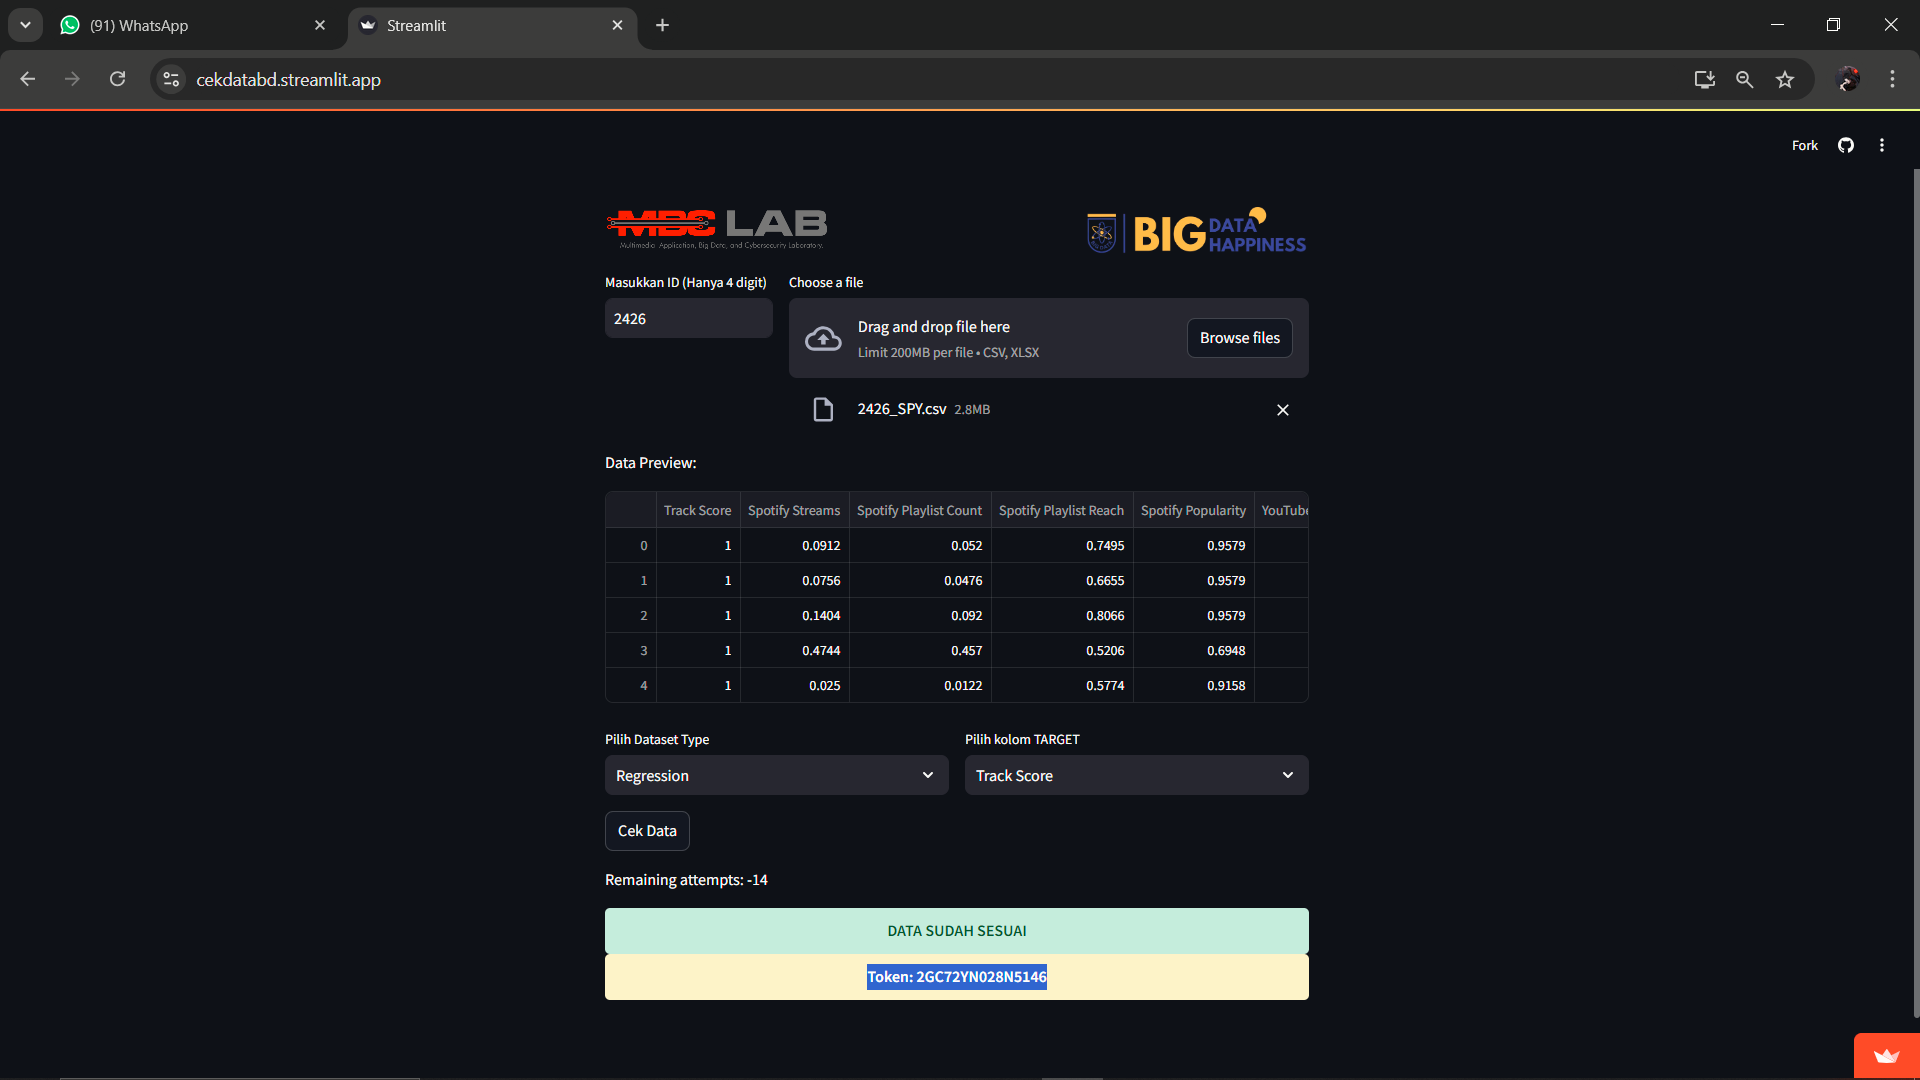

In [ ]:
Image(filename='/content/SPY_token.png')

# **AUC**

Dataset yang berisi macam2 buku beserta rating dan harganya

In [ ]:
# Panggil Dataset
df_AUC = pd.read_csv("/content/AUC.csv")

In [ ]:
df_AUC.head()

name                     author  \
0                  Geronimo Stilton #11 & #12  Writtenby:GeronimoStilton   
1                            The Burning Maze      Writtenby:RickRiordan   
2                                The Deep End       Writtenby:JeffKinney   
3                        Daughter of the Deep      Writtenby:RickRiordan   
4  The Lightning Thief: Percy Jackson, Book 1      Writtenby:RickRiordan   

                    narrator                time releasedate language  \
0      Narratedby:BillLobely   2 hrs and 20 mins    04-08-08  English   
1   Narratedby:RobbieDaymond   13 hrs and 8 mins    01-05-18  English   
2      Narratedby:DanRussell    2 hrs and 3 mins    06-11-20  English   
3  Narratedby:SoneelaNankani  11 hrs and 16 mins    05-10-21  English   
4  Narratedby:JesseBernstein              10 hrs    13-01-10  English   

                           stars   price  
0     5 out of 5 stars34 ratings  468.00  
1   4.5 out of 5 stars41 ratings  820.00  
2   4.5 out of 5 stars38 ratings  410.00  
3   4.5 out of 5 stars12 ratings  615.00  
4  4.5 out of 5 stars181 ratings  820.00

# **---1---> Data Cleaning - AUC**

In [ ]:
kolom = ['name', 'author', 'narrator', 'releasedate']

# Drop Kolom yang tidak Relevan
df_AUC = df_AUC.drop(columns = kolom, axis=1)

In [ ]:
df_AUC.head()

time language                          stars   price
0   2 hrs and 20 mins  English     5 out of 5 stars34 ratings  468.00
1   13 hrs and 8 mins  English   4.5 out of 5 stars41 ratings  820.00
2    2 hrs and 3 mins  English   4.5 out of 5 stars38 ratings  410.00
3  11 hrs and 16 mins  English   4.5 out of 5 stars12 ratings  615.00
4              10 hrs  English  4.5 out of 5 stars181 ratings  820.00

> **Handle Missing Value**

In [ ]:
# Cek missing values
null = df_AUC.isnull().sum()

print(null[null > 0])

Series([], dtype: int64)


In [ ]:
# Cek Duplikasi
df_AUC.duplicated().sum()

32542

In [ ]:
df_AUC = df_AUC.drop_duplicates()

In [ ]:
df_AUC

time language                          stars   price
0       2 hrs and 20 mins  English     5 out of 5 stars34 ratings  468.00
1       13 hrs and 8 mins  English   4.5 out of 5 stars41 ratings  820.00
2        2 hrs and 3 mins  English   4.5 out of 5 stars38 ratings  410.00
3      11 hrs and 16 mins  English   4.5 out of 5 stars12 ratings  615.00
4                  10 hrs  English  4.5 out of 5 stars181 ratings  820.00
...                   ...      ...                            ...     ...
87484   7 hrs and 34 mins  English                  Not rated yet  596.00
87485   10 hrs and 7 mins  English                  Not rated yet  820.00
87486   19 hrs and 4 mins  English                  Not rated yet  938.00
87487    4 hrs and 8 mins  English                  Not rated yet  680.00
87488     6 hrs and 1 min  English                  Not rated yet  569.00

[54947 rows x 4 columns]

> **Perbaiki data**

In [ ]:
cekprice1 = df_AUC[~df_AUC['price'].str.contains('\d')]
cekprice2 = df_AUC[df_AUC['price'].str.contains(',')]

In [ ]:
cekprice1['price'].unique()

array(['Free'], dtype=object)

In [ ]:
cekprice2['price'].unique()

array(['1,256.00', '1,206.00', '1,093.00', '1,003.00', '1,170.00',
       '1,005.00', '1,172.00', '1,382.00', '1,328.00', '1,063.00',
       '1,008.00', '1,138.00', '1,004.00', '1,156.00', '1,013.00',
       '1,036.00', '1,007.00', '1,055.00', '1,105.00', '1,507.00',
       '1,215.00', '1,025.00', '1,340.00', '1,255.00', '3,348.00',
       '1,007.95', '1,395.00', '4,783.00', '1,162.00', '1,177.00',
       '1,131.00', '1,407.00', '1,599.00', '1,181.00', '1,338.00',
       '1,078.00', '1,383.00', '1,171.00', '1,641.00', '1,633.00',
       '1,505.00', '1,675.00', '1,350.00', '1,289.00', '1,404.00',
       '1,306.00', '1,054.00', '1,266.00', '1,101.00', '1,518.00',
       '1,605.00', '1,254.00', '1,311.00', '1,200.00', '1,876.00',
       '2,345.00', '1,205.00', '1,640.00', '2,623.00', '2,762.00',
       '1,759.00', '1,012.00', '1,032.00', '1,114.00', '1,665.00',
       '1,020.00', '1,195.00', '1,406.00', '1,342.00', '1,335.00',
       '1,688.00', '1,273.00', '1,072.00', '1,519.00', '1,374.

In [ ]:
# Fixer
df_AUC['price'] = df_AUC['price'].str.replace(',','').replace('Free','0').astype(float).astype(int)

In [ ]:
df_AUC.sample(3)

time language                         stars  price
58468            36 mins  russian                 Not rated yet    233
37282  7 hrs and 41 mins  English  4.5 out of 5 stars14 ratings    773
32691  8 hrs and 37 mins   german                 Not rated yet    736

# **---2---> Pre Processing - AUC**

> **Bagi jam dan menit**

In [ ]:
def splitTime(df, time_column):
    time = df[time_column].str.replace('and ', '').str.replace('hrs','hr').str.replace('mins','min')
    time = pd.to_timedelta(time,errors='coerce')
    return time

def total_minutes(df, time_column):
    time = splitTime(df, time_column)

    # Jam
    time.dt.total_seconds() // 3600

    # Menit
    time.dt.total_seconds() % 3600 // 60

    df['total_menit'] = time.dt.total_seconds() // 60
    return df

In [ ]:
df_AUC = total_minutes(df_AUC, 'time')

In [ ]:
df_AUC.sample(3)

time language          stars  price  total_menit
21359  15 hrs and 48 mins  English  Not rated yet    836        948.0
30284    4 hrs and 2 mins  English  Not rated yet    502        242.0
52145             43 mins  English  Not rated yet     65         43.0

In [ ]:
# List Null
print(df_AUC[df_AUC.isna().any(axis=1)])

                     time  language          stars  price  total_menit
1401   Less than 1 minute   English  Not rated yet    164          NaN
1653   Less than 1 minute   English  Not rated yet     46          NaN
10874  Less than 1 minute  japanese  Not rated yet    223          NaN
10886  Less than 1 minute  japanese  Not rated yet    279          NaN
24070  Less than 1 minute   English  Not rated yet    367          NaN
39002  Less than 1 minute  japanese  Not rated yet    418          NaN
55648  Less than 1 minute  japanese  Not rated yet    139          NaN
58521  Less than 1 minute    german  Not rated yet    468          NaN
67097  Less than 1 minute   English  Not rated yet     76          NaN
87159  Less than 1 minute  japanese  Not rated yet    195          NaN


In [ ]:
df_AUC = df_AUC.dropna()

In [ ]:
df_AUC['total_menit'] = df_AUC['total_menit'].astype(int)

<ipython-input-296-c258169f8e43>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AUC['total_menit'] = df_AUC['total_menit'].astype(int)


In [ ]:
# Drop Kolom
df_AUC = df_AUC.drop(columns = ['time'], axis=1)

In [ ]:
df_AUC.sample(3)

language                      stars  price  total_menit
50548    tamil  3 out of 5 stars2 ratings     76          257
25762  English              Not rated yet    888          479
86527   german              Not rated yet    401           55

> **Bagi Rating**

In [ ]:
def split_stars(df, kolom):
    star = df[kolom].apply(lambda x: x.split(' out')[0]).replace('Not rated yet', 0)
    rating = df[kolom].replace('Not rated yet', '0 out of 0 stars0 rating').str.replace(',', '').apply(lambda x:x.split('stars')[1].split()[0])

    df['star ?/5'] = star
    df['jumlah rating'] = rating

    return df

In [ ]:
# Pisah
df_AUC = split_stars(df_AUC, 'stars')

# Drop Kolom
df_AUC = df_AUC.drop(columns = ['stars'], axis=1)

# Tipe data
df_AUC['star ?/5'] = df_AUC['star ?/5'].astype(float)
df_AUC['jumlah rating'] = df_AUC['jumlah rating'].astype(int)

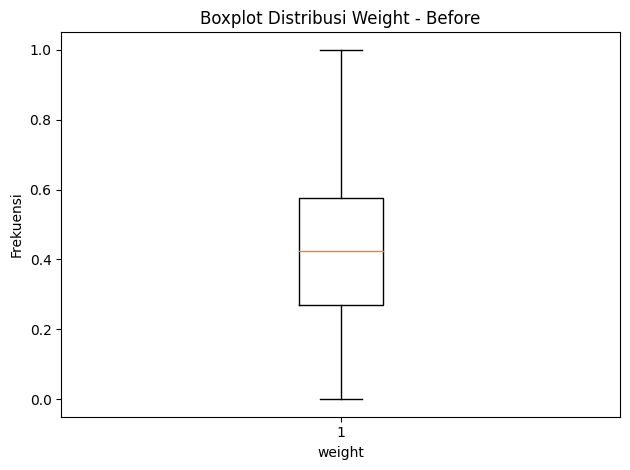

In [ ]:
# Cek Outliers
plt.boxplot(df_FDC['weight'])
plt.xlabel('weight')
plt.ylabel('Frekuensi')
plt.title(f'Boxplot Distribusi Weight - Before')

plt.tight_layout()
plt.show()

In [ ]:
df_AUC

language  price  total_menit  star ?/5  jumlah rating
0      English    468          140       5.0             34
1      English    820          788       4.5             41
2      English    410          123       4.5             38
3      English    615          676       4.5             12
4      English    820          600       4.5            181
...        ...    ...          ...       ...            ...
87484  English    596          454       0.0              0
87485  English    820          607       0.0              0
87486  English    938         1144       0.0              0
87487  English    680          248       0.0              0
87488  English    569          361       0.0              0

[54937 rows x 5 columns]

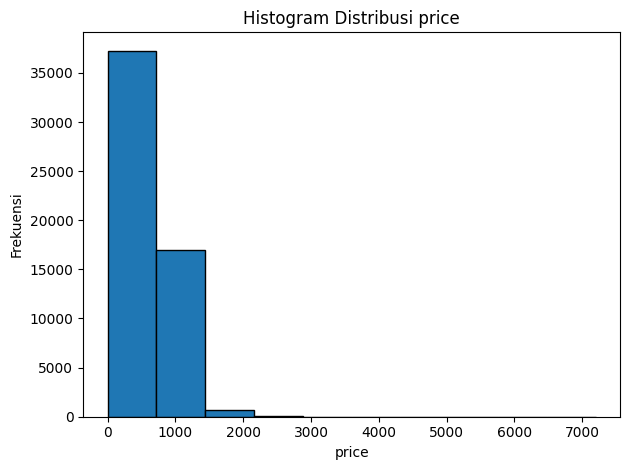

In [ ]:
# Histogram Before
plt.hist(df_AUC['price'], edgecolor='black')
plt.xlabel('price')
plt.ylabel('Frekuensi')
plt.title(f'Histogram Distribusi price')

# Menyesuaikan layout
plt.tight_layout()
plt.show()

In [ ]:
df_AUC = replace_outlier_median(df_AUC, 'price')

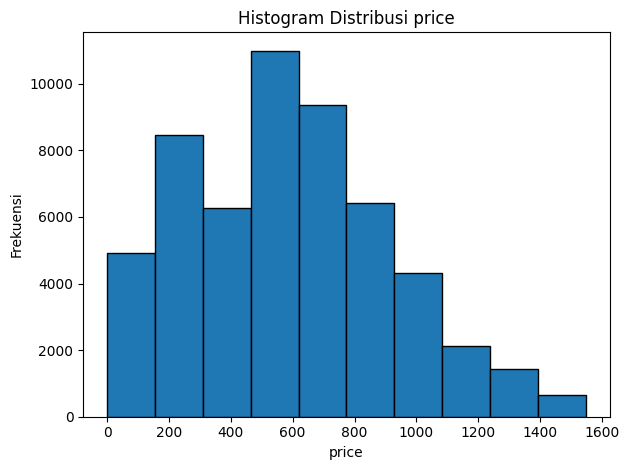

In [ ]:
# Histogram Before
plt.hist(df_AUC['price'], edgecolor='black')
plt.xlabel('price')
plt.ylabel('Frekuensi')
plt.title(f'Histogram Distribusi price')

# Menyesuaikan layout
plt.tight_layout()
plt.show()

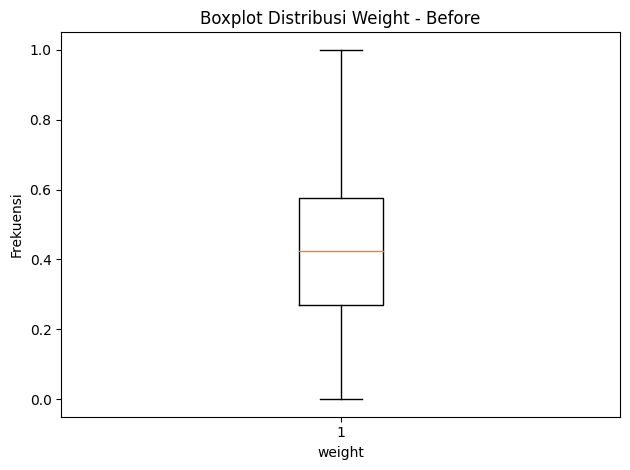

In [ ]:
# Cek Outliers
plt.boxplot(df_FDC['weight'])
plt.xlabel('weight')
plt.ylabel('Frekuensi')
plt.title(f'Boxplot Distribusi Weight - Before')

plt.tight_layout()
plt.show()

In [ ]:
# Cek Duplikasi
df_AUC.duplicated().sum()

47

In [ ]:
df_AUC = df_AUC.drop_duplicates()

In [ ]:
# Encoding Label
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_AUC['language'] = le.fit_transform(df_AUC['language'])

<ipython-input-309-1436f32bb26a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AUC['language'] = le.fit_transform(df_AUC['language'])


In [ ]:
LinearRegression(df_AUC, 'price')

Model Score:  0.35589465018820465
Mean Squared Error:  70477.0629142739
R-squared:  0.34378265668275887


# **---3---> Hasil - AUC**

In [ ]:
# Bener Ga
check_regression(df_AUC, 'price', '2426_AUC')

'Data berhasil disimpan'

**Token:** 62K4UV1A4NUX2L2

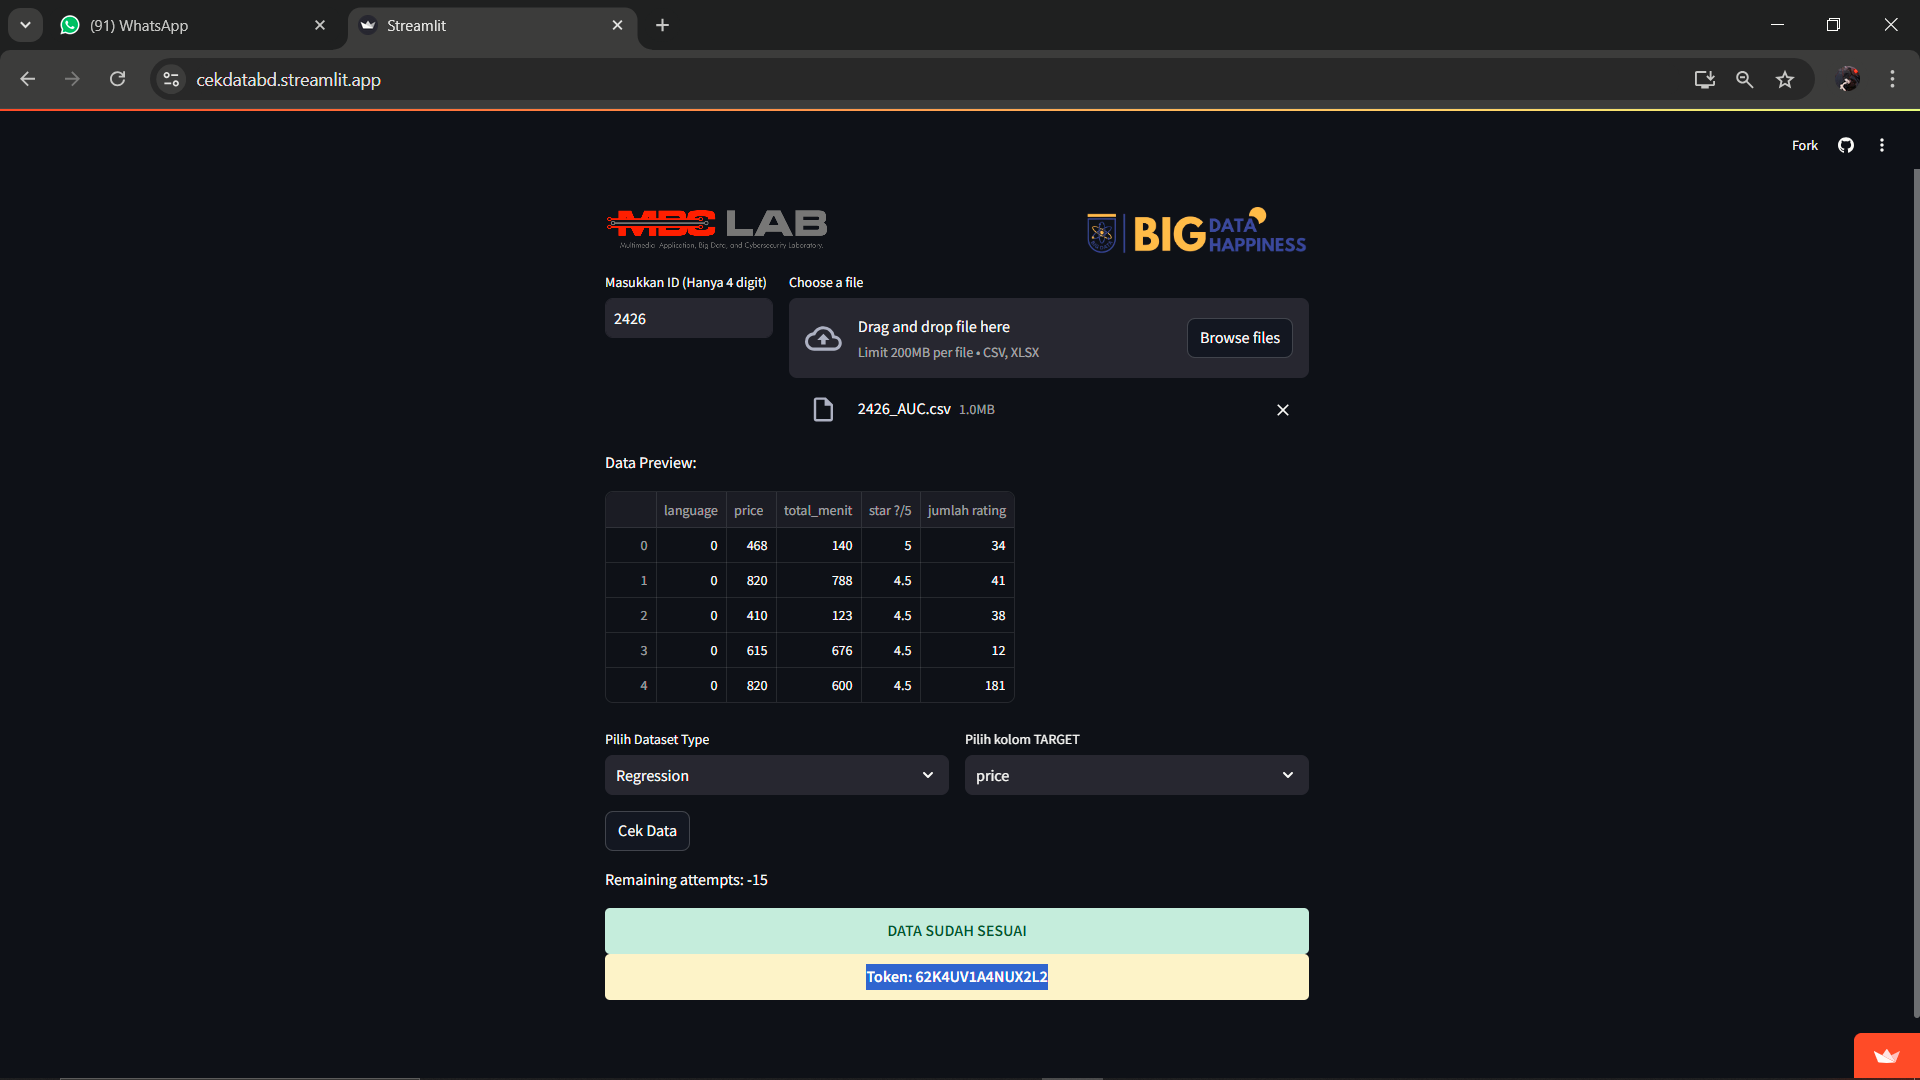

In [ ]:
Image(filename='/content/AUC_token.png')

# **SAD**

Dataset untuk memprediksi apakah orang tersebut stroke atau tidak berdasarkan beberapa kondisi

In [ ]:
# Panggil Dataset
df_SAD = pd.read_csv("/content/SAD.csv")

In [ ]:
df_SAD.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

# **--1--> Data Cleaning - SAD**

> **DROP FITUR TIDAK RELEVAN**

*   **Fitur Target :** stroke
*   **Model :** Klasifikasi

In [ ]:
kolom = ['id', 'gender']

# Drop Kolom yang tidak Relevan
df_SAD = df_SAD.drop(columns = kolom, axis=1)

In [ ]:
df_SAD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                5110 non-null   float64
 1   hypertension       5110 non-null   int64  
 2   heart_disease      5110 non-null   int64  
 3   ever_married       5110 non-null   object 
 4   work_type          5110 non-null   object 
 5   Residence_type     5110 non-null   object 
 6   avg_glucose_level  5110 non-null   float64
 7   bmi                4909 non-null   float64
 8   smoking_status     5110 non-null   object 
 9   stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 399.3+ KB




> **Handle Missing Values**



In [ ]:
# Cek missing values
null = df_SAD.isnull().sum()

print(null[null > 0])

bmi    201
dtype: int64


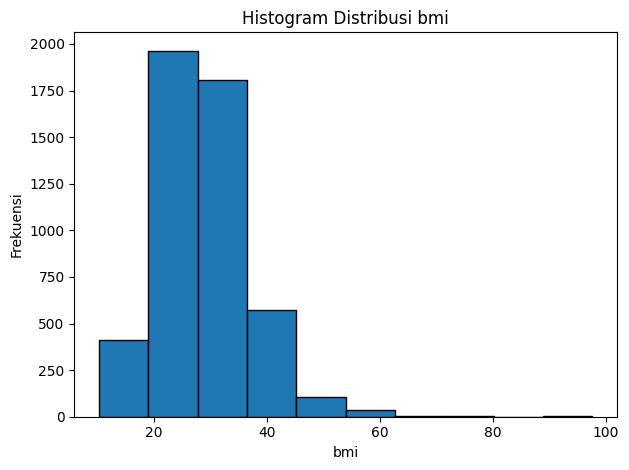

In [ ]:
plt.hist(df_SAD['bmi'], edgecolor='black')
plt.xlabel('bmi')
plt.ylabel('Frekuensi')
plt.title(f'Histogram Distribusi bmi')

plt.tight_layout()
plt.show()

In [ ]:
df_SAD['bmi'] = df_SAD['bmi'].fillna(df_SAD['bmi'].median())

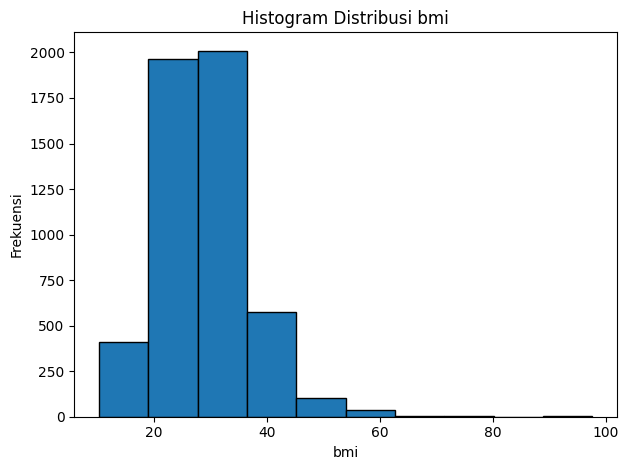

In [ ]:
plt.hist(df_SAD['bmi'], edgecolor='black')
plt.xlabel('bmi')
plt.ylabel('Frekuensi')
plt.title(f'Histogram Distribusi bmi')

plt.tight_layout()
plt.show()

In [ ]:
# Cek Duplikasi
df_SAD.duplicated().sum()

0

> **ATASI OUTLIERS**



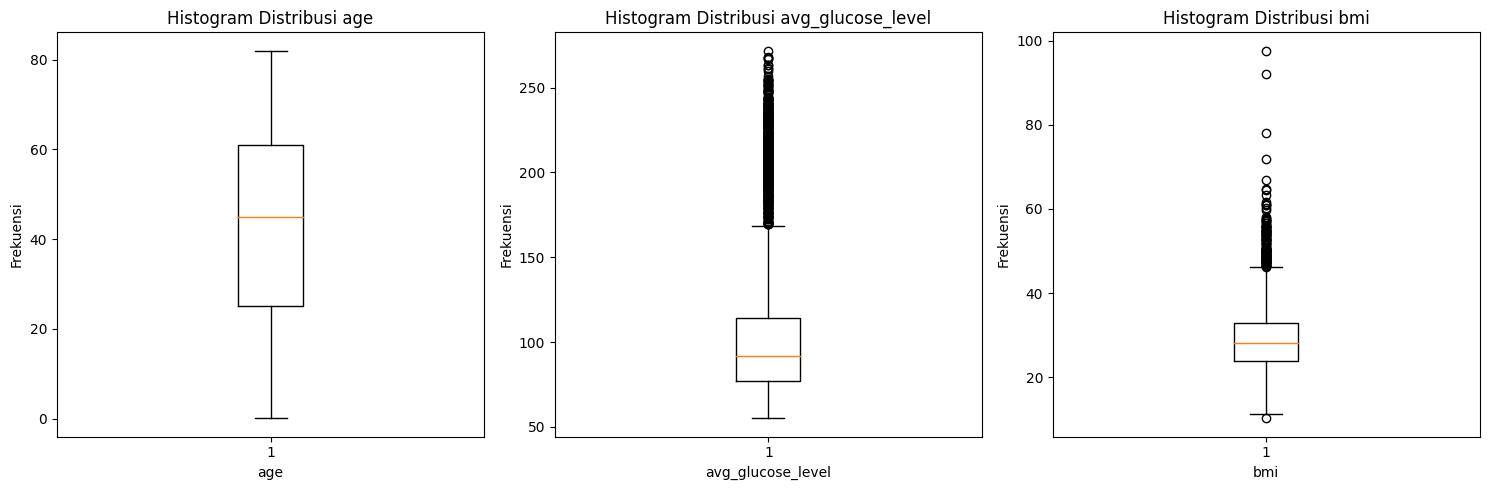

In [ ]:
# Membuat figure dan axes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Membuat histogram untuk setiap kolom
for i, col in enumerate(['age', 'avg_glucose_level', 'bmi']):
    axes[i].boxplot(df_SAD[col])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frekuensi')
    axes[i].set_title(f'Histogram Distribusi {col}')

# Menyesuaikan layout
plt.tight_layout()
plt.show()

In [ ]:
df_SAD = cap_floor(df_SAD, 'avg_glucose_level')
df_SAD = cap_floor(df_SAD, 'bmi')

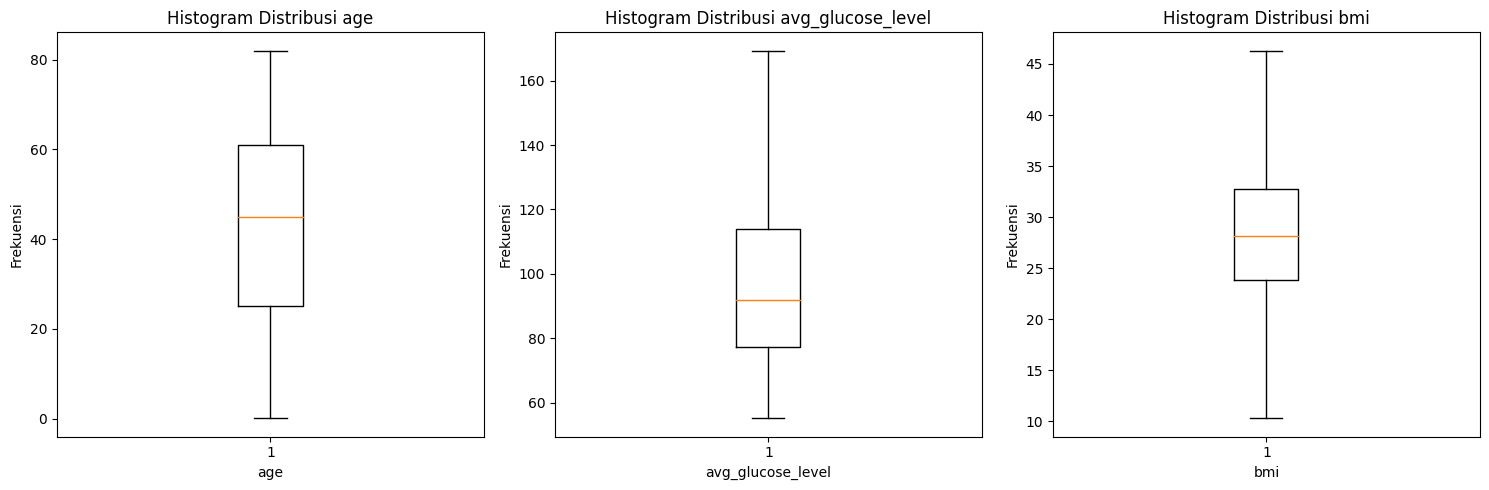

In [ ]:
# Membuat figure dan axes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Membuat histogram untuk setiap kolom
for i, col in enumerate(['age', 'avg_glucose_level', 'bmi']):
    axes[i].boxplot(df_SAD[col])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frekuensi')
    axes[i].set_title(f'Histogram Distribusi {col}')

# Menyesuaikan layout
plt.tight_layout()
plt.show()

In [ ]:
df_SAD = df_SAD.drop_duplicates()
df_SAD = cap_floor(df_SAD, 'avg_glucose_level')

<ipython-input-3-5956554c9682>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].clip(lower=floor, upper=cap)


In [ ]:
df_SAD['age'] = df_SAD['age'].astype(int)

<ipython-input-326-f51f86eab484>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SAD['age'] = df_SAD['age'].astype(int)


# **---2---> Pre Processing - SAD**

In [ ]:
df_SAD.sample(5)

age  hypertension  heart_disease ever_married      work_type  \
2796   58             0              0           No        Private   
3252   26             0              0           No        Private   
103    81             0              1          Yes  Self-employed   
1016   51             0              0          Yes  Self-employed   
2062   15             0              0           No        Private   

     Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
2796          Rural             78.930  40.7  formerly smoked       0  
3252          Rural            169.235  24.7          Unknown       0  
103           Rural             78.700  19.4          Unknown       1  
1016          Urban            143.150  44.7  formerly smoked       0  
2062          Urban            121.600  22.8     never smoked       0



> **Ubah kolom Smoking Status**



In [ ]:
df_SAD['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [ ]:
def categorize_smoking(status):
    if status in ['formerly smoked', 'smokes']:
        return 'yes'
    elif status == 'never smoked':
        return 'no'
    else:
        return np.nan

# Membuat kolom baru
df_SAD['Smoking'] = df_SAD['smoking_status'].apply(categorize_smoking)

# Hapus kolom
df_SAD = df_SAD.drop(columns=['smoking_status'])

In [ ]:
df_SAD.sample(5)

age  hypertension  heart_disease ever_married work_type Residence_type  \
1553   66             0              0          Yes  Govt_job          Rural   
1830   56             0              0           No   Private          Rural   
5032    1             0              0           No  children          Rural   
2638   50             0              0          Yes   Private          Rural   
860    46             0              0          Yes   Private          Rural   

      avg_glucose_level   bmi  stroke Smoking  
1553            169.235  38.9       0     yes  
1830             62.600  33.9       0      no  
5032             61.940  20.3       0     NaN  
2638             68.410  23.9       0     yes  
860             100.150  46.3       0     yes

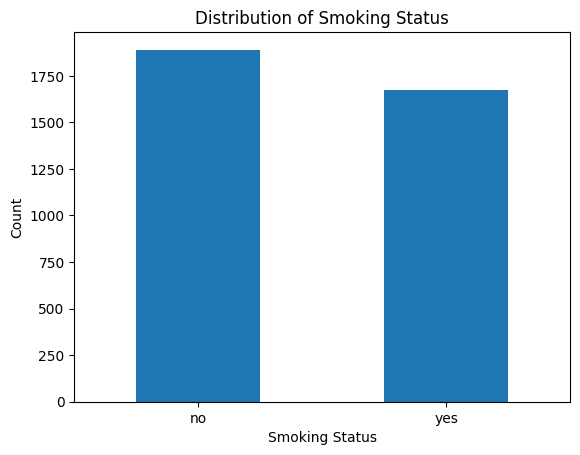

In [ ]:
smoking_counts = df_SAD['Smoking'].value_counts()

# Create a bar plot
smoking_counts.plot(kind='bar')
plt.title('Distribution of Smoking Status')

# Add labels for x and y axes
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.show()

In [ ]:
df_SAD['Smoking'] = df_SAD['Smoking'].fillna(df_SAD['Smoking'].mode()[0])

In [ ]:
df_SAD = df_SAD.drop_duplicates()

In [ ]:
df_SAD.sample(5)

age  hypertension  heart_disease ever_married      work_type  \
1497   64             0              0          Yes  Self-employed   
785    69             0              1          Yes        Private   
1140   67             0              0          Yes        Private   
4846   34             0              0          Yes        Private   
3132   11             0              0           No       children   

     Residence_type  avg_glucose_level   bmi  stroke Smoking  
1497          Rural            169.235  30.7       0     yes  
785           Rural            169.235  21.7       0      no  
1140          Rural             82.310  21.3       0      no  
4846          Urban            113.260  27.6       0      no  
3132          Rural             56.330  18.1       0      no

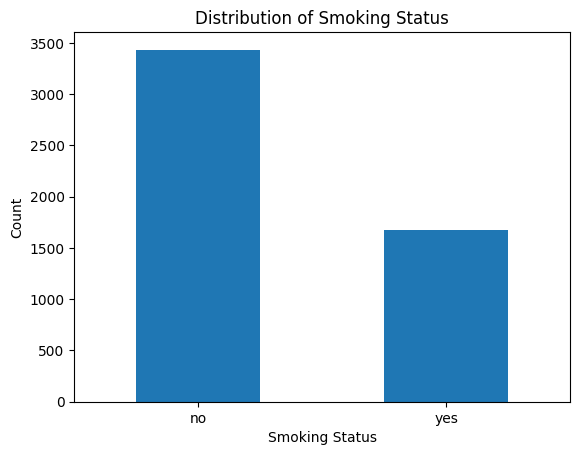

In [ ]:
smoking_counts = df_SAD['Smoking'].value_counts()

# Create a bar plot
smoking_counts.plot(kind='bar')
plt.title('Distribution of Smoking Status')

# Add labels for x and y axes
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.show()



> **Encoding**



In [ ]:
# Encoding Label
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_SAD['ever_married'] = le.fit_transform(df_SAD['ever_married'])
df_SAD['work_type'] = le.fit_transform(df_SAD['work_type'])
df_SAD['Residence_type'] = le.fit_transform(df_SAD['Residence_type'])
df_SAD['Smoking'] = le.fit_transform(df_SAD['Smoking'])

In [ ]:
# Ubah ke Boolean
df_SAD['stroke'] = df_SAD['stroke'].map({1: True, 0: False})

In [ ]:
df_SAD.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5105 entries, 0 to 5109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                5105 non-null   int64  
 1   hypertension       5105 non-null   int64  
 2   heart_disease      5105 non-null   int64  
 3   ever_married       5105 non-null   int64  
 4   work_type          5105 non-null   int64  
 5   Residence_type     5105 non-null   int64  
 6   avg_glucose_level  5105 non-null   float64
 7   bmi                5105 non-null   float64
 8   stroke             5105 non-null   bool   
 9   Smoking            5105 non-null   int64  
dtypes: bool(1), float64(2), int64(7)
memory usage: 403.8 KB


stroke
False    4856
True      249
Name: count, dtype: int64


<Axes: ylabel='count'>

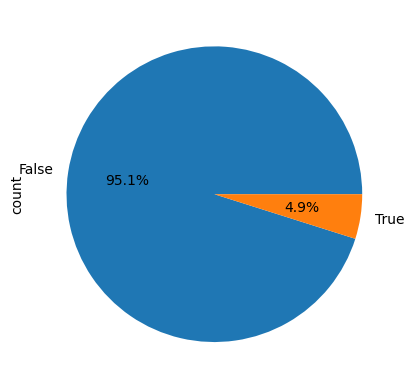

In [ ]:
# Frequency table
frequency_table = df_SAD['stroke'].value_counts()
print(frequency_table)

# Pie chart
df_SAD['stroke'].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [ ]:
# Lakukan SMOTE
df_SAD = SMOTE(df_SAD, 'stroke')

In [ ]:
df_SAD = df_SAD.drop_duplicates()

stroke
False    3897
True     3830
Name: count, dtype: int64


<Axes: ylabel='count'>

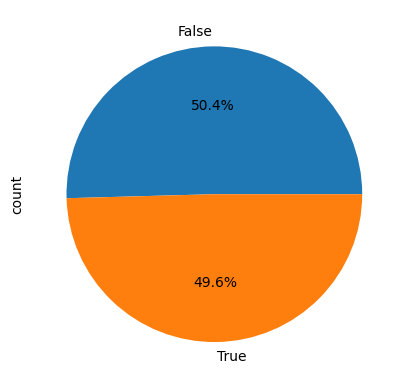

In [ ]:
# Frequency table
frequency_table = df_SAD['stroke'].value_counts()
print(frequency_table)

# Pie chart
df_SAD['stroke'].value_counts().plot(kind='pie', autopct='%1.1f%%')

# **---3---> Hasil - SAD**

In [ ]:
check_classification(df_SAD, 'stroke', '2426_SAD')

'Data berhasil disimpan'

**Generated Token:** 342P6F4QKKE2WS2

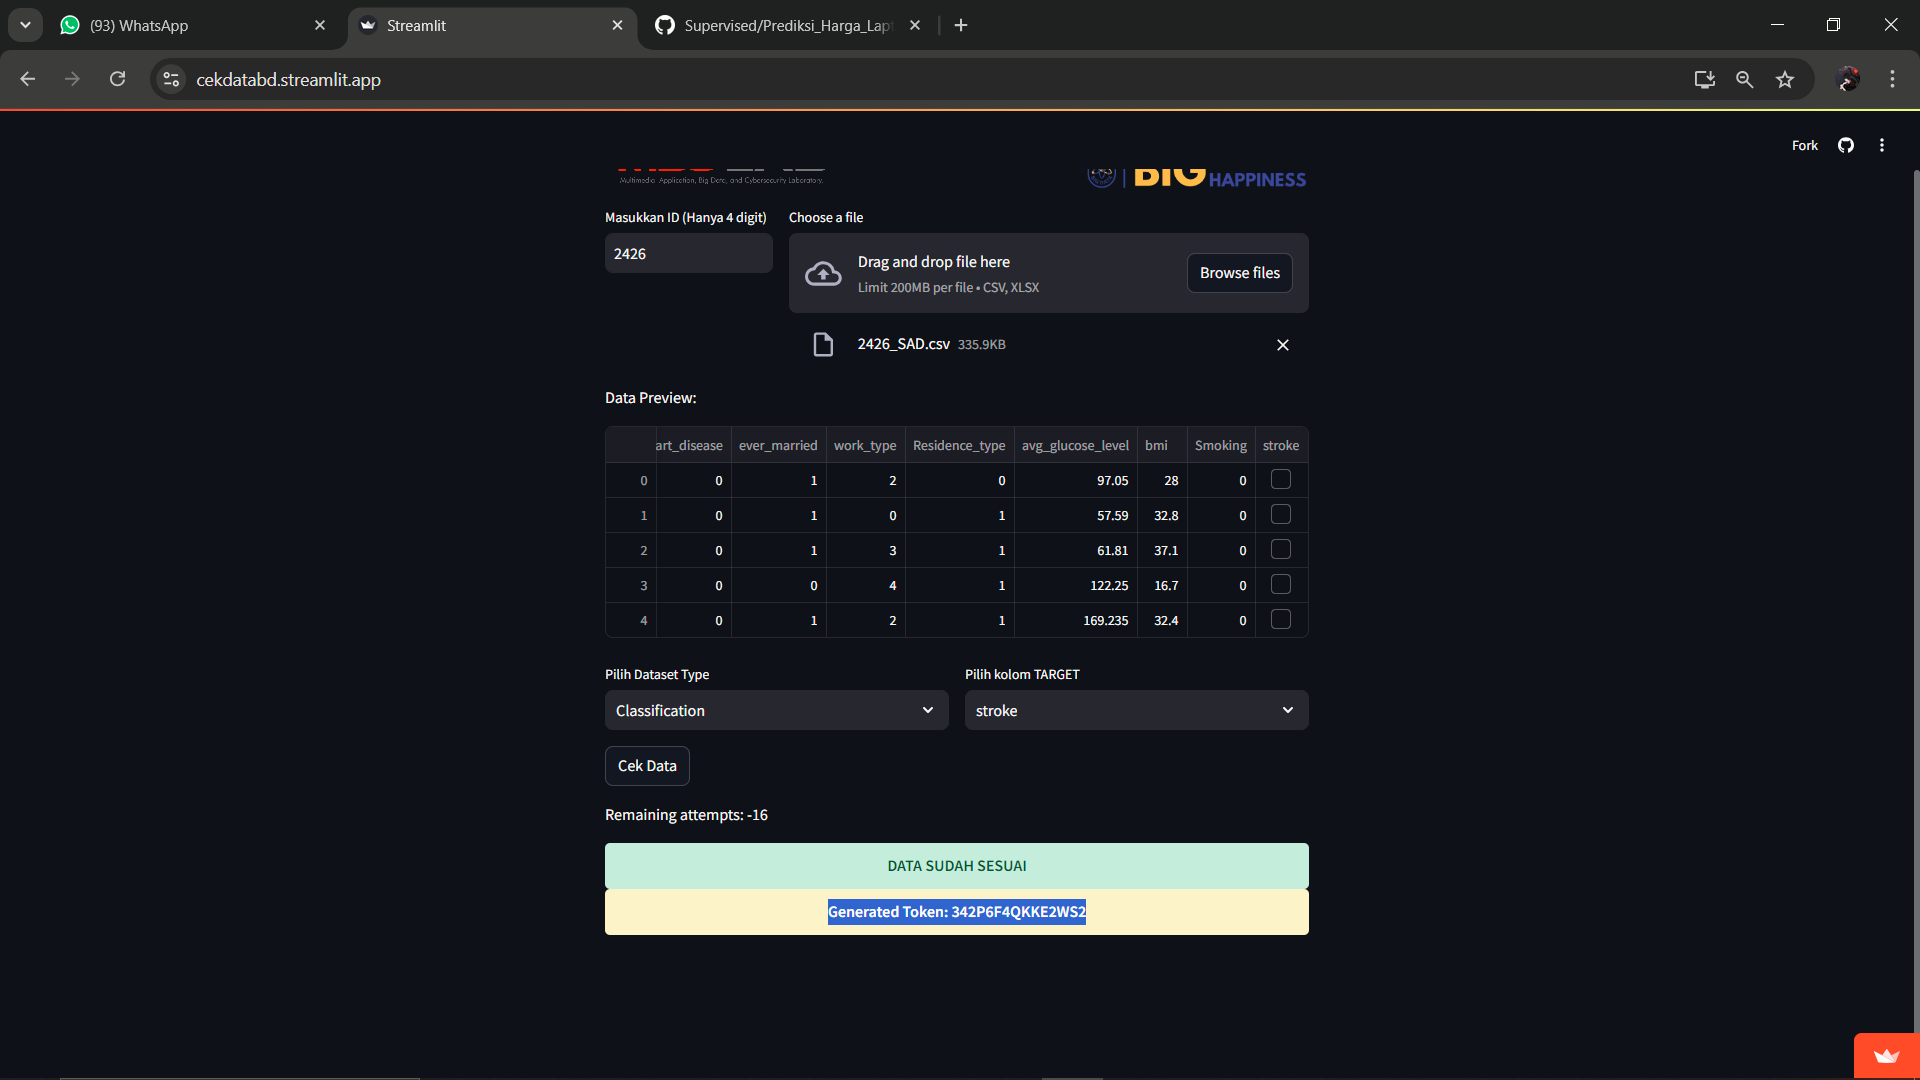

In [ ]:
Image(filename='/content/SAD_token.png')